 # TEAM LOS GALACTICOS PROJECT CODE

# Initial Settings

## Libraries

In [2]:
#Libraries
require(data.table, quietly = TRUE)
require(glue, quietly = TRUE)
require(ggplot2, quietly = TRUE)
require(scatterplot3d, quietly = TRUE)
require(gridExtra, quietly = TRUE)
require(tidyr, quietly = TRUE)
require(tseries, quietly = TRUE)

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'glue' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'tidyr' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
library(pROC, quietly = TRUE)
library(caret, quietly = TRUE)
library(rpart, quietly = TRUE)
library(rpart.plot, quietly = TRUE)
library(e1071, quietly = TRUE)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'caret' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"

In [4]:
# Required packages for submission
require(jsonlite)
require(httr)
require(data.table)
require(tiger)

Loading required package: jsonlite
Loading required package: httr

Attaching package: 'httr'

The following object is masked from 'package:caret':

    progress

Loading required package: tiger
Warning message:
"package 'tiger' was built under R version 3.6.3"Loading required package: hexbin
Loading required package: qualV
Warning message:
"package 'qualV' was built under R version 3.6.3"Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Attaching package: 'qualV'

The following objects are masked from 'package:caret':

    MAE, RMSE

Loading required package: klaR
Warning message:
"package 'klaR' was built under R version 3.6.3"Loading required package: MASS
Loading required package: som


In [5]:
install.packages("tiger")

Warning message:
"package 'tiger' is in use and will not be installed"

## Dataload

In [6]:
#Dataload
allpath <- "Data/IE582_Fall20_ProjectTrain.csv"
alldata <- read.csv(allpath)

submitdatapath <- "Data/IE582_Fall20_ProjectTest.csv"
submitdata <- read.csv(submitdatapath)

submitdata <- submitdata[,-61] # Empty y column of the submission data set


## Submission Settings

In [7]:
get_token <- function(username, password, url_site){
    
    post_body = list(username=username,password=password)
    post_url_string = paste0(url_site,'/token/')
    result = POST(post_url_string, body = post_body)

    # error handling (wrong credentials)
    if(result$status_code==400){
        print('Check your credentials')
        return(0)
    }
    else if (result$status_code==201){
        output = content(result)
        token = output$key
    }

    return(token)
}

In [8]:
send_submission <- function(predictions, token, url_site, submit_now=F){
    
    format_check=check_format(predictions)
    if(!format_check){
        return(FALSE)
    }
    
    post_string="list("
    for(i in 1:length(predictions)){
        if(i<length(predictions)){
            post_string=sprintf("%s%s,",post_string,predictions[i])
        } else {
            post_string=sprintf("%s%s)",post_string,predictions[i])
        }
    }
    
    submission = eval(parse(text=post_string))
    json_body = jsonlite::toJSON(submission, auto_unbox = TRUE)
    submission=list(submission=json_body)
    print(submission)

    if(!submit_now){
        print("You did not submit.")
        return(FALSE)      
    }
    

    header = add_headers(c(Authorization=paste('Token',token,sep=' ')))
    post_url_string = paste0(url_site,'/submission/')
    result = POST(post_url_string, header, body=submission)
    
    if (result$status_code==201){
        print("Successfully submitted. Below you can see the details of your submission")
    } else {
        print("Could not submit. Please check the error message below, contact the assistant if needed.")
    }
    
    print(content(result))
    
}

In [9]:
check_format <- function(predictions){
    
    if(all(is.numeric(predictions)) & all(predictions<=1)){
        print("Format OK")
        return(TRUE)
    } else {
        print("Wrong format")
        return(FALSE)
    }
    
}

In [10]:
# this part is main code
subm_url ='http://46.101.121.83'

u_name = "Los Galacticos"
p_word = "E6lOux9kirvumsWW"
submit_now = FALSE

username = u_name
password = p_word

token = get_token(username=u_name, password=p_word, url=subm_url)
token

[1] "59900fa65e181d65c4c676e8904fbdf065448577"

## Data Exploration

In [11]:
summary(alldata)

       x1              x2               x3              x4        
 Min.   :13.00   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :30.00   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :30.09   Mean   :0.6712   Mean   :0.662   Mean   :0.6905  
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :50.00   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       x5               x6              x7               x8       
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.000   Min.   :13.00  
 1st Qu.: 4.000   1st Qu.: 4.00   1st Qu.: 4.000   1st Qu.:26.00  
 Median : 9.000   Median : 9.00   Median : 9.000   Median :30.00  
 Mean   : 9.083   Mean   : 8.99   Mean   : 9.109   Mean   :30.17  
 3rd Qu.:14.000   3rd Qu.:14.00   3rd Qu.:14.000   3rd Qu.:34.00  
 Max.   :18.000   Max.   :18.00   Max.   :18.000   Max.   :49.00  
       x9              x10              x11              x12  

In [12]:
sapply(alldata, table)  #col 50 and 52 gerekli değil (Tamamen 0)

$x1

 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32 
  1   1   2   1   3   3  12  16  28  30  50  77 100 126 148 180 182 177 166 172 
 33  34  35  36  37  38  39  40  41  42  43  44  45  47  49  50 
133 108 106  66  63  38  28  23  13   9   4   4   1   1   1   1 

$x2

   0    1 
 682 1392 

$x3

   0    1 
 701 1373 

$x4

   0    1 
 642 1432 

$x5

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
105 118 113 105 107 102  91 122 118 112 107  92  94 117 121  90 123 120 117 

$x6

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
113 113 126 103 128  97 111  93 101 126  93  90  97 113  89 120 136 109 116 

$x7

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
127 105  98  90 103 100 102 125 112 120 112 101 111  98 122 106 112 121 109 

$x8

 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32 
  1   1   1   5   7  14  14  35  35  55  76  81 102 

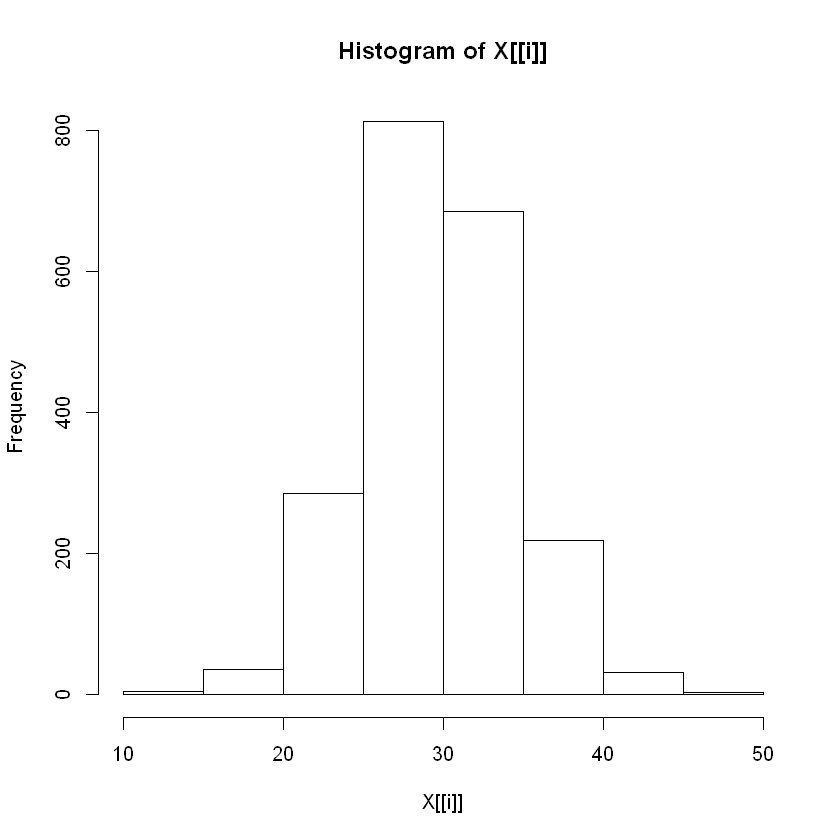

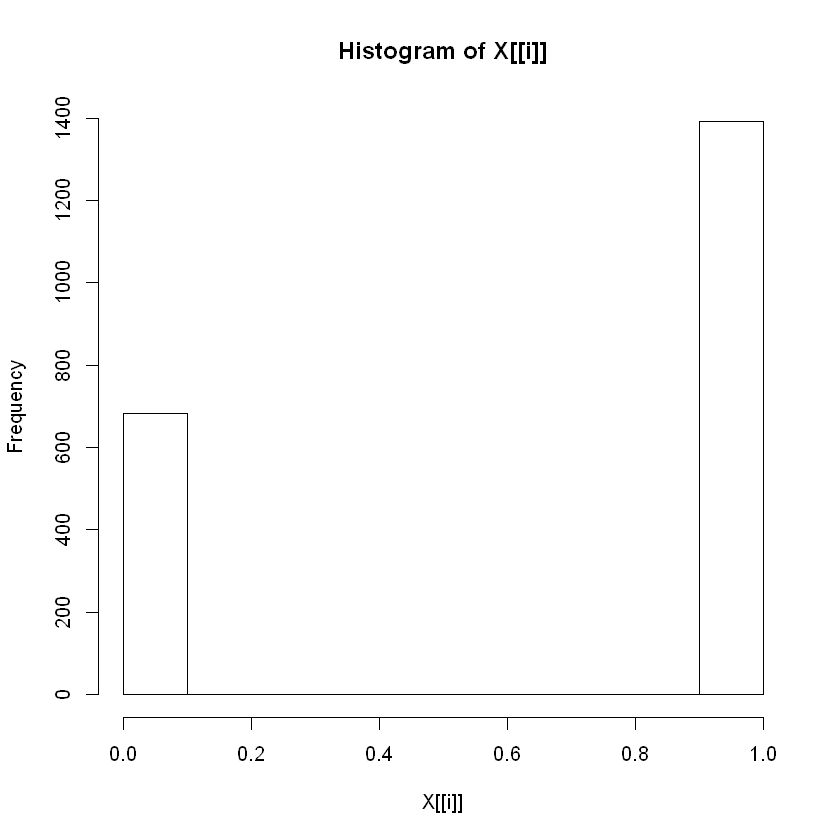

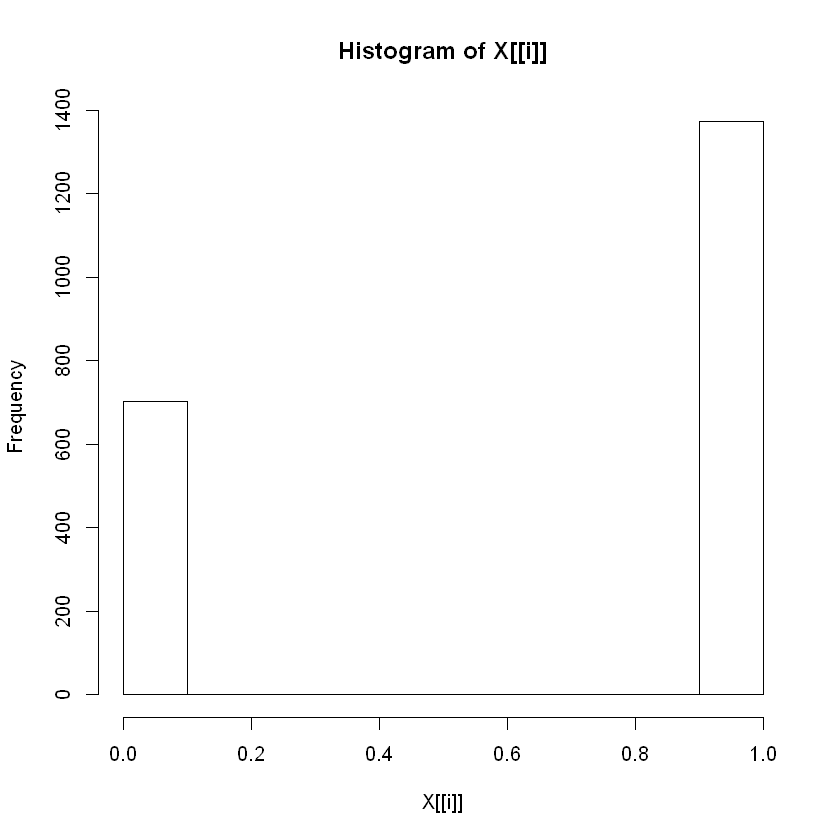

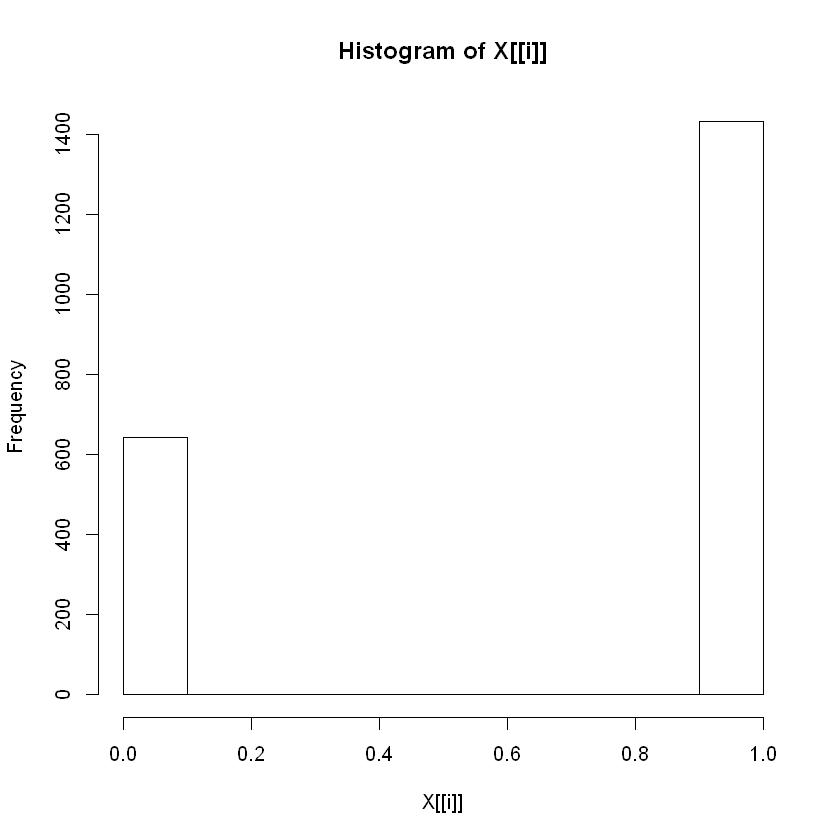

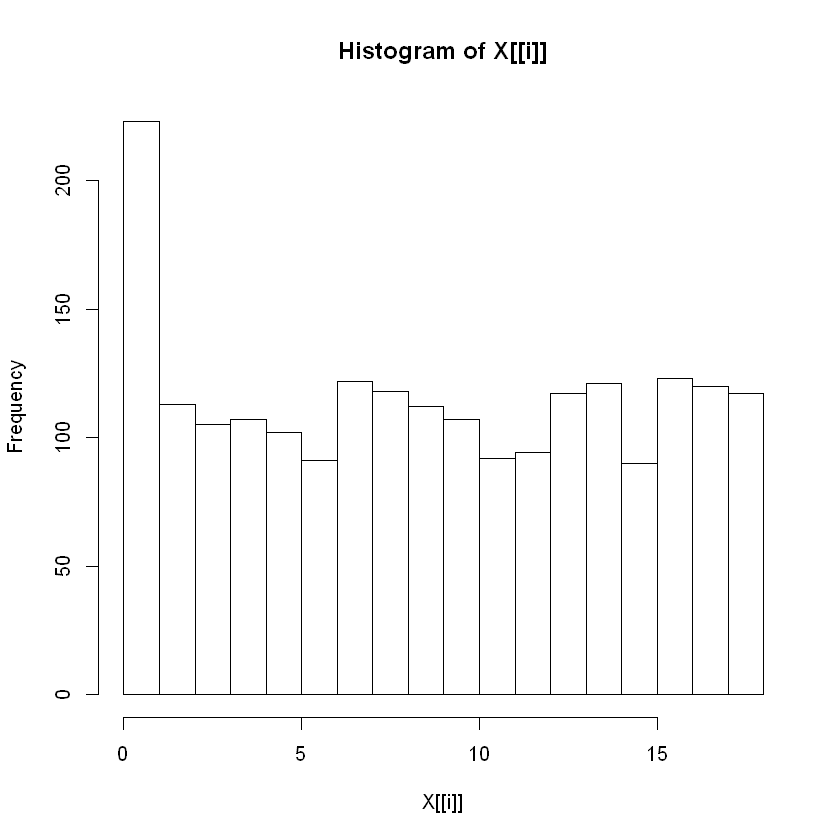

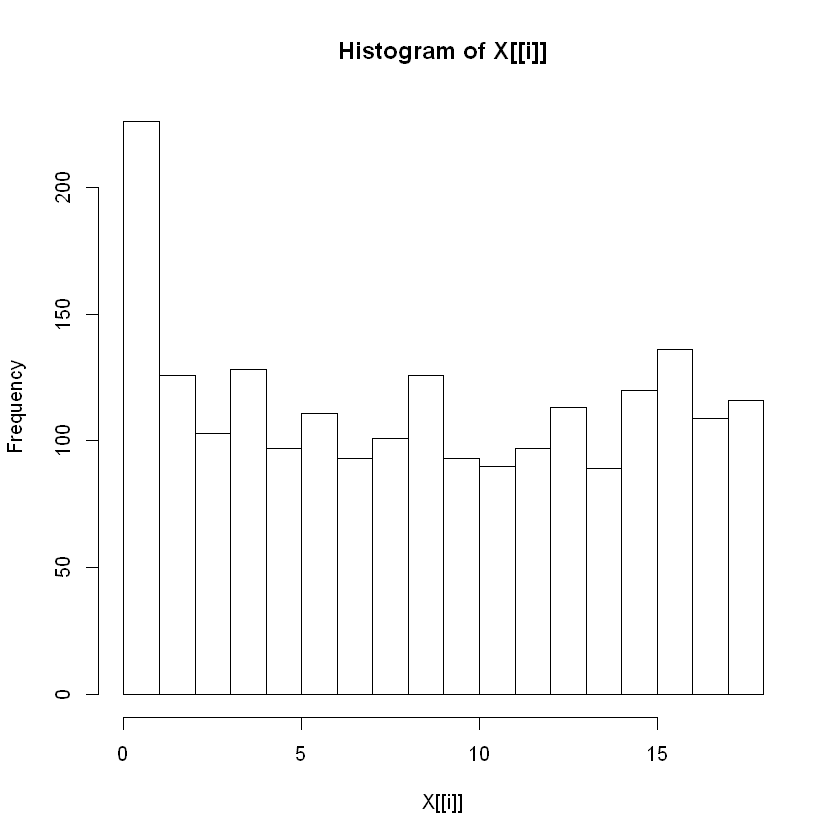

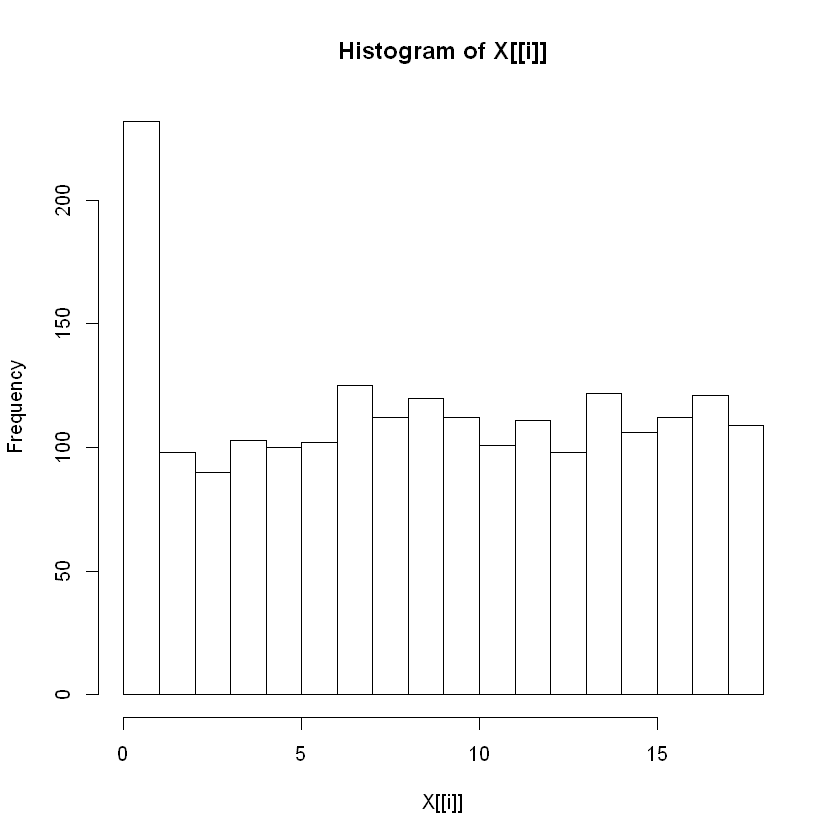

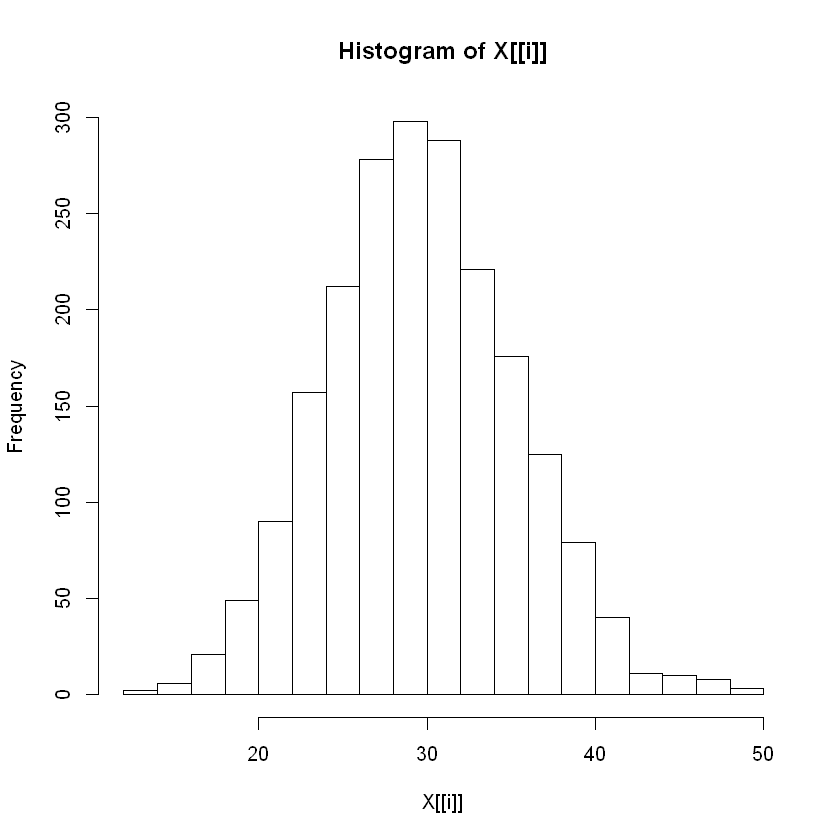

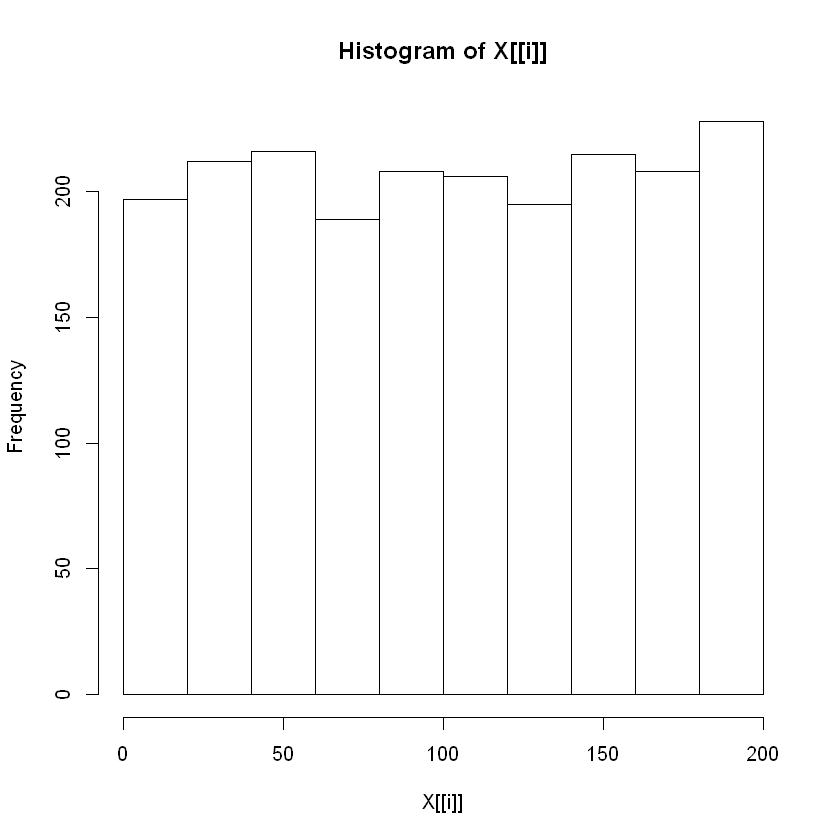

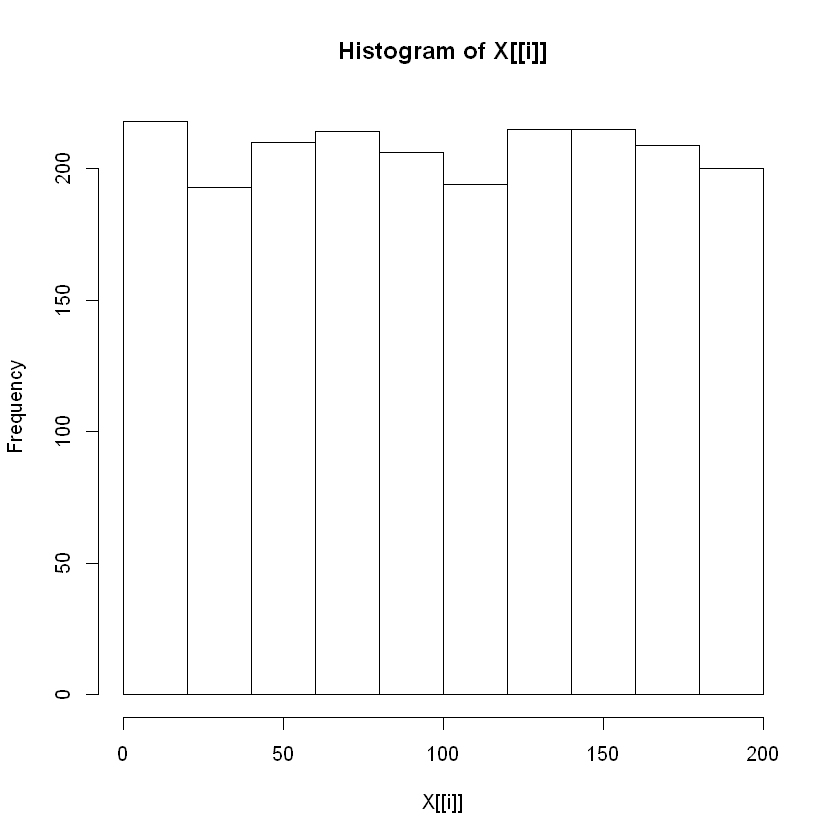

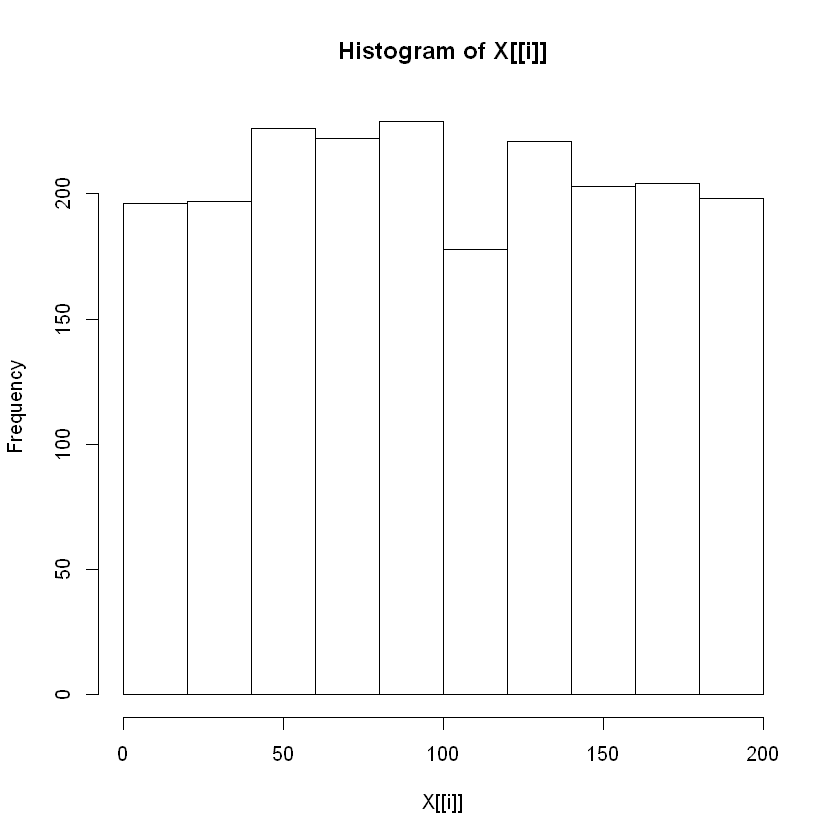

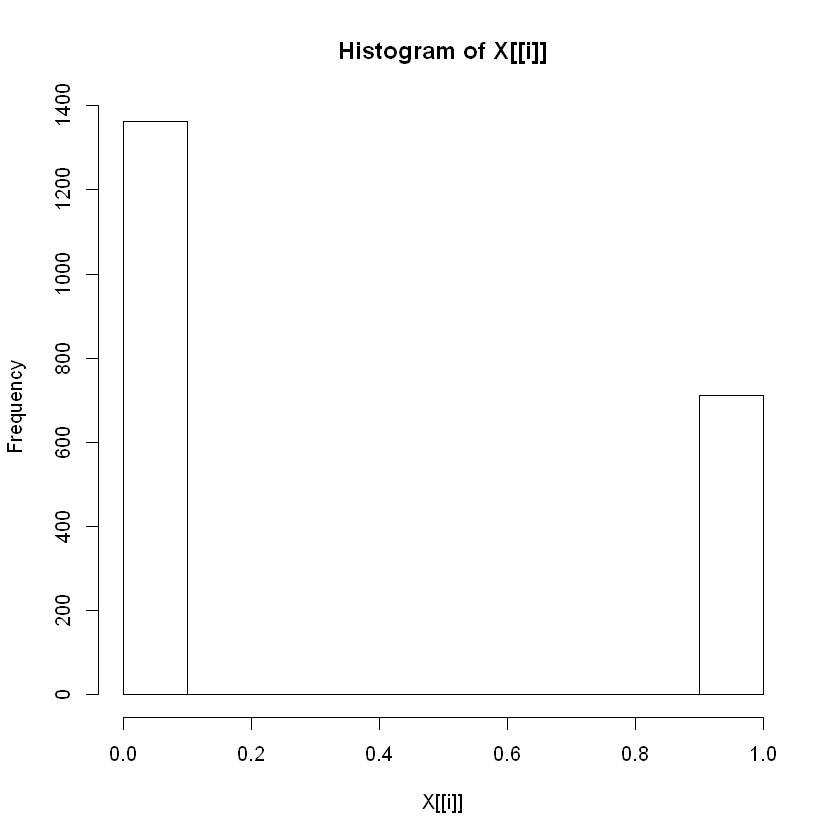

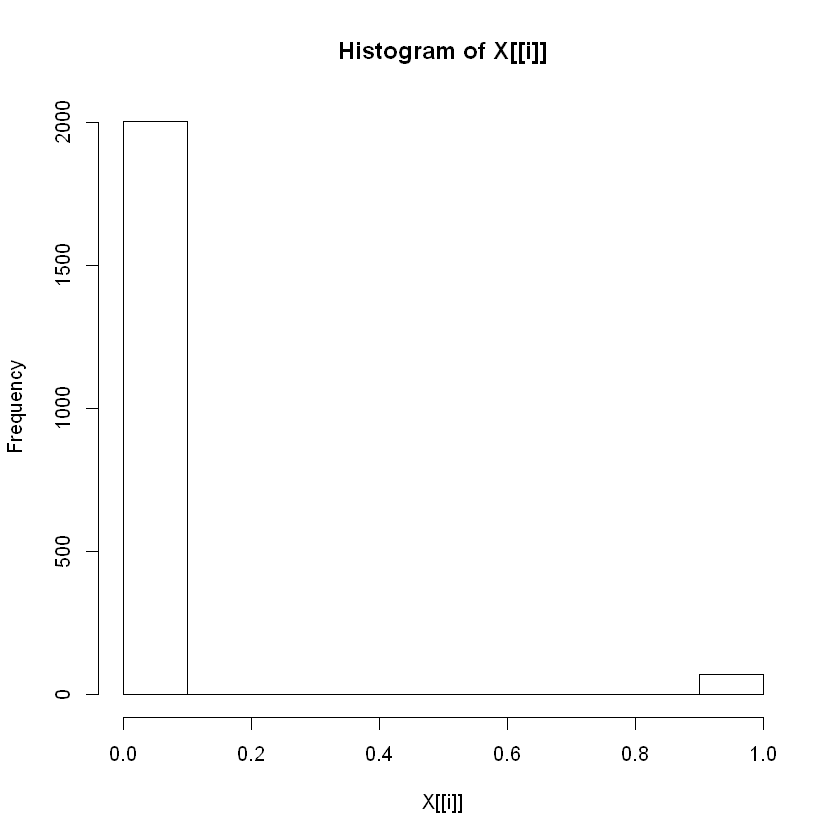

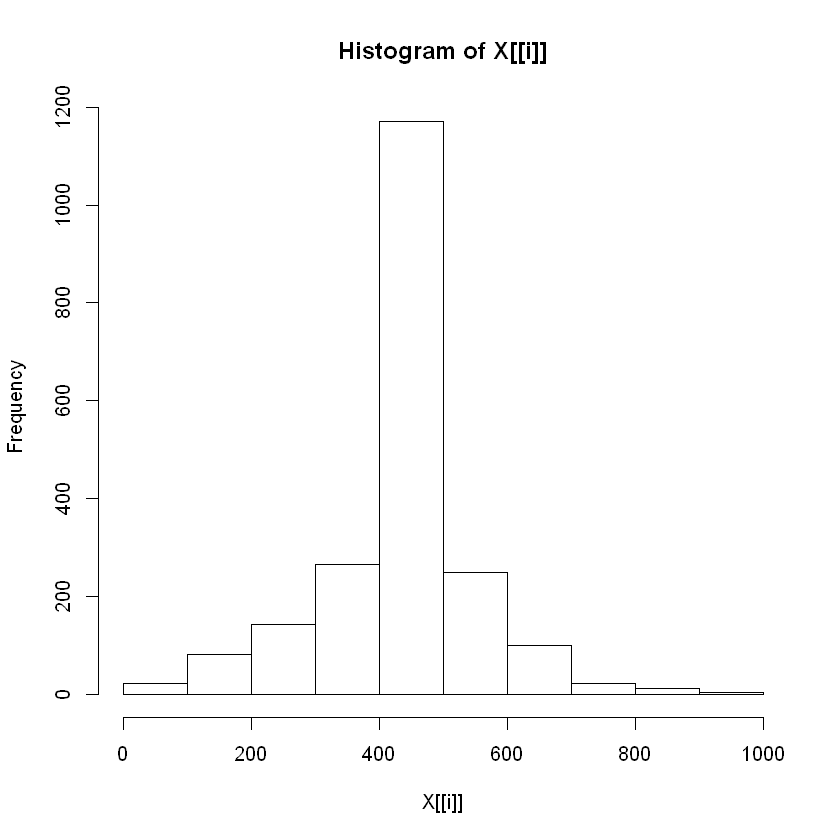

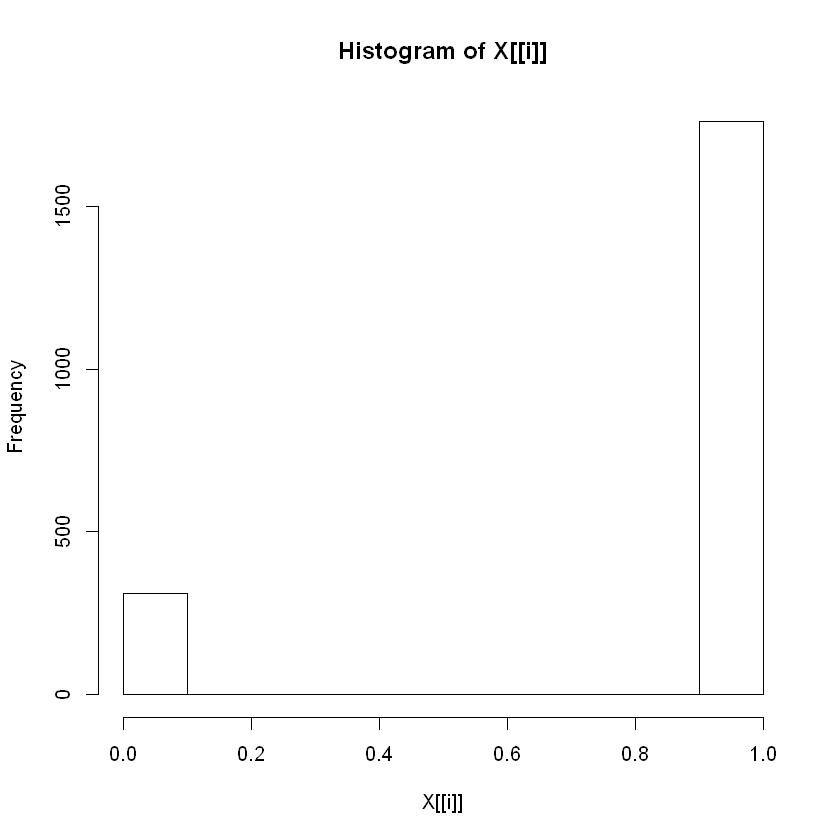

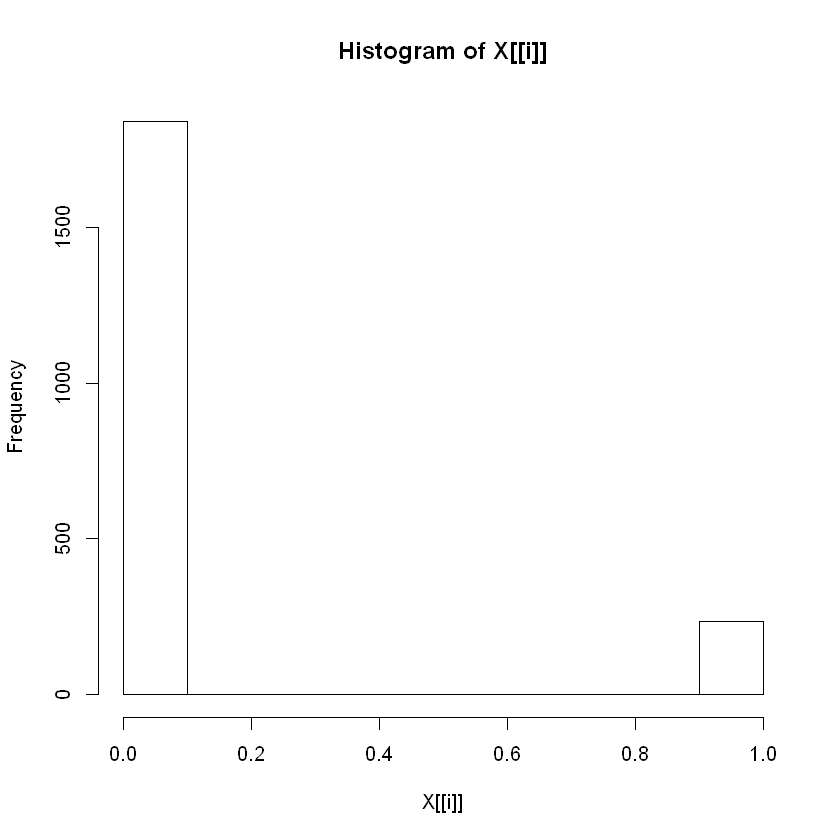

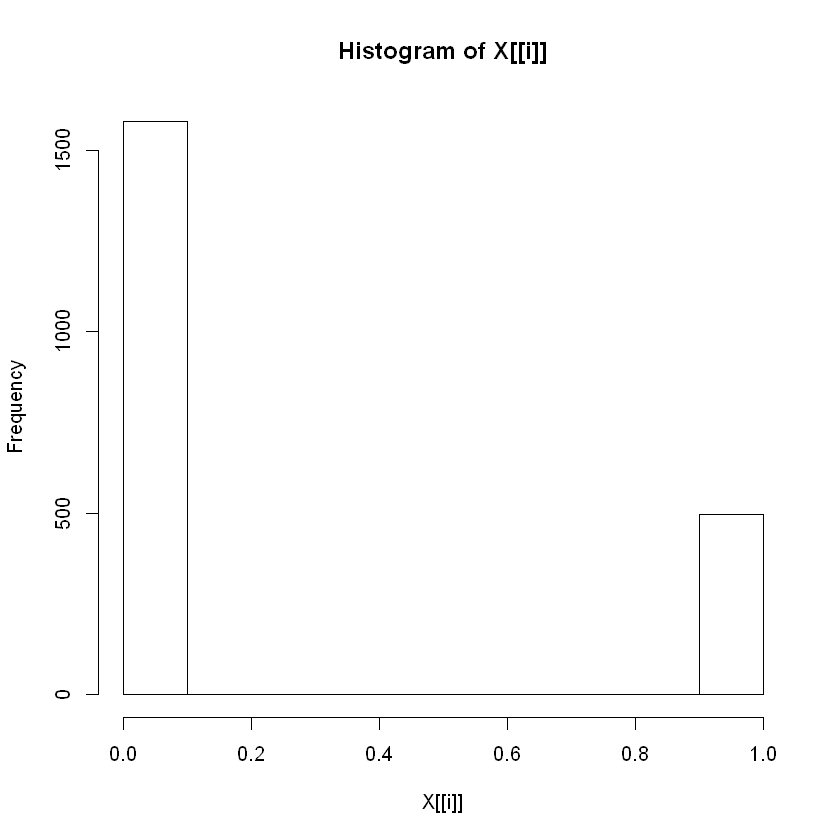

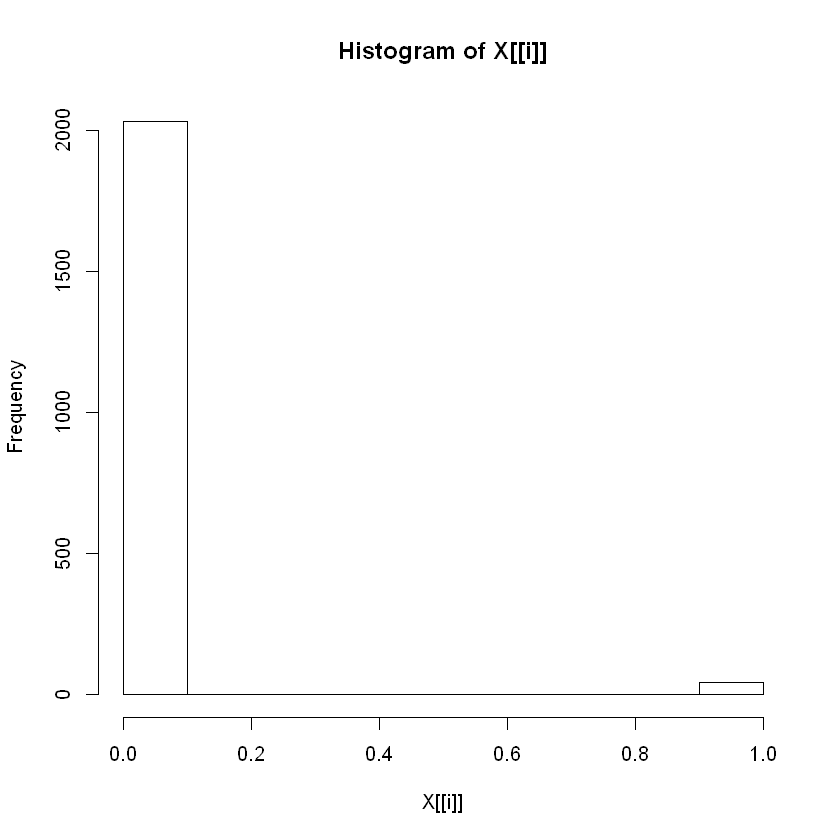

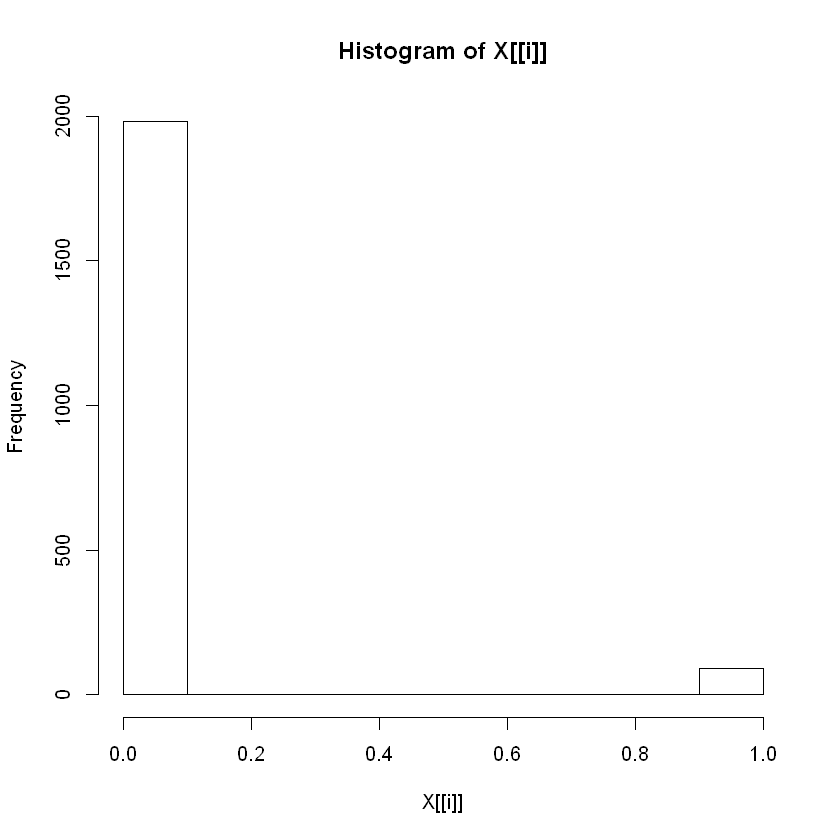

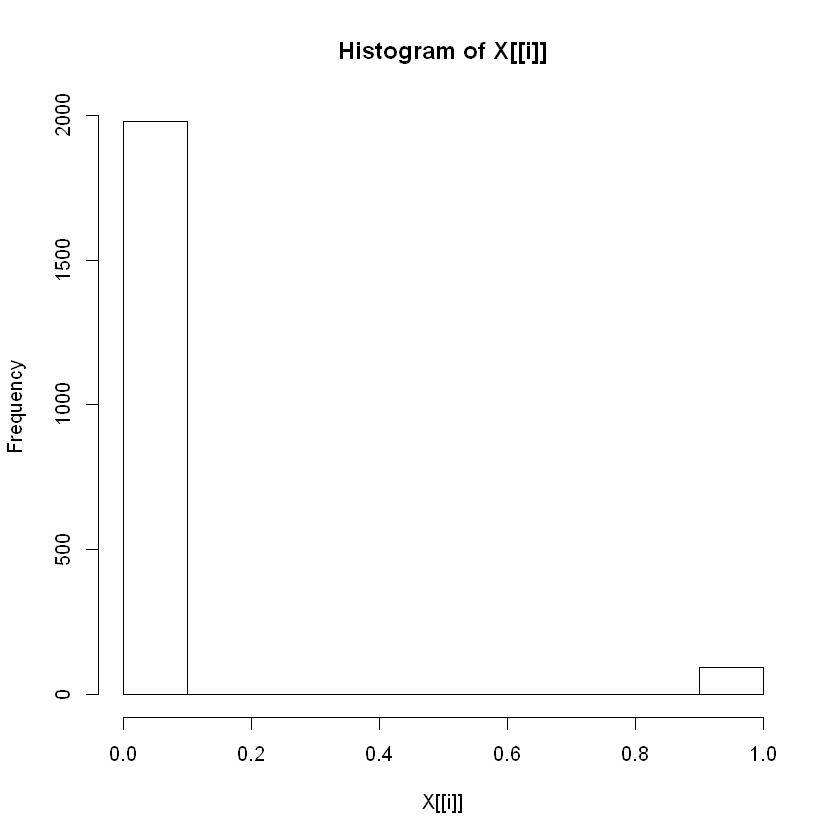

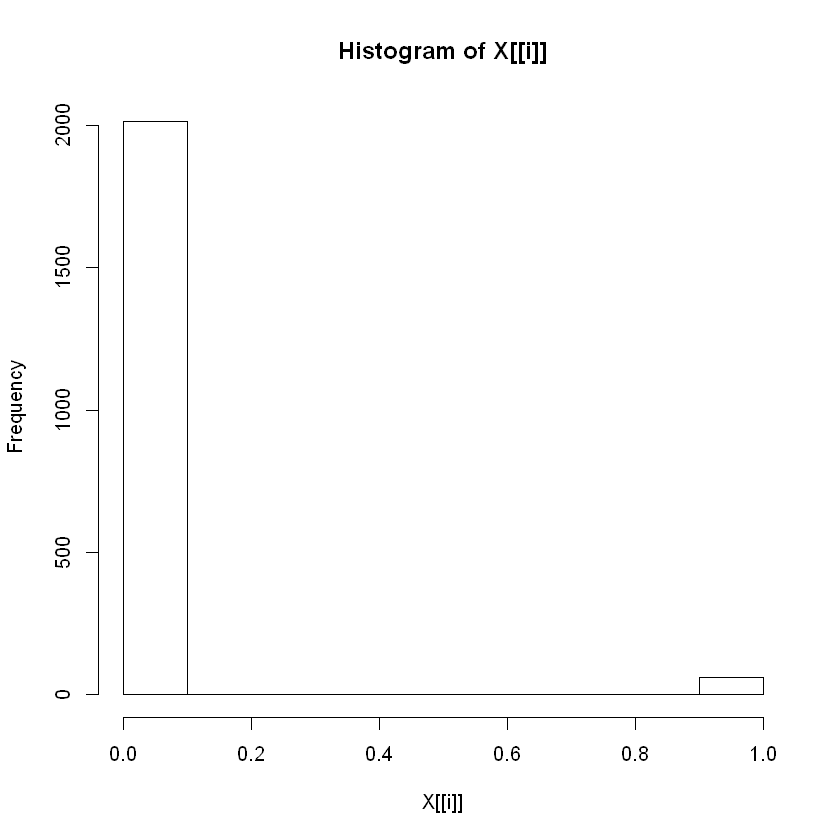

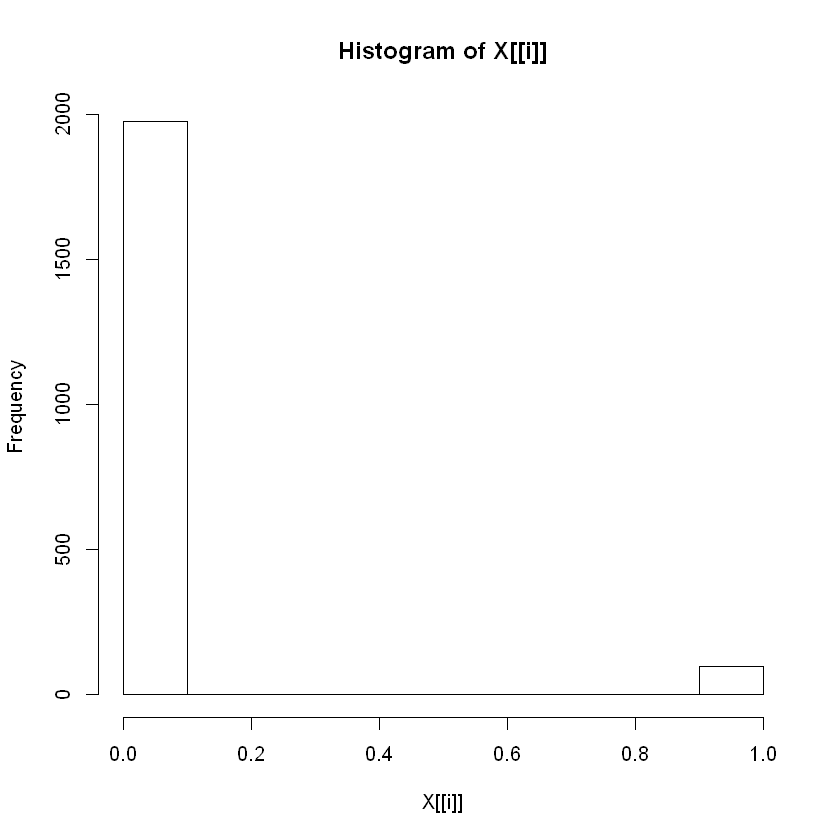

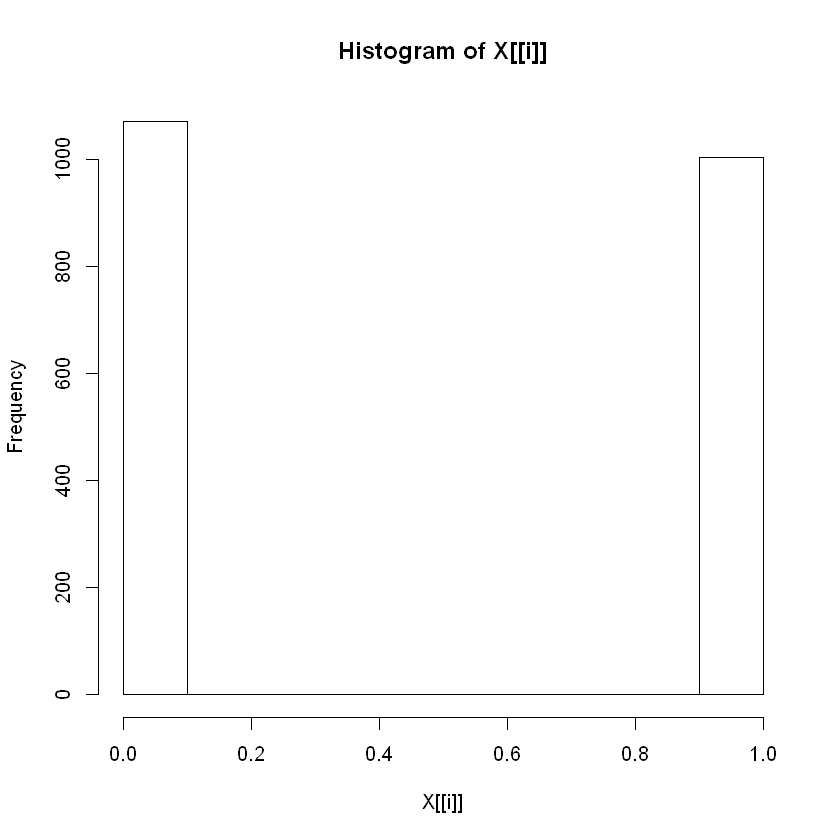

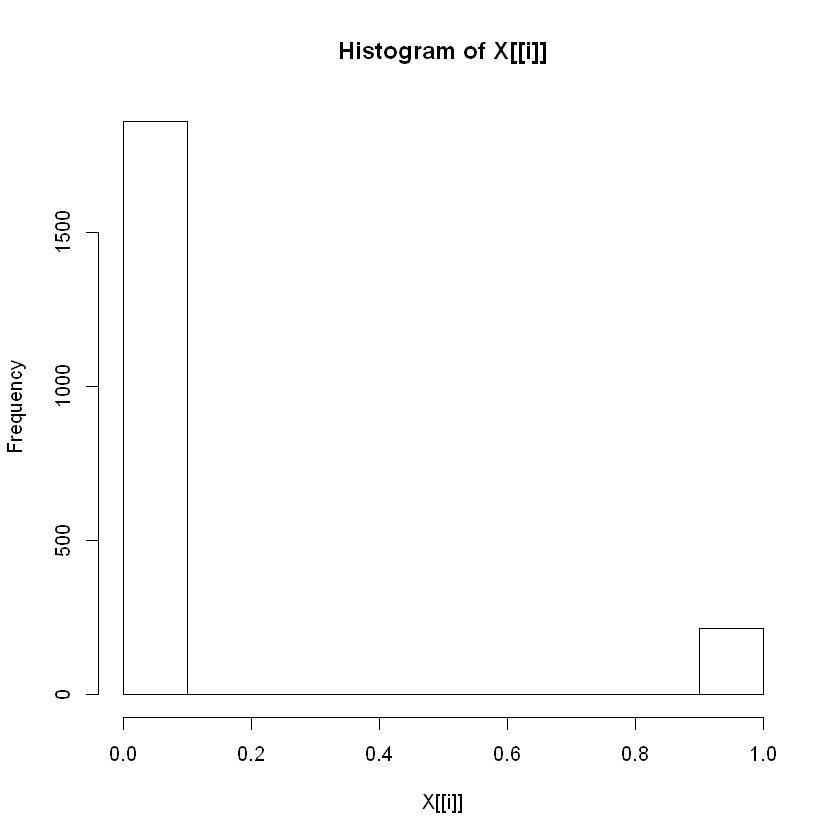

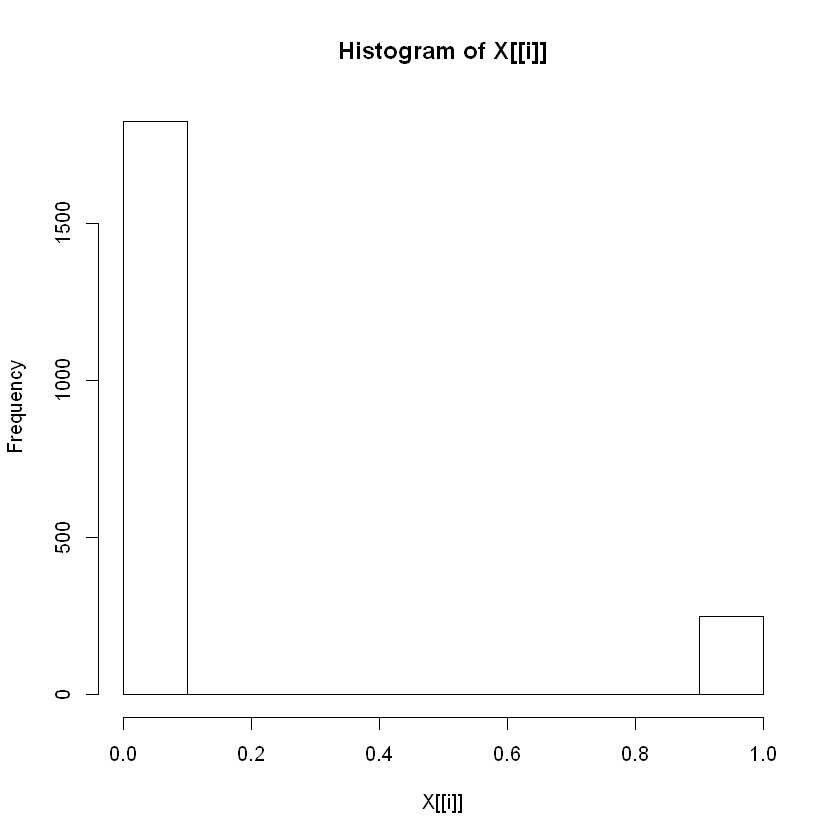

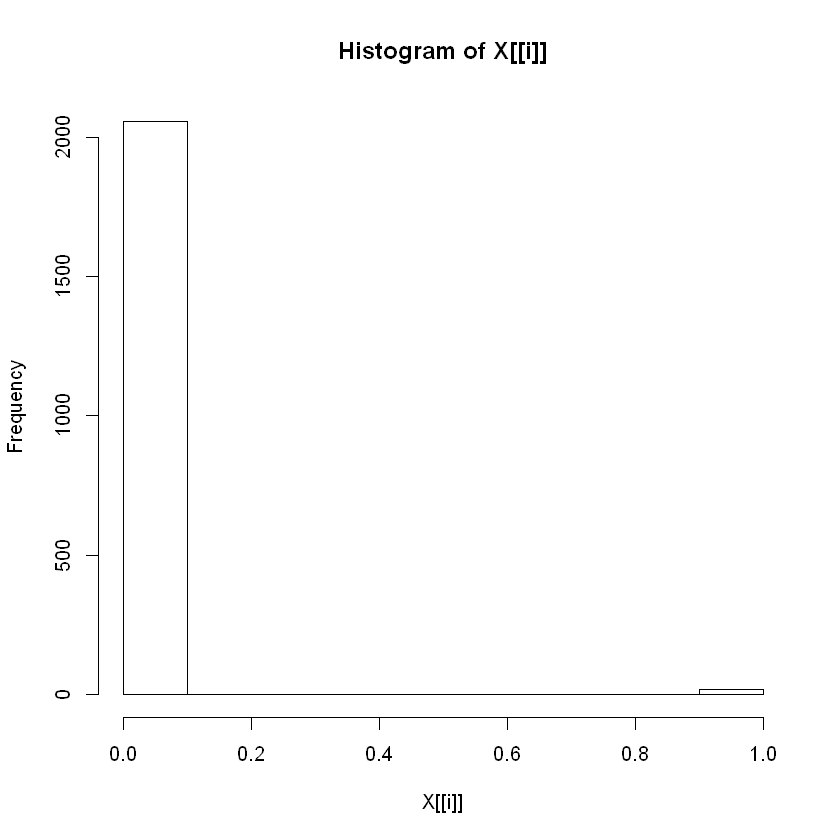

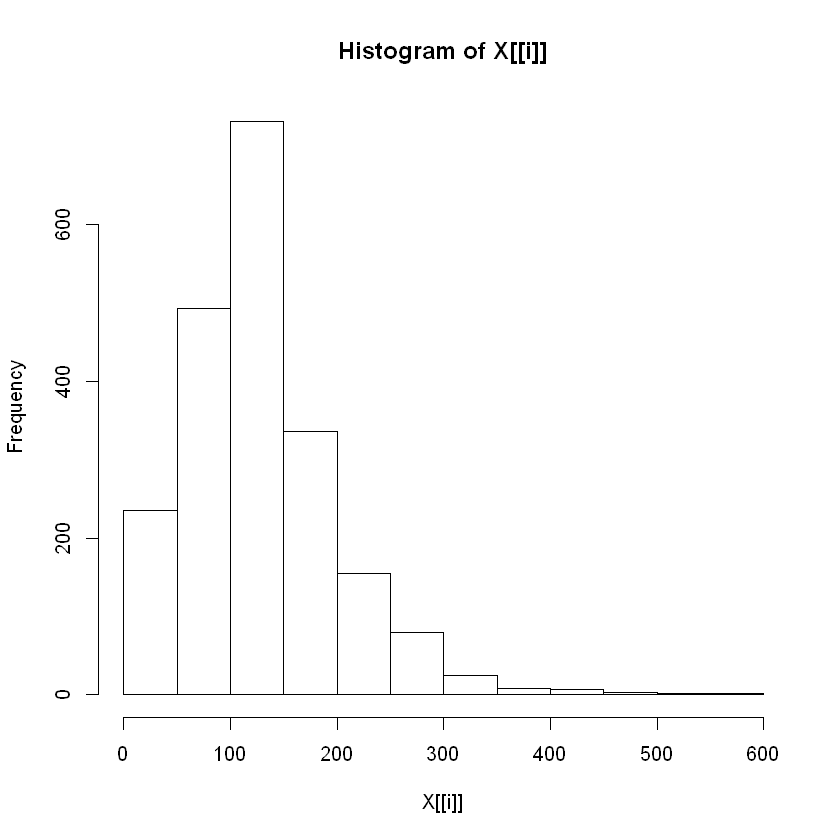

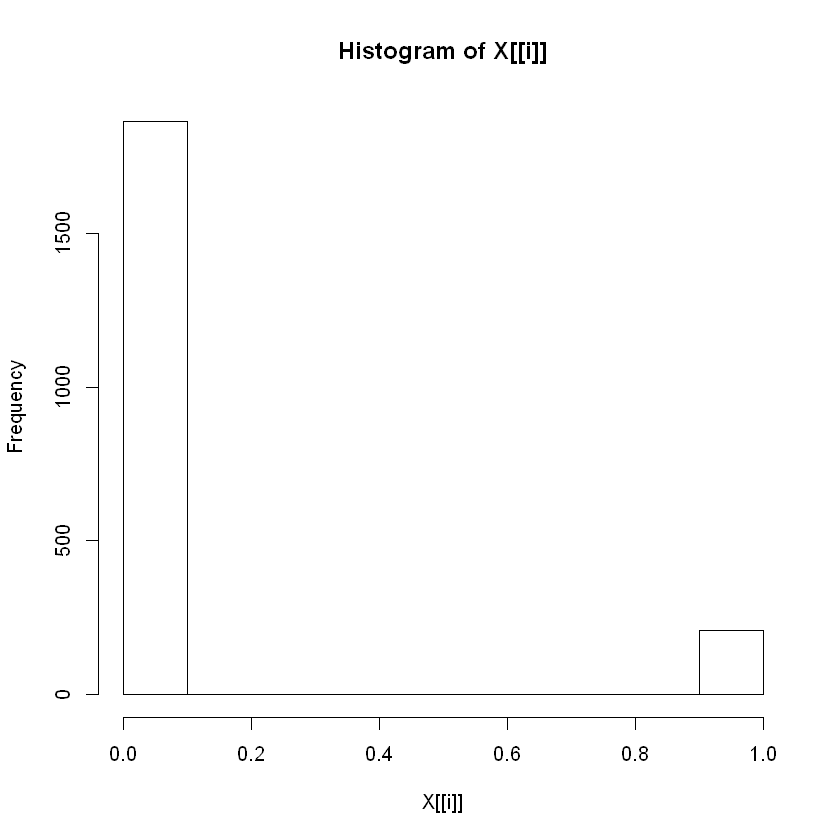

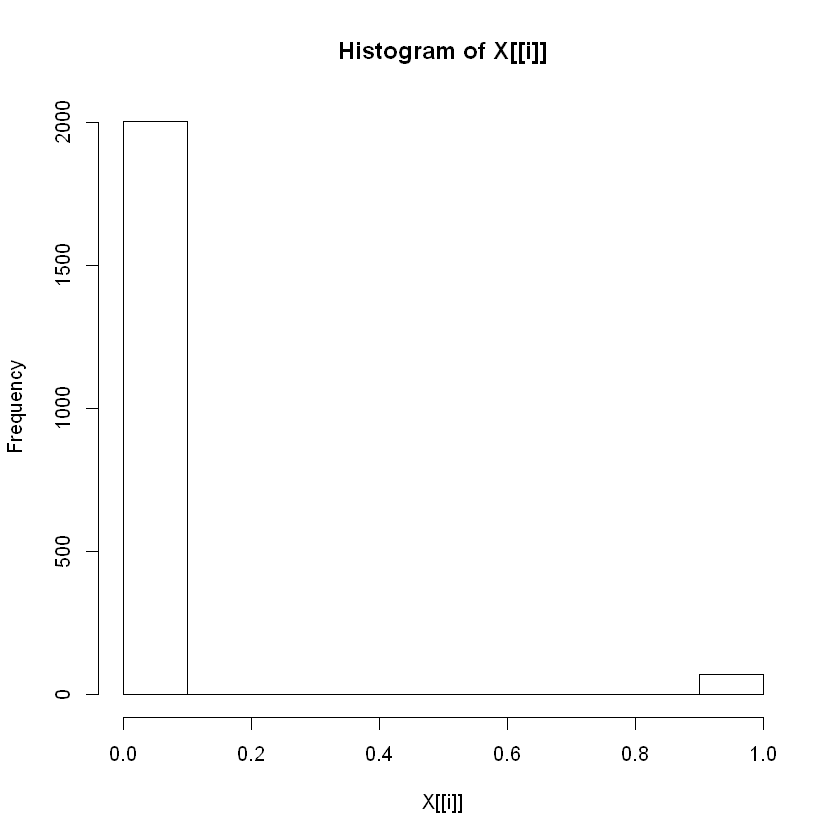

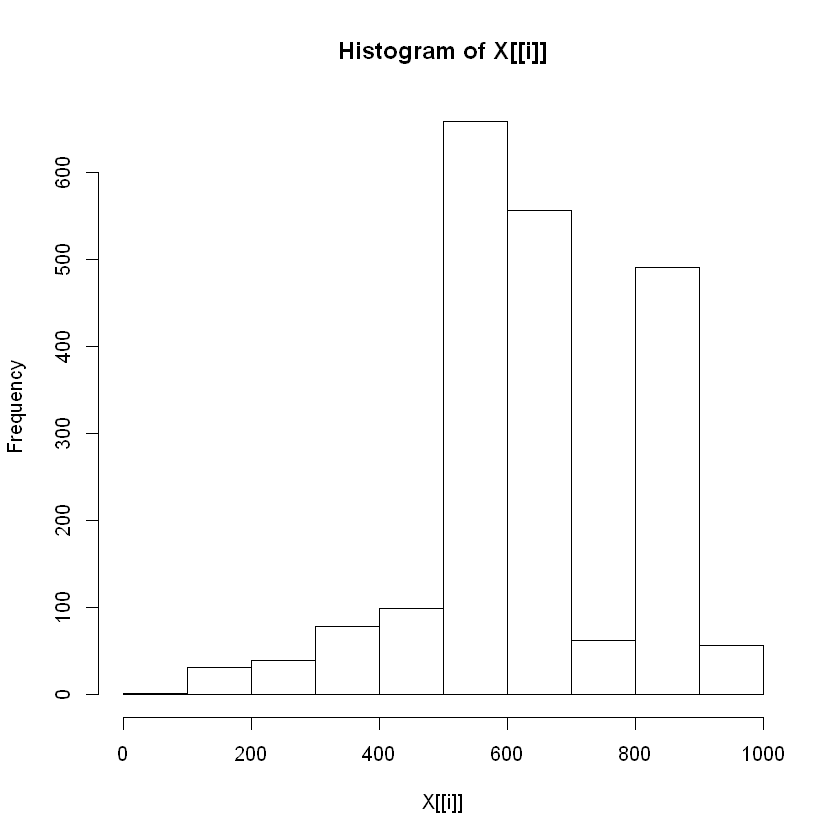

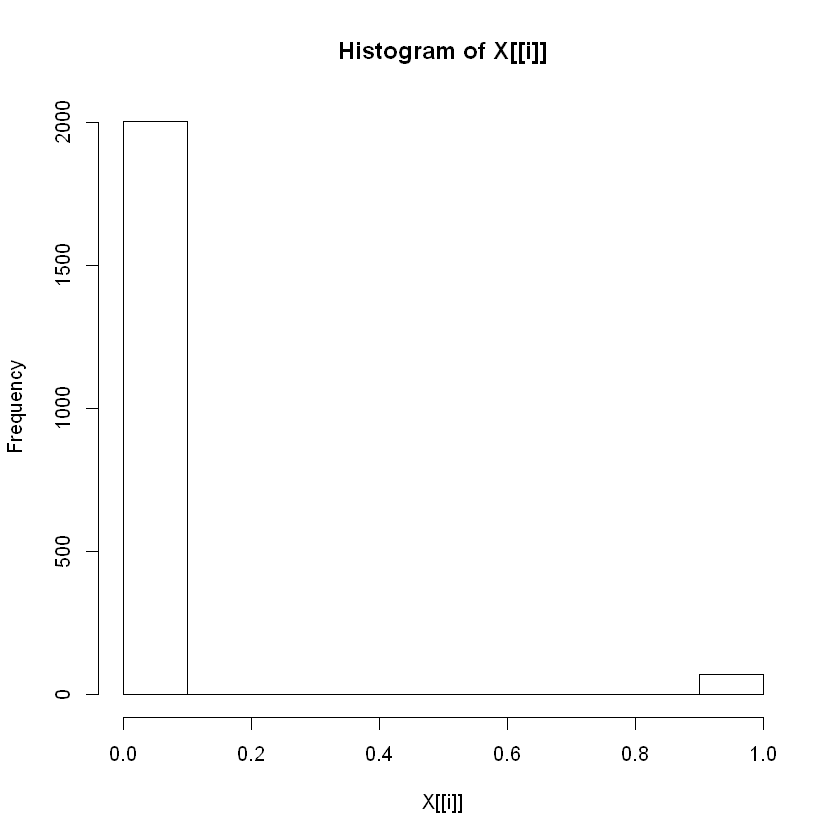

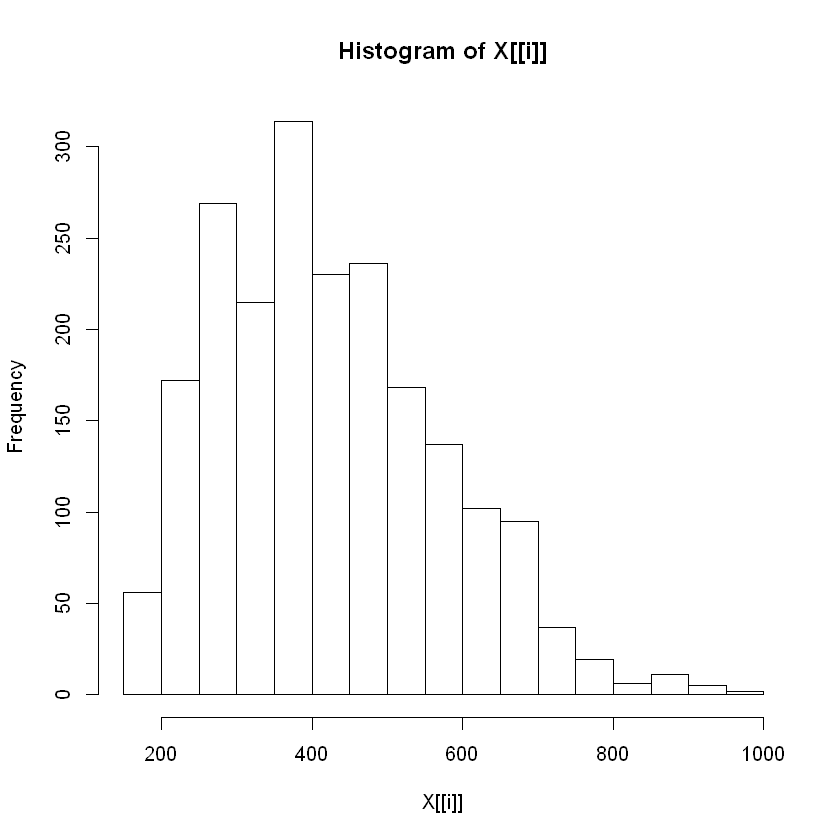

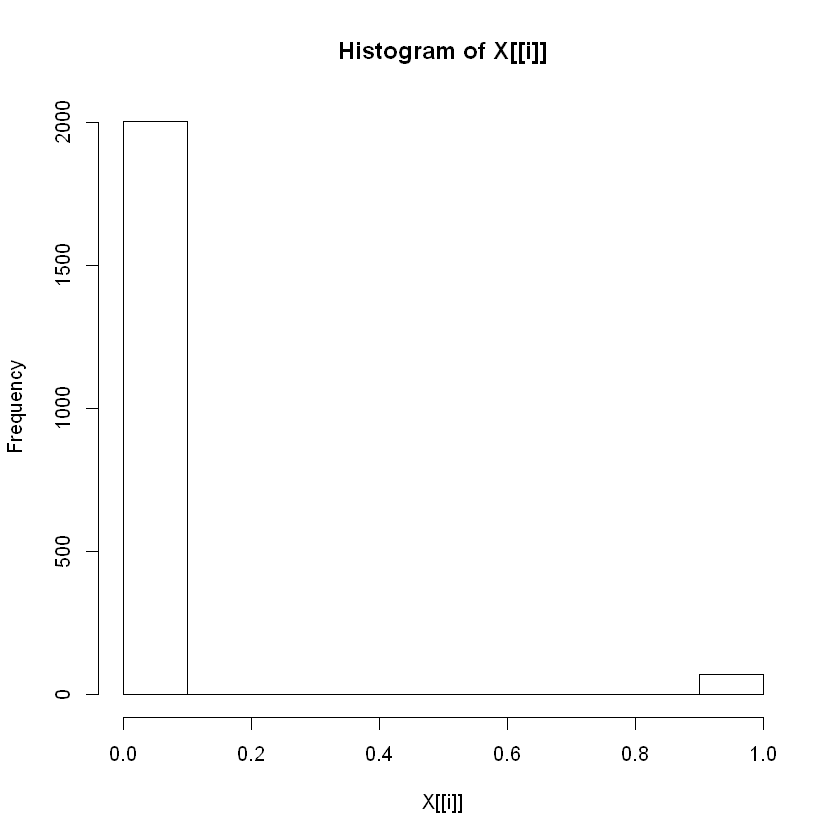

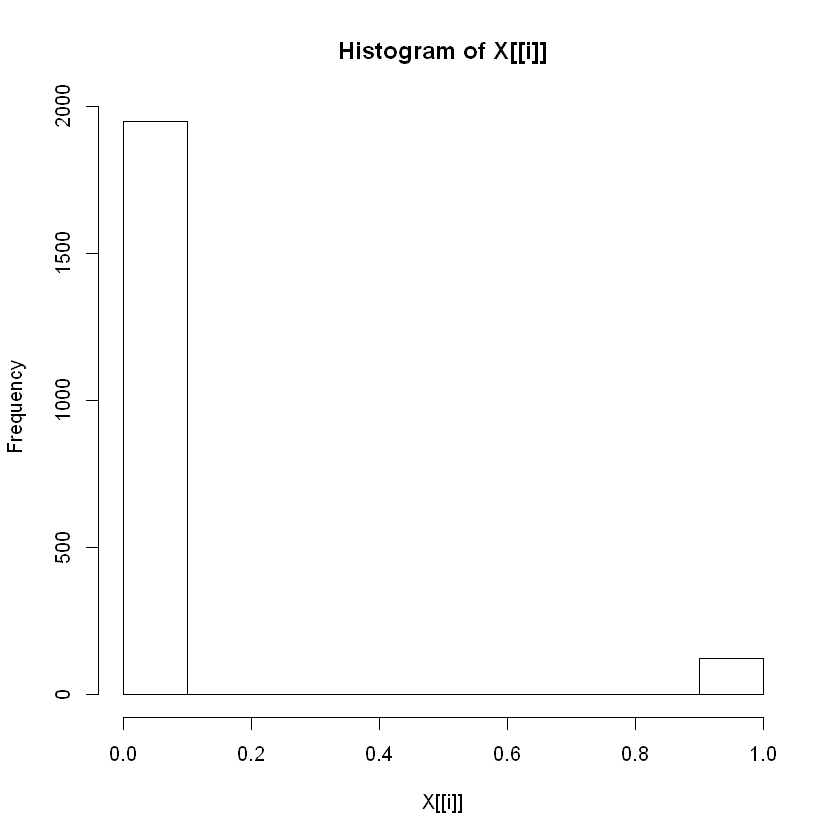

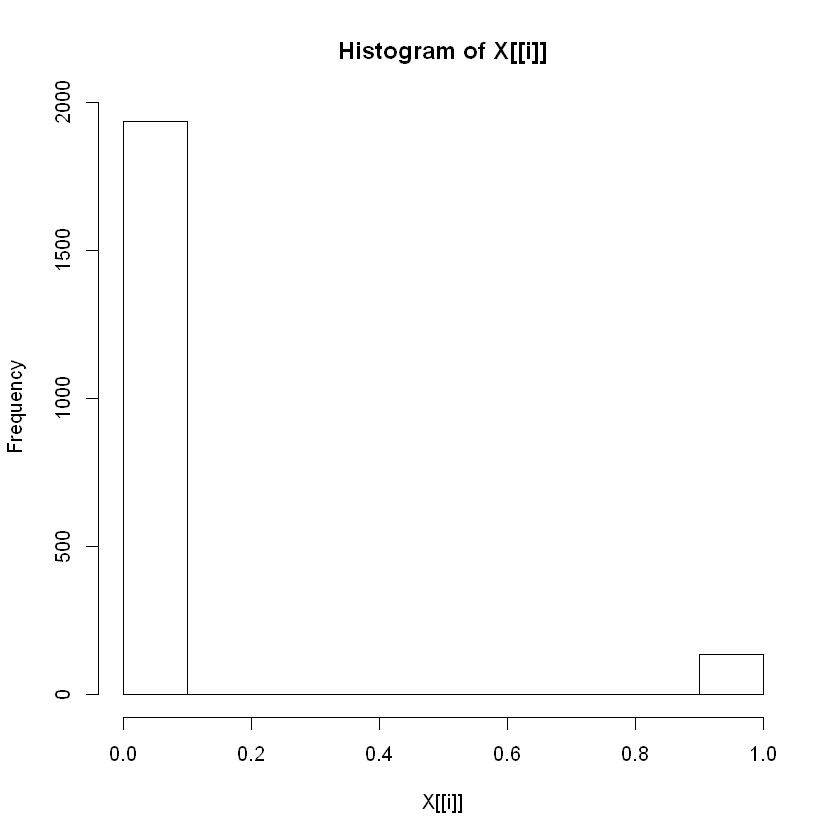

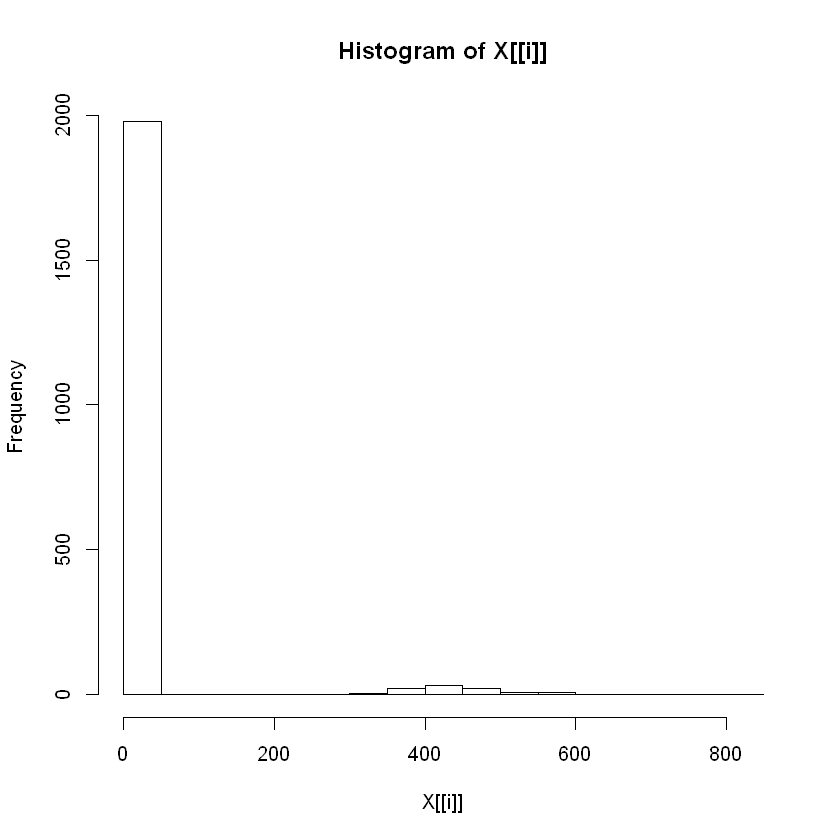

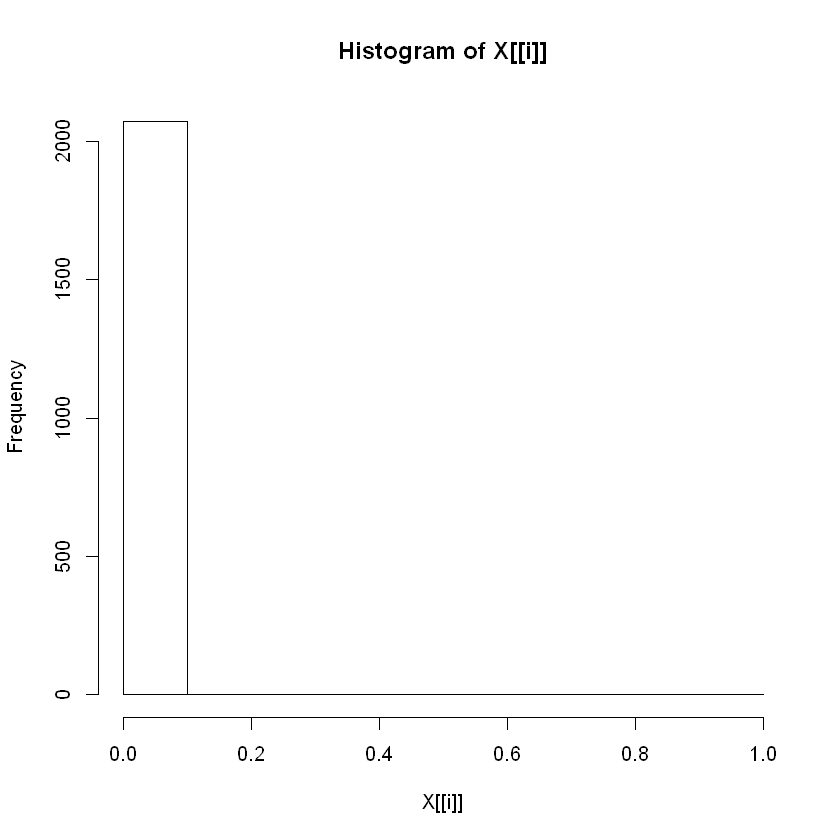

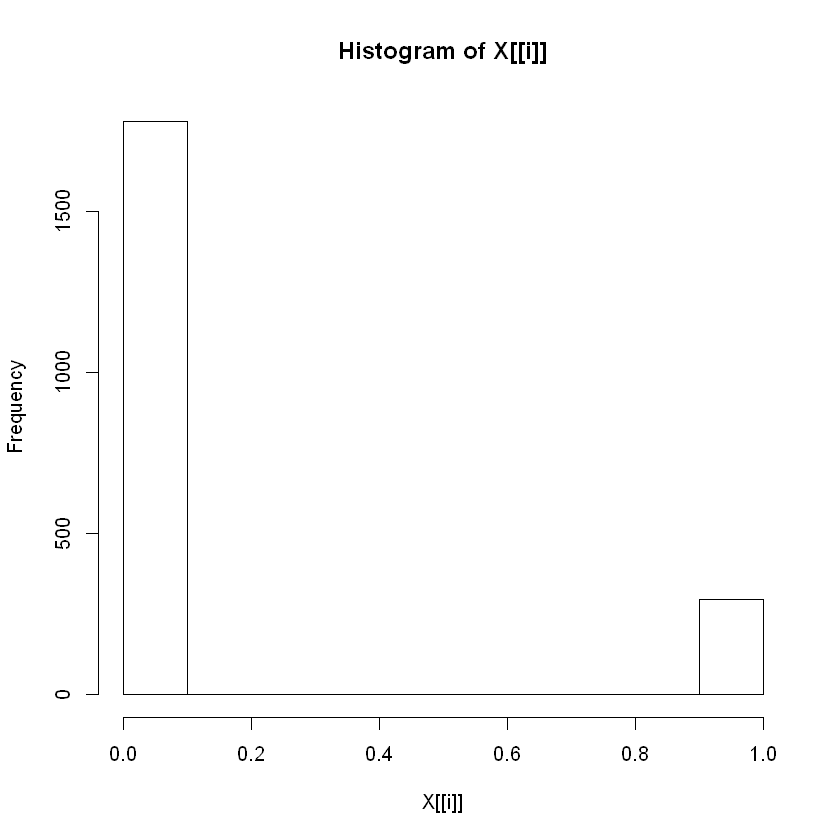

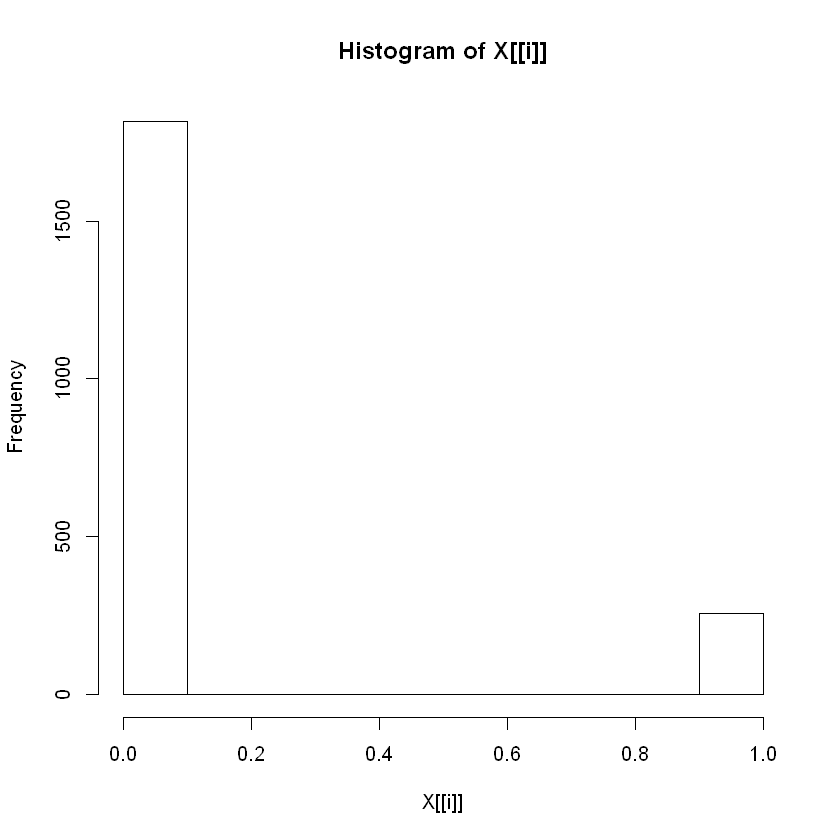

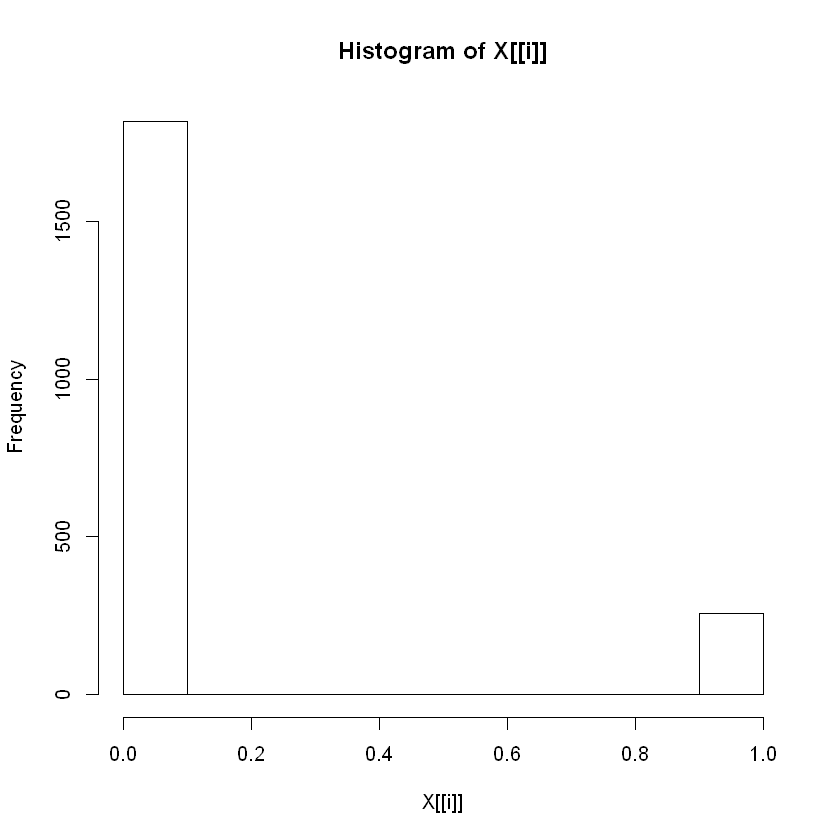

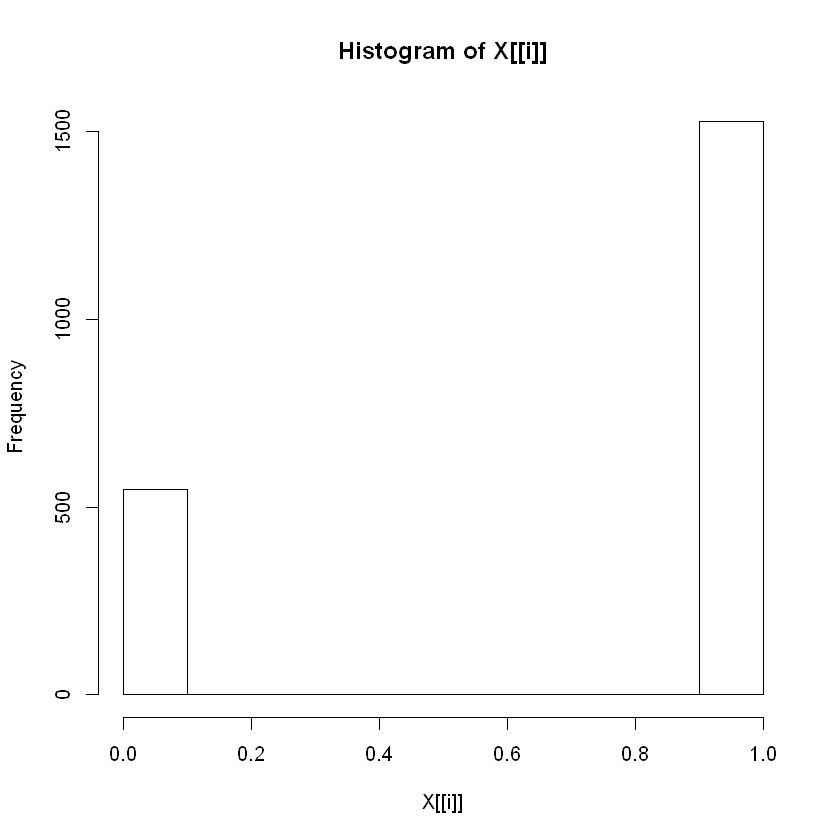

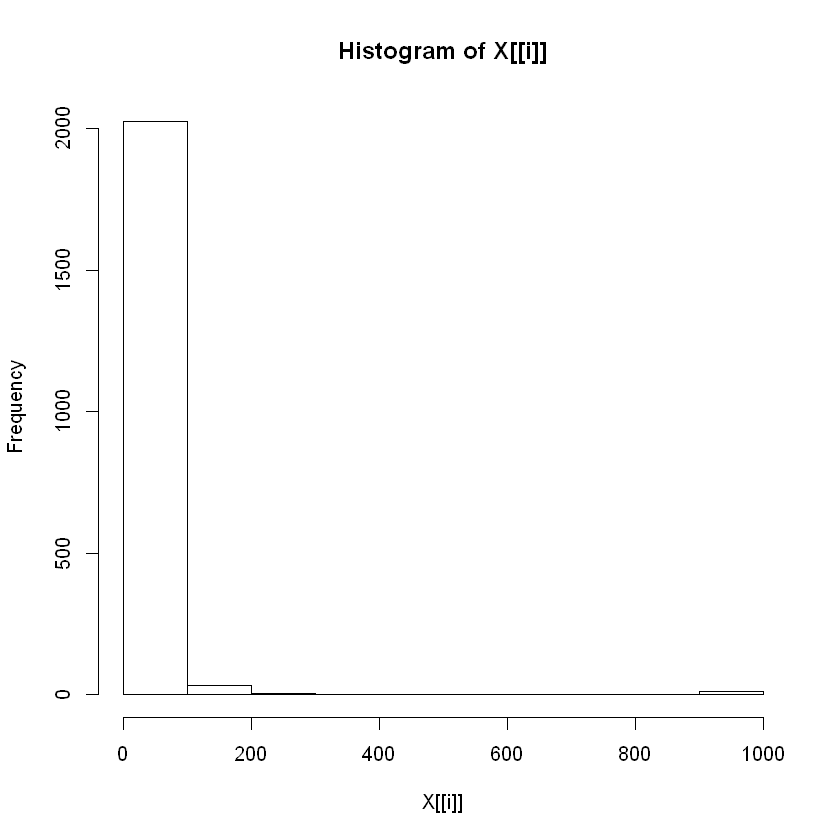

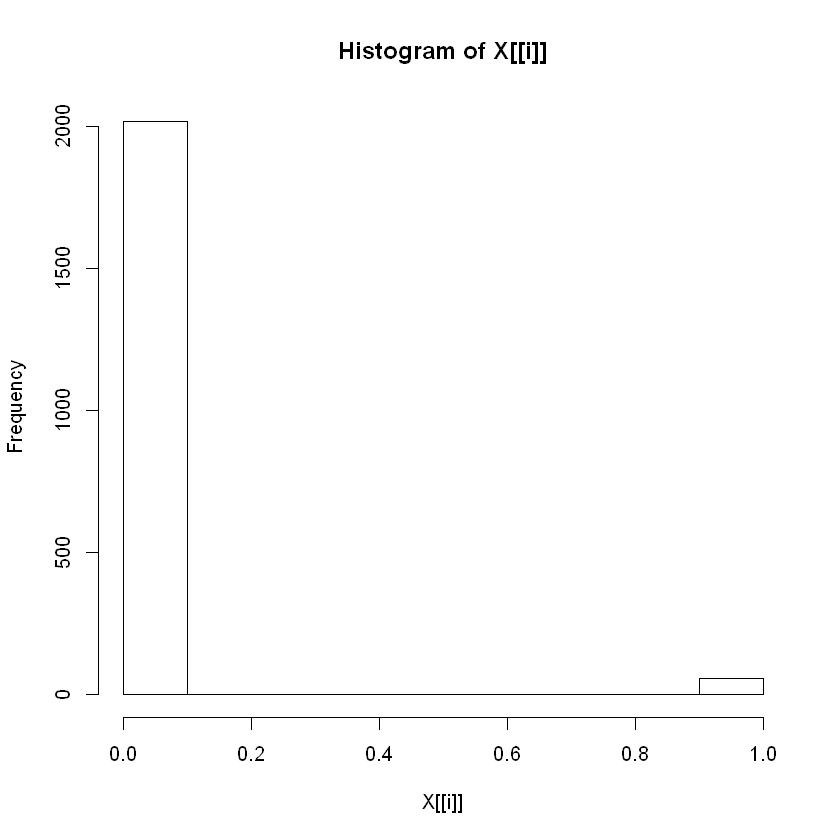

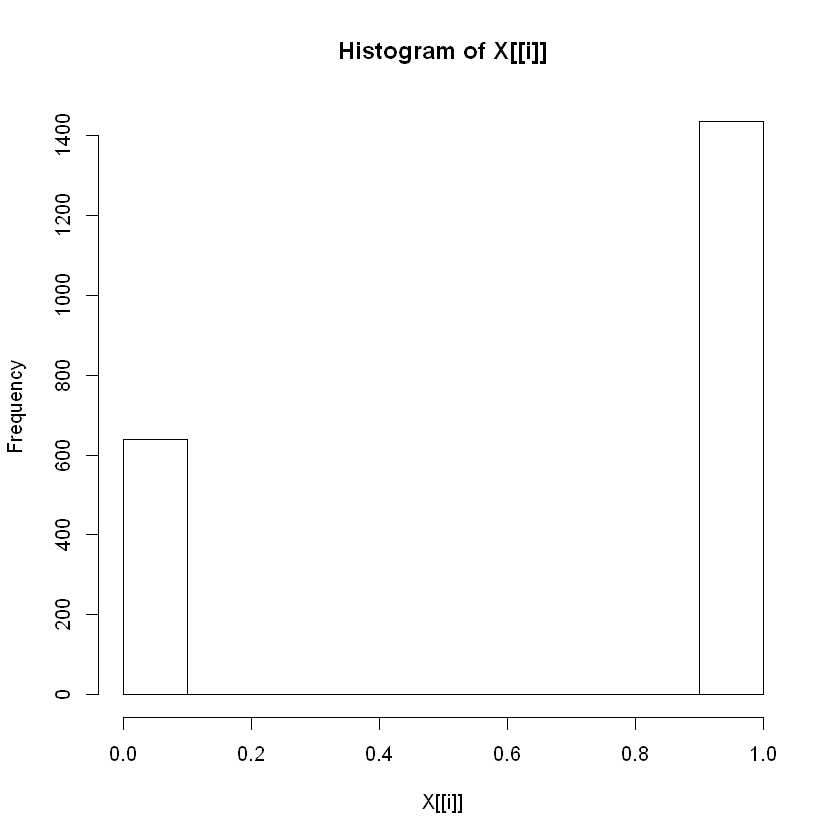

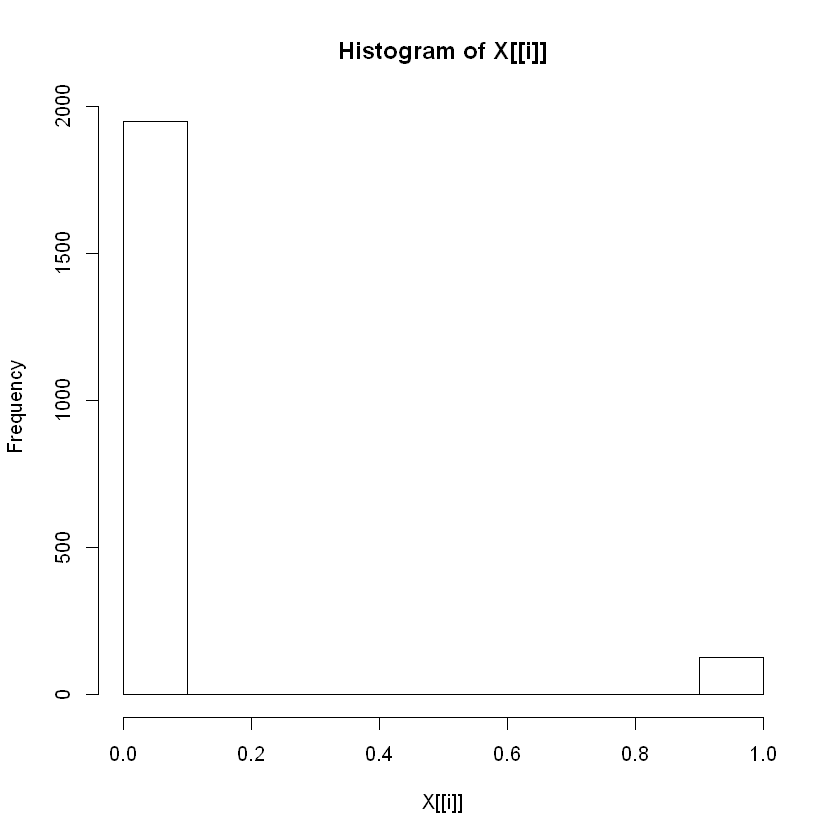

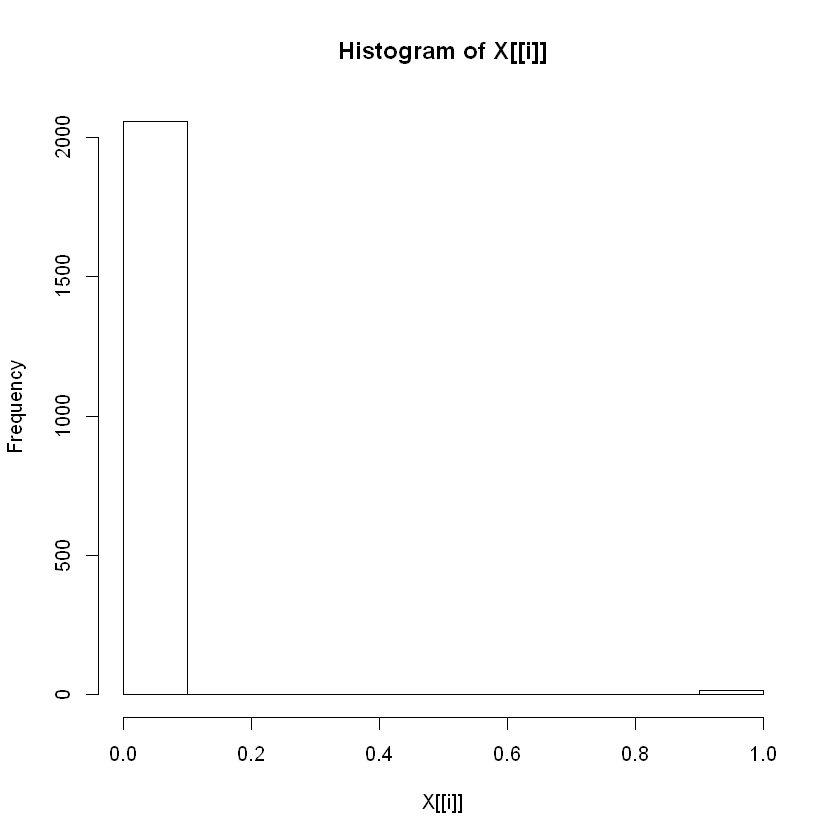

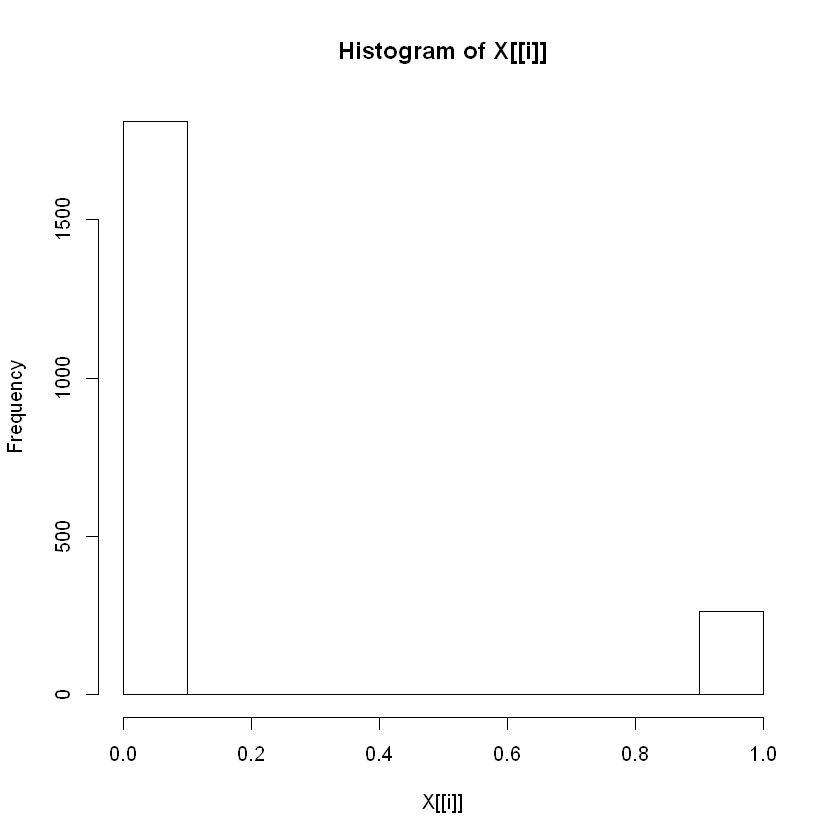

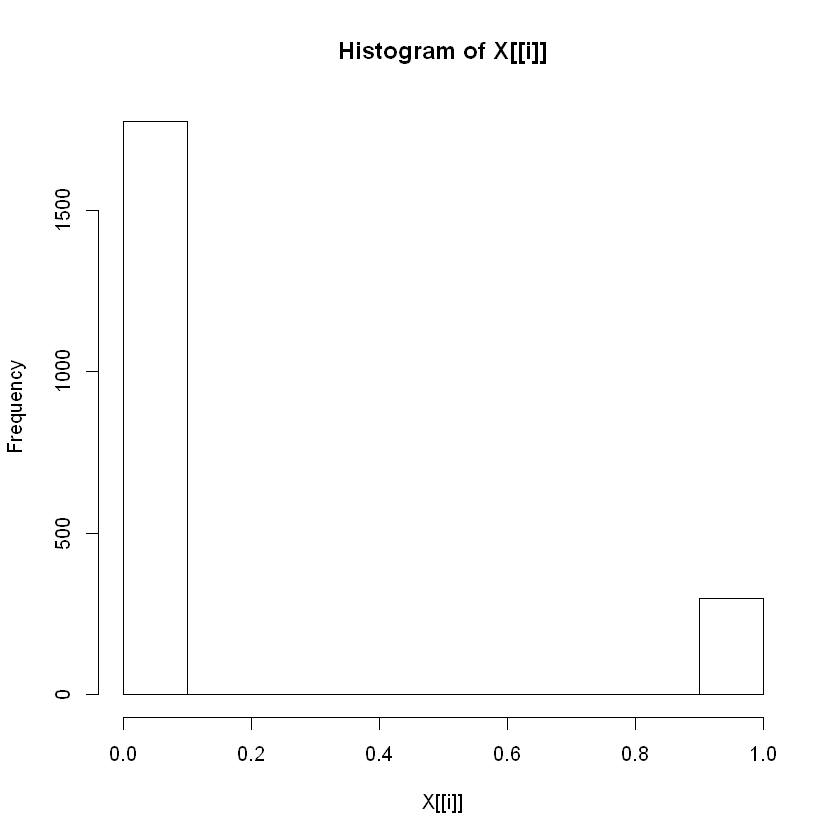

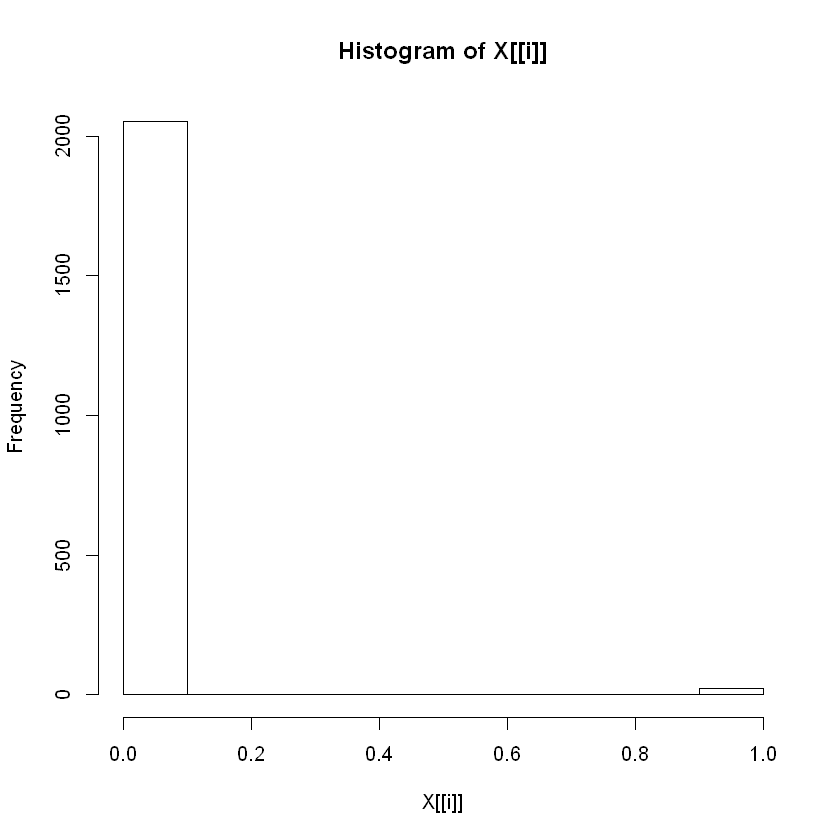

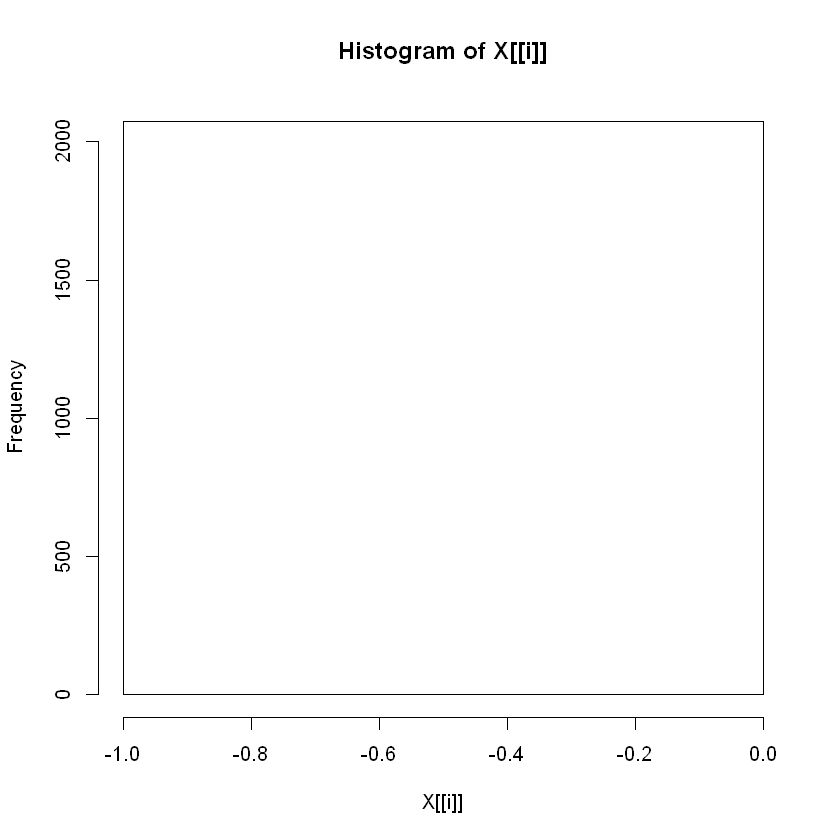

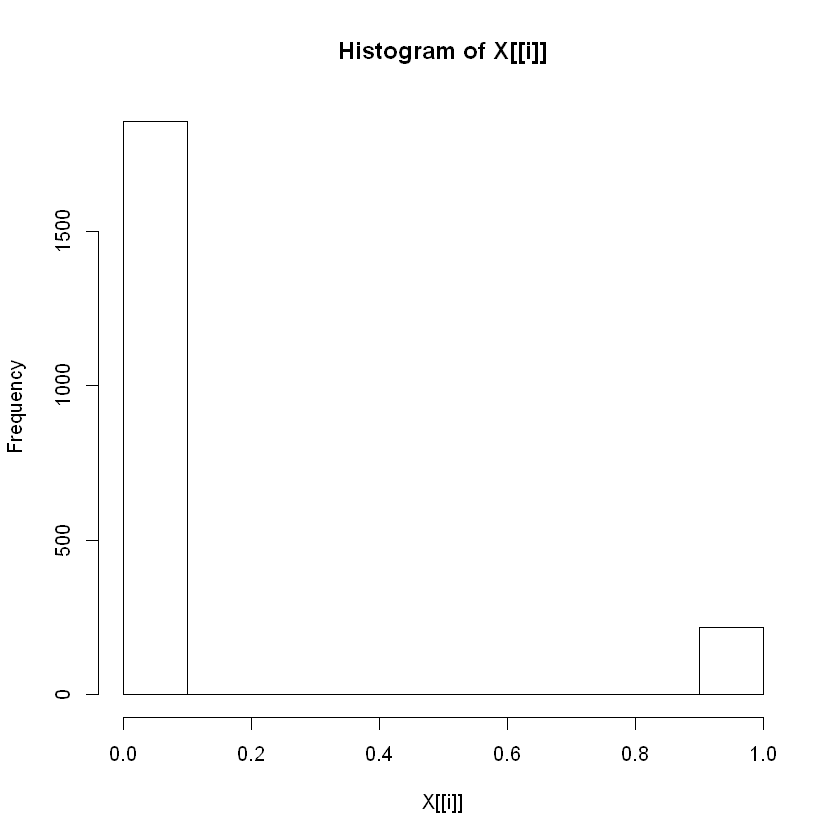

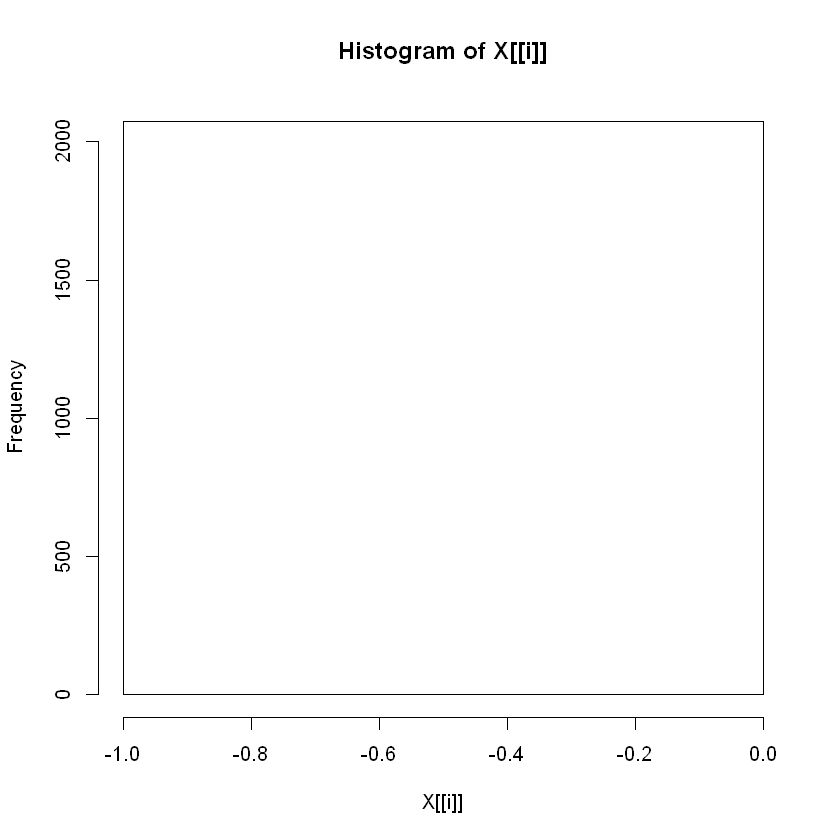

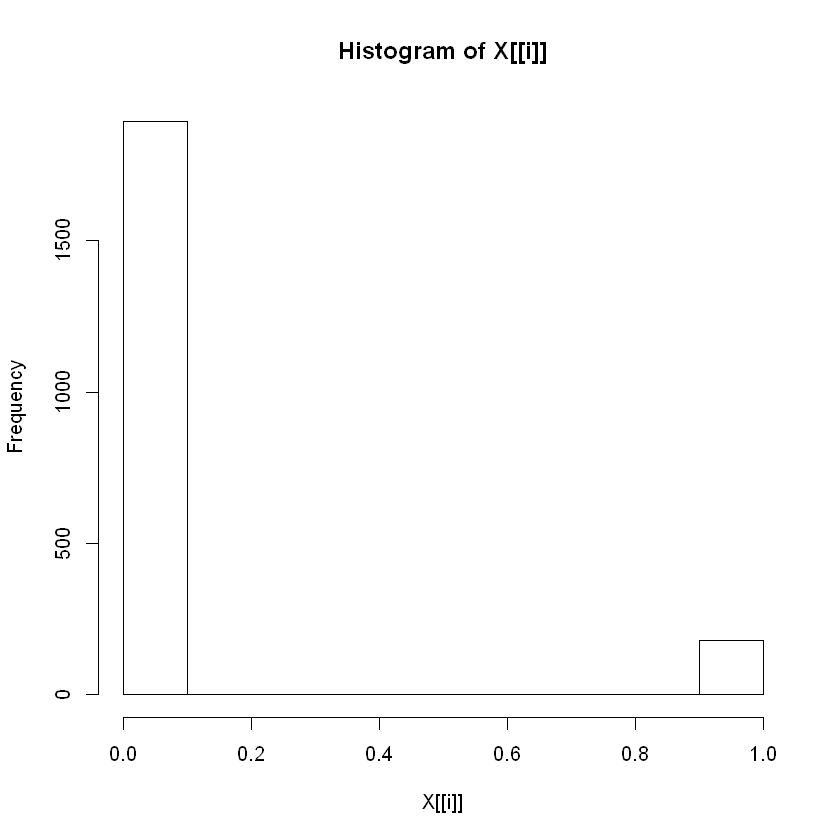

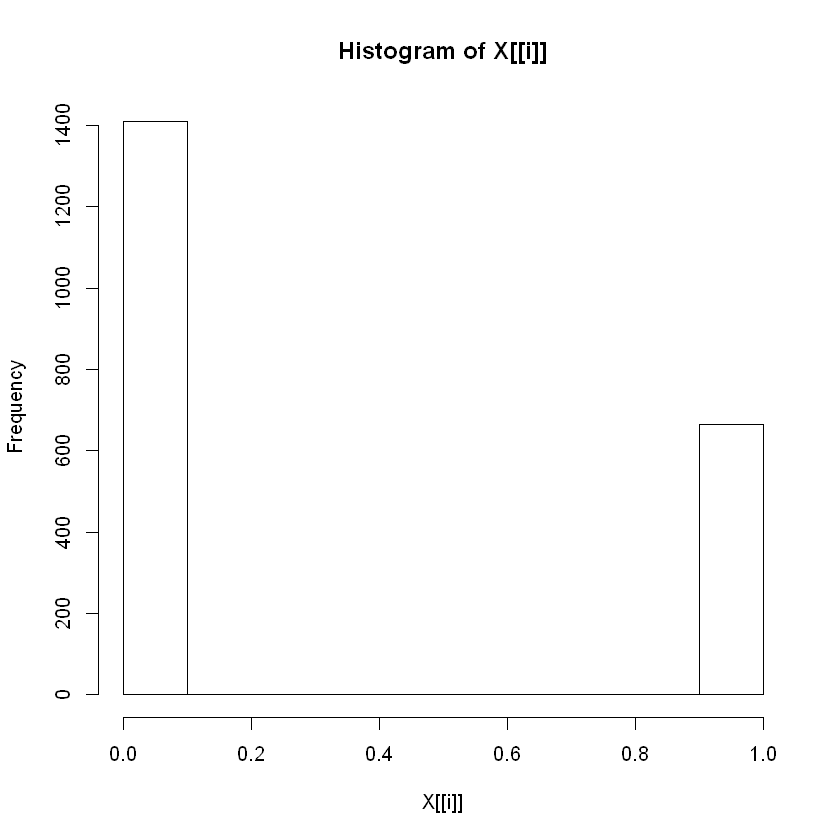

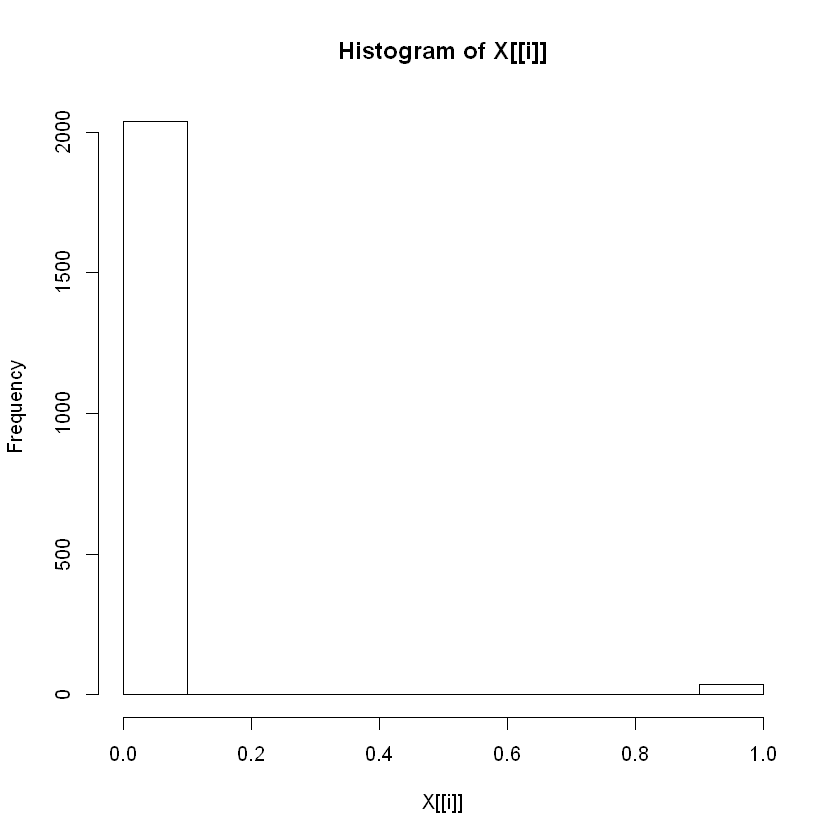

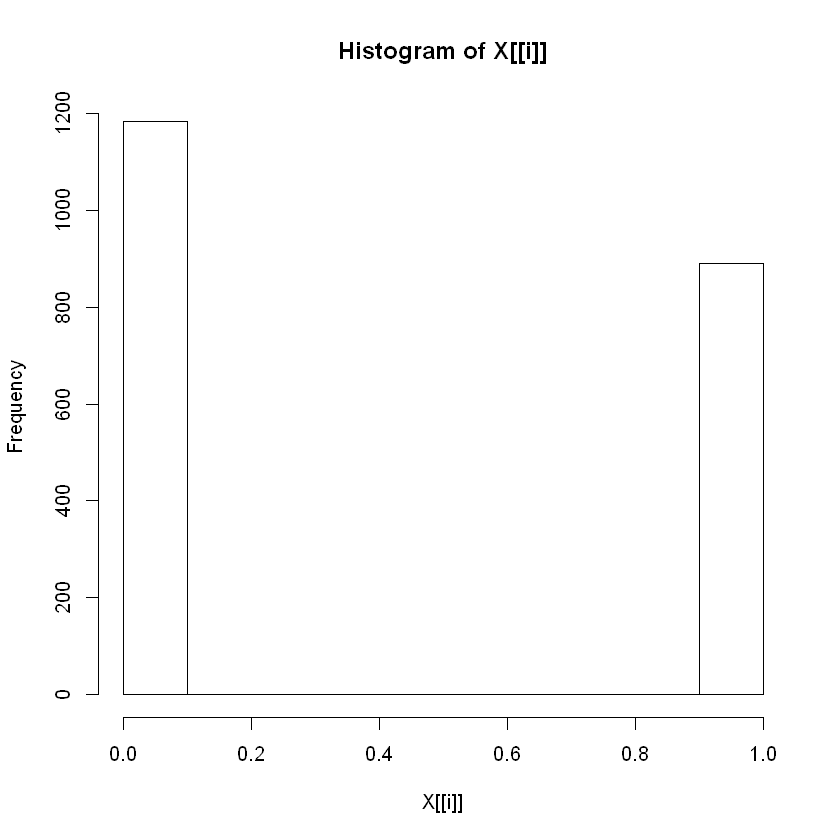

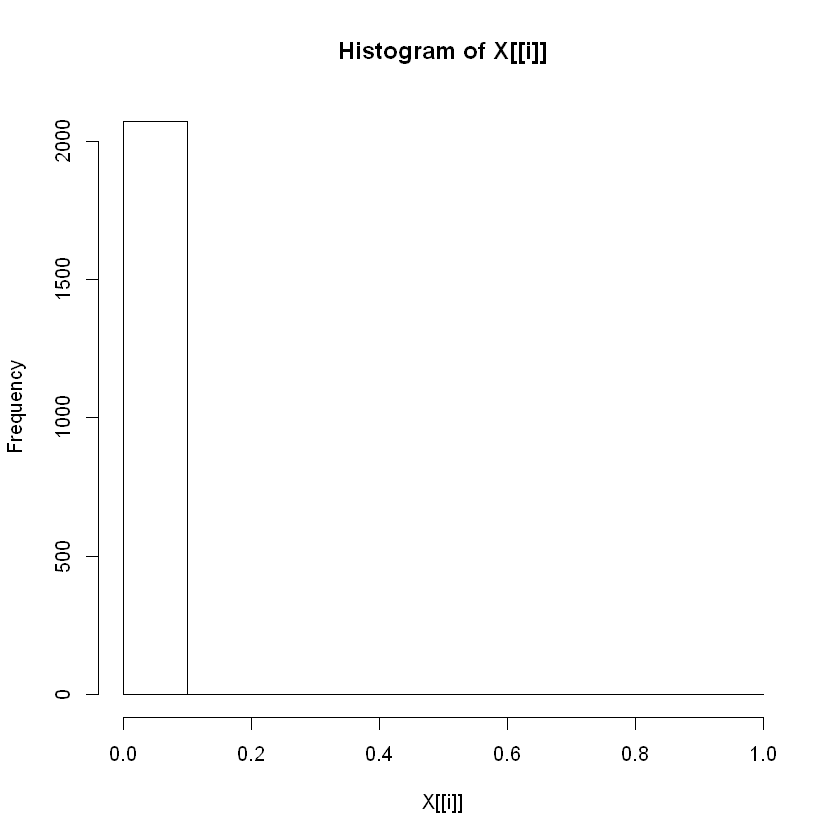

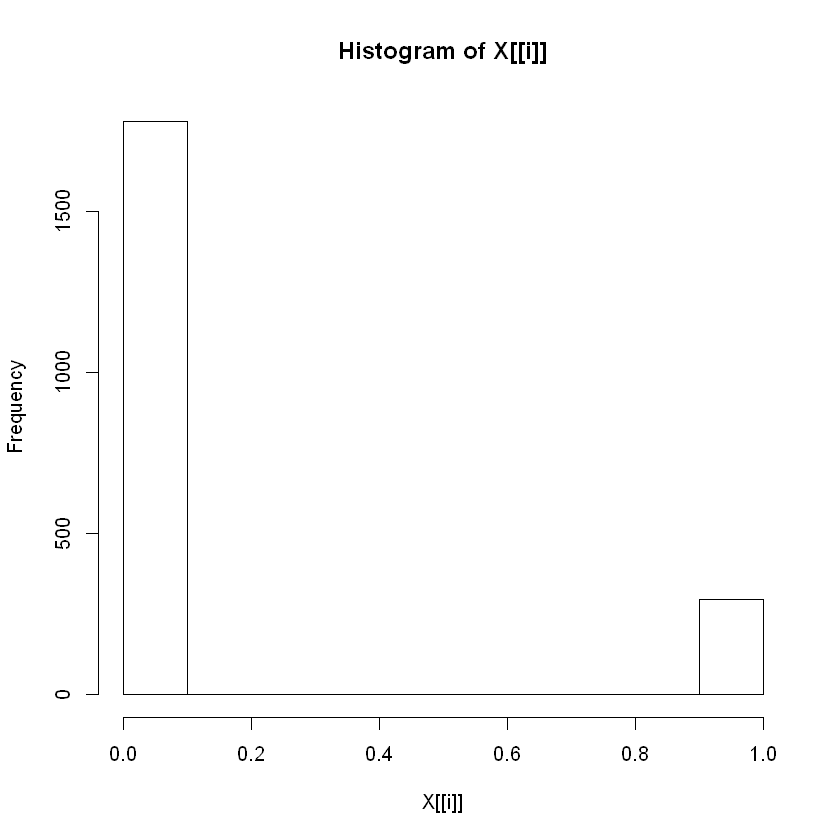

ERROR: Error in hist.default(X[[i]], ...): 'x' must be numeric


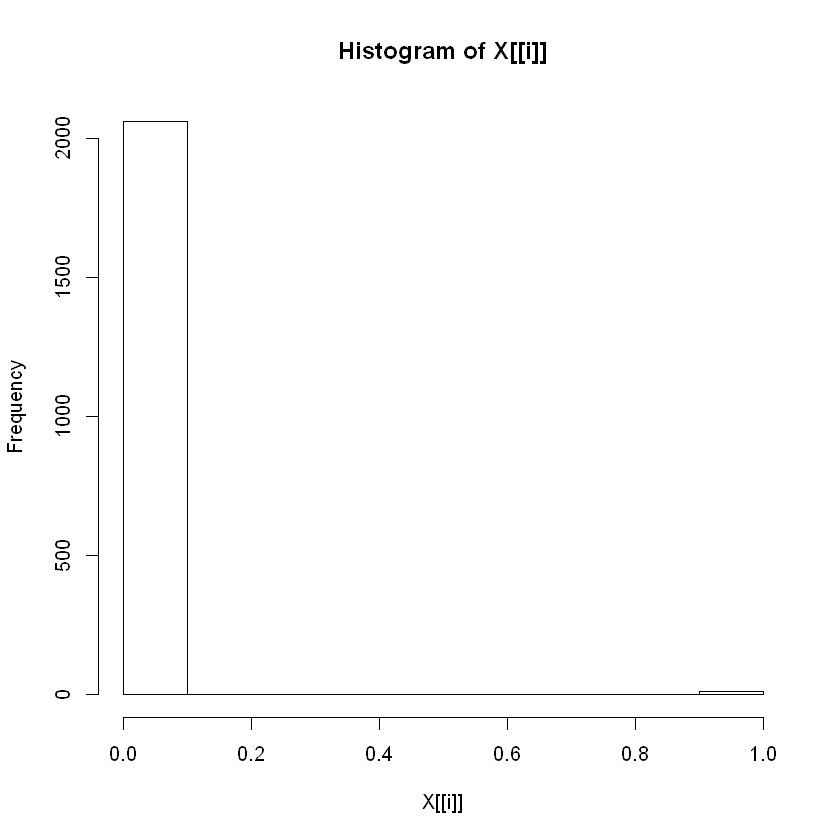

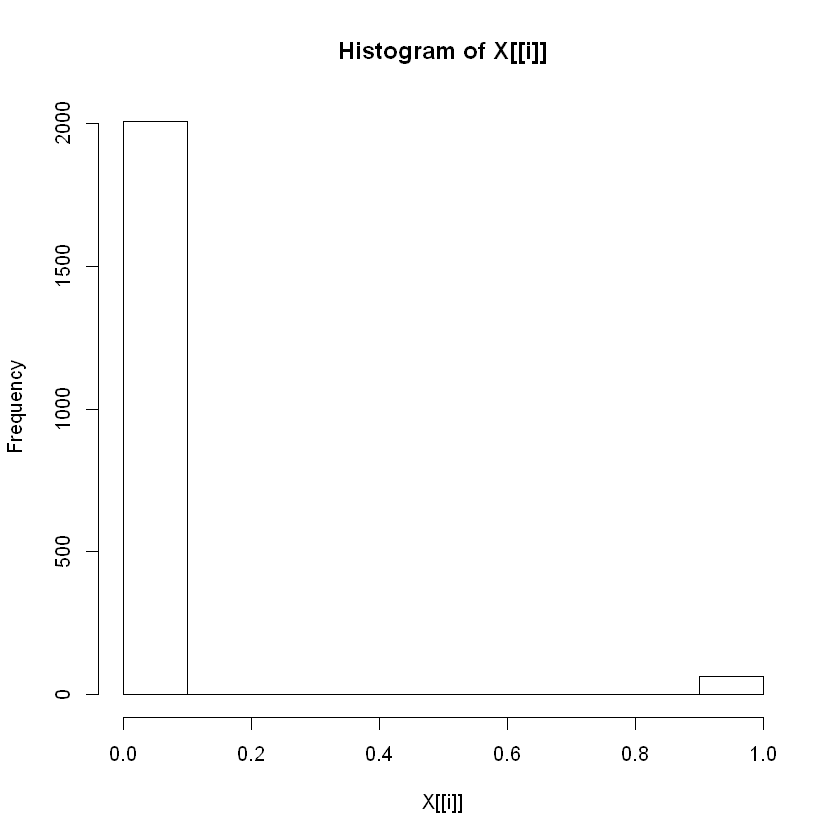

In [13]:
sapply(alldata, hist)

In [14]:
sapply(alldata, str)

 int [1:2074] 27 30 37 29 33 33 29 27 28 27 ...
 int [1:2074] 1 0 0 0 1 0 1 1 1 0 ...
 int [1:2074] 1 1 1 1 1 0 0 1 1 1 ...
 int [1:2074] 1 1 1 1 0 1 1 1 1 0 ...
 int [1:2074] 18 18 1 14 2 5 16 13 0 8 ...
 int [1:2074] 3 13 3 9 15 5 1 4 0 18 ...
 int [1:2074] 1 3 14 3 12 12 2 17 2 18 ...
 int [1:2074] 28 19 33 29 39 26 24 34 40 26 ...
 num [1:2074] 119.9 86.7 174 8.8 55 ...
 num [1:2074] 154 133 128 127 188 ...
 num [1:2074] 121.4 129 100.2 55.5 156.6 ...
 int [1:2074] 1 0 0 1 1 0 0 0 0 1 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 404 303 454 383 404 404 404 30 202 404 ...
 int [1:2074] 1 1 1 1 0 1 0 1 1 1 ...
 int [1:2074] 0 0 0 1 0 0 0 0 1 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 1 0 0 0 0 0 0 0 0 ...
 int [1:2074] 1 1 1 0 1 0 1 0 0 0 ...
 int [1:2074] 0 0 0 1 0 0 0 1 1 0 ...
 int [1:2074] 0 0 0 0 0 1 0

$x1
NULL

$x2
NULL

$x3
NULL

$x4
NULL

$x5
NULL

$x6
NULL

$x7
NULL

$x8
NULL

$x9
NULL

$x10
NULL

$x11
NULL

$x12
NULL

$x13
NULL

$x14
NULL

$x15
NULL

$x16
NULL

$x17
NULL

$x18
NULL

$x19
NULL

$x20
NULL

$x21
NULL

$x22
NULL

$x23
NULL

$x24
NULL

$x25
NULL

$x26
NULL

$x27
NULL

$x28
NULL

$x29
NULL

$x30
NULL

$x31
NULL

$x32
NULL

$x33
NULL

$x34
NULL

$x35
NULL

$x36
NULL

$x37
NULL

$x38
NULL

$x39
NULL

$x40
NULL

$x41
NULL

$x42
NULL

$x43
NULL

$x44
NULL

$x45
NULL

$x46
NULL

$x47
NULL

$x48
NULL

$x49
NULL

$x50
NULL

$x51
NULL

$x52
NULL

$x53
NULL

$x54
NULL

$x55
NULL

$x56
NULL

$x57
NULL

$x58
NULL

$x59
NULL

$x60
NULL

$y
NULL

In [15]:
#columns 50 and 52 are empty columns. also output is omitted.
alldata <- alldata[,-c(50,52)]

In [16]:
submitdata <- submitdata[,-c(50,52)]

In [17]:
dim(submitdata)

[1] 2073   58

## Train-Test Split

In [18]:
set.seed(1)
trainIndex = createDataPartition(alldata$y, p = 0.7, list = FALSE)
traindata = alldata[trainIndex, ]
testdata = alldata[-trainIndex, ]

In [19]:
dim(traindata)
dim(testdata)


[1] 1453   59

[1] 621  59

In [20]:
head(traindata, 10)

x1 x2 x3 x4 x5 x6 x7 x8 x9    x10   ... x51 x53 x54 x55 x56 x57 x58 x59 x60
1  27 1  1  1  18  3  1 28 119.9 154.0 ... 0   0   0   0   1   0   0   0   0  
3  37 0  1  1   1  3 14 33 174.0 128.1 ... 1   1   0   0   1   0   0   0   0  
4  29 0  1  1  14  9  3 29   8.8 126.8 ... 0   0   0   0   0   0   0   0   0  
7  29 1  0  1  16  1  2 24  48.5  16.6 ... 0   0   0   0   1   0   0   0   0  
8  27 1  1  1  13  4 17 34   4.9 172.3 ... 0   0   1   0   0   0   1   0   0  
10 27 0  1  0   8 18 18 26  69.1 171.2 ... 0   0   1   0   0   0   1   0   0  
11 29 1  0  0   3 14  1 24  53.2 150.3 ... 0   0   0   0   1   0   0   0   0  
12 27 0  0  1  11 17  4 23 167.3  71.8 ... 0   0   0   0   1   0   0   0   0  
16 37 1  1  1   7 17 10 22 110.6 126.9 ... 0   0   0   0   0   0   0   0   0  
17 29 1  0  1  10 18 11 29  94.4 195.9 ... 0   0   0   0   1   0   0   0   0  
   y
1  a
3  b
4  a
7  b
8  a
10 a
11 a
12 a
16 a
17 b

# INITIAL MODELS

## Lasso I - 0.8454

### Control Settings and Sampling

In [16]:
fitControl <- trainControl(method = "repeatedcv", number = 10, verboseIter = TRUE, classProbs = TRUE, repeats = 5)

In [63]:
tunegrid <- expand.grid(alpha = seq(0.01,1,by = 0.01),lambda = seq(0.001,0.01,by = 0.001))
Lasso <- train(y~., data=traindata7, method="glmnet", trControl = fitControl, tuneGrid = tunegrid)
predLasso <- predict(Lasso,traindata3[,-59],type = 'prob')  #testdata 

+ Fold01.Rep1: alpha=0.01, lambda=0.01 
- Fold01.Rep1: alpha=0.01, lambda=0.01 
+ Fold01.Rep1: alpha=0.02, lambda=0.01 
- Fold01.Rep1: alpha=0.02, lambda=0.01 
+ Fold01.Rep1: alpha=0.03, lambda=0.01 
- Fold01.Rep1: alpha=0.03, lambda=0.01 
+ Fold01.Rep1: alpha=0.04, lambda=0.01 
- Fold01.Rep1: alpha=0.04, lambda=0.01 
+ Fold01.Rep1: alpha=0.05, lambda=0.01 
- Fold01.Rep1: alpha=0.05, lambda=0.01 
+ Fold01.Rep1: alpha=0.06, lambda=0.01 
- Fold01.Rep1: alpha=0.06, lambda=0.01 
+ Fold01.Rep1: alpha=0.07, lambda=0.01 
- Fold01.Rep1: alpha=0.07, lambda=0.01 
+ Fold01.Rep1: alpha=0.08, lambda=0.01 
- Fold01.Rep1: alpha=0.08, lambda=0.01 
+ Fold01.Rep1: alpha=0.09, lambda=0.01 
- Fold01.Rep1: alpha=0.09, lambda=0.01 
+ Fold01.Rep1: alpha=0.10, lambda=0.01 
- Fold01.Rep1: alpha=0.10, lambda=0.01 
+ Fold01.Rep1: alpha=0.11, lambda=0.01 
- Fold01.Rep1: alpha=0.11, lambda=0.01 
+ Fold01.Rep1: alpha=0.12, lambda=0.01 
- Fold01.Rep1: alpha=0.12, lambda=0.01 
+ Fold01.Rep1: alpha=0.13, lambda=0.01 


Selecting tuning parameters
Fitting alpha = 0.86, lambda = 0.007 on full training set


In [64]:
predLasso$b

[1] 0.160574950 0.194614757 0.065764267 0.009084803 0.010818349 0.328274188
  [7] 0.012869223 0.135185341 0.026227058 0.736308994 0.232280136 0.180565932
 [13] 0.353884467 0.141278124 0.620304701 0.646197538 0.473042691 0.008431017
 [19] 0.099838476 0.860463247 0.000952697 0.049161355 0.564323727 0.006166649
 [25] 0.042419221 0.020497328 0.277756182 0.669862183 0.292831641 0.073742670
 [31] 0.956510691 0.645195610 0.002229446 0.064295162 0.159500393 0.003619183
 [37] 0.149162887 0.013354480 0.037948806 0.692349210 0.818859616 0.069848925
 [43] 0.012889066 0.637594046 0.035830850 0.016366757 0.039050457 0.207951969
 [49] 0.213026988 0.070424270 0.709245283 0.001929108 0.567849342 0.021842917
 [55] 0.909870296 0.190739918 0.210933851 0.003215925 0.027723726 0.534321607
 [61] 0.196591375 0.244281658 0.111520446 0.514158404 0.169053320 0.338989940
 [67] 0.353592034 0.917337288 0.003608138 0.056442624 0.046574733 0.165961509
 [73] 0.205367164 0.028834896 0.548167173 0.031223127 0.156158474 0.251235257
 [79] 0.376636338 0.886803579 0.376827961 0.226186941 0.016951974 0.006393685
 [85] 0.207655356 0.092271222 0.008197520 0.325605631 0.011884637 0.153025955
 [91] 0.063117782 0.405602745 0.279217535 0.015022555 0.289793474 0.221088801
 [97] 0.018025982 0.116502449 0.058571326 0.137694944 0.329729762 0.635589906
[103] 0.067096308 0.259761140 0.143894687 0.333581540 0.129856327 0.352909466
[109] 0.472984919 0.792348630 0.268478280 0.020941454 0.305852533 0.645961082
[115] 0.190763117 0.144786944 0.180726075 0.031487793 0.150300980 0.014009554
[121] 0.057264981 0.004044978 0.323667763 0.011913155 0.054420645 0.187598795
[127] 0.927456809 0.506844849 0.017104363 0.534841064 0.221174704 0.492774321
[133] 0.021409905 0.001635778 0.080146559 0.141055568 0.003432450 0.017327335
[139] 0.599409017 0.070202476 0.415479126 0.023772042 0.003612093 0.038881779
[145] 0.015358565 0.537855190 0.038471518 0.056875177 0.129978255 0.079389498
[151] 0.580686156 0.022504768 0.222028173 0.697623293 0.197341292 0.836629016
[157] 0.130308906 0.159181897 0.141779225 0.577697000 0.304192468 0.304863314
[163] 0.872175310 0.033503985 0.006790647 0.547561086 0.023176463 0.114028058
[169] 0.029878613 0.029866448 0.983617037 0.476926476 0.258450841 0.657174245
[175] 0.167561297 0.005249923 0.033547983 0.947914216 0.229634140 0.120156868
[181] 0.142599606 0.510880483 0.492502423 0.126805547 0.407427982 0.581683597
[187] 0.141220868 0.491239754 0.506108233 0.554117473 0.910908909 0.026922042
[193] 0.754692854 0.003852085 0.237275522 0.016736358 0.025431990 0.042756743
[199] 0.051363416 0.083060253 0.127811559 0.015304406 0.157569965 0.086745783
[205] 0.260415248 0.536101435 0.755638271 0.111936309 0.094603554 0.431373346
[211] 0.586116091 0.243447742 0.006924723 0.780407223 0.400909626 0.371780967
[217] 0.286448908 0.860804894 0.654651004 0.703567200 0.209465642 0.568627478
[223] 0.124654363 0.277632054 0.056137375 0.023672007 0.014623643 0.160746800
[229] 0.024261531 0.009897023 0.734834096 0.014620977 0.700805781 0.023393914
[235] 0.049290991 0.278628757 0.752031525 0.039345530 0.018637172 0.999999708
[241] 0.093553646 0.623929138 0.402888193 0.126998702 0.024357279 0.448752348
[247] 0.053238778 0.113177777 0.167676638 0.006548414 0.466087119 0.386747702
[253] 0.016496530 0.036777820 0.002382588 0.003217970 0.283340408 0.008966440
[259] 0.733352605 0.004417500 0.678317988 0.072083809 0.010707624 0.095579666
[265] 0.202076772 0.009829382 0.234251785 0.715477465 0.819380810 0.034065779
[271] 0.834428855 0.325728125 0.513442627 0.145989698 0.041613383 0.262299722
[277] 0.136582835 0.008630821 0.058890546 0.079271450 0.242801812 0.864697526
[283] 0.741507778 0.373944969 0.509642309 0.264162647 0.178624923 0.003222963
[289] 0.021667495 0.019493263 0.596229293 0.776172264 0.399593539 0.606594059
[295] 0.113553883 0.042541367 0.013672579 0.488215580 0.011983605 0.071998657
[301] 0.435615925 0.003450510 0.037845921 0.011425179 0.125273075 0.157569069
[307] 0.327168048 0.2959

In [65]:
rf.roc<-roc(traindata3$y,predLasso$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8893

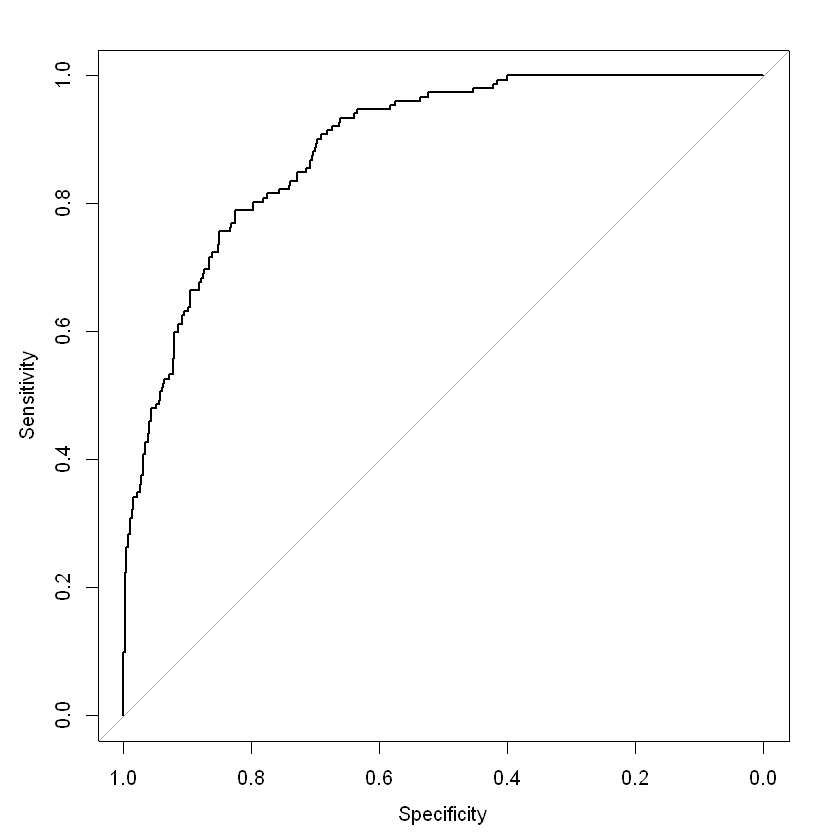

In [66]:
plot(rf.roc)

In [67]:
predtest <- predict(Lasso,submitdata,type = 'prob')  #testdata 
predtest$b

[1] 0.0199699476 0.0458199977 0.4952666964 0.0472587035 0.6104683349
   [6] 0.1361596216 0.3170497697 0.3307880763 0.0572359529 0.0083233191
  [11] 0.1964163414 0.1802002642 0.0113471975 0.9999998743 0.0774379837
  [16] 0.0343189364 0.0117077240 0.1751353391 0.1515979753 0.0113879153
  [21] 0.0390493669 0.2679761147 0.9296313711 0.0133101490 0.6322869913
  [26] 0.0681840936 0.1678670847 0.7831661723 0.5390911181 0.0885465146
  [31] 0.2185037089 0.7142450720 0.0193011550 0.4173790603 0.7143146672
  [36] 0.0989819114 0.6321263472 0.8630684674 0.8386791775 0.0123271800
  [41] 0.2007949335 0.1888211921 0.0700626378 0.8379455711 0.2763106218
  [46] 0.6576918415 0.2056602556 0.0239168650 0.1562241360 0.0727436295
  [51] 0.0502401353 0.0271617650 0.1323034703 0.1766739849 0.9362090495
  [56] 0.7144625460 0.6113414333 0.5229274819 0.0856755142 0.2626171483
  [61] 0.8993085005 0.0121847961 0.0169264821 0.1166345272 0.0672691468
  [66] 0.0195591551 0.0019723540 0.0108449809 0.5102167241 0.0904532461
  [71] 0.4353725257 0.0049295633 0.0124550789 0.5418892949 0.0089580736
  [76] 0.0936020507 0.5643640496 0.0175227075 0.3195302171 0.0260328768
  [81] 0.7826567733 0.0300054900 0.0092407088 0.5570423225 0.1727678991
  [86] 0.1695004758 0.0105496861 0.0474489753 0.7218035649 0.2365270427
  [91] 0.0400844925 0.0323106117 0.0551054030 0.8815132271 0.1274652694
  [96] 0.1716262086 0.0198552567 0.0939341550 0.3840393172 0.4900646239
 [101] 0.8102203012 0.0128802301 0.6289308188 0.4779569185 0.2112390630
 [106] 0.4506255192 0.0489693550 0.1532922020 0.2639430266 0.0361809240
 [111] 0.0147370171 0.8178879642 0.0057257007 0.5652563518 0.2368034854
 [116] 0.0029701010 0.0021964898 0.4997040070 0.0303396621 0.0055803801
 [121] 0.0424689032 0.0278690779 0.0094115863 0.0669573501 0.1127327928
 [126] 0.0028694620 0.0271483676 0.2186143508 0.5718095780 0.0161068957
 [131] 0.4640760154 0.1870533778 0.2419793686 0.2608058280 0.3833747811
 [136] 0.4331446022 0.0043667648 0.7229422715 0.0810959086 0.4570505154
 [141] 0.2475927192 0.1492365980 0.1902786670 0.7110208061 0.3111379165
 [146] 0.2929906473 0.5115682327 0.2296991736 0.1164776591 0.0367492647
 [151] 0.1430627268 0.3016572209 0.1475344310 0.0841891612 0.0064352607
 [156] 0.0556656083 0.0220379684 0.3786623674 0.1804999662 0.7844031509
 [161] 0.1088610262 0.0603342786 0.0107996714 0.1271469757 0.0275128874
 [166] 0.5269747966 0.0220476828 0.7005712341 0.0038229607 0.1340591621
 [171] 0.5266150424 0.2366277097 0.3924444746 0.0100239227 0.4441202828
 [176] 0.0061496716 0.2518810764 0.2764380519 0.4675118267 0.8677238427
 [181] 0.7560151264 0.6640030482 0.4862079061 0.0015915479 0.7973576172
 [186] 0.1237540129 0.0091515048 0.0676467822 0.1190224630 0.1742931049
 [191] 0.0118006943 0.5380478113 0.6136035382 0.1192891286 0.0080341884
 [196] 0.0138828888 0.0361448538 0.0429285456 0.0104389900 0.7294677040
 [201] 0.4599455723 0.0552130150 0.0367526429 0.5591028775 0.2845438468
 [206] 0.5781744000 0.0073379461 0.7730343412 0.0123431908 0.7298267075
 [211] 0.0639325592 0.0065966225 0.0207966121 0.6980484623 0.0832348720
 [216] 0.4257439927 0.0500112453 0.0315595360 0.0128139565 0.0615207431
 [221] 0.0576847675 0.0078620601 0.2362941971 0.5948780937 0.1457275235
 [226] 0.0107497252 0.1171934329 0.7424981615 0.3260454619 0.0154746336
 [231] 0.6914704792 0.0354722181 0.3243238016 0.0379532610 0.0162007701
 [236] 0.0598537057 0.1299309021 0.0550163780 0.4253244028 0.6039290068
 [241] 0.0417853174 0.0130308787 0.0213242023 0.2521324842 0.0320103021
 [246] 0.0461424203 0.2259443026 0.8145619376 0.3915567313 0.0017153233
 [251] 0.0206665028 0.6821303732 0.7720620024 0.3331553184 0.0165101749
 [256] 0.5165910441 0.8411159597 0.1958986524 0.0156843758 0.0365511431
 [261] 0.4148904289 0.2131197683 0.0426793420 0.2525574013 0.3703122739
 [266] 0.3053004019 0.0870845766 0.0533006540 0.0517563694 0.1835463719
 [271] 0.2511037873 0.0477140620 0.1908946473 0.2201789714 0.0152378695
 [276] 0.0790836144 0.3444264449 0.02924822

In [68]:
predictions <- predtest$b

In [69]:
send_submission(predictions, token, url=subm_url, submit_now= submit_now)

[1] "Format OK"
$submission
[0.02,0.0458,0.4953,0.0473,0.6105,0.1362,0.317,0.3308,0.0572,0.0083,0.1964,0.1802,0.0113,1,0.0774,0.0343,0.0117,0.1751,0.1516,0.0114,0.039,0.268,0.9296,0.0133,0.6323,0.0682,0.1679,0.7832,0.5391,0.0885,0.2185,0.7142,0.0193,0.4174,0.7143,0.099,0.6321,0.8631,0.8387,0.0123,0.2008,0.1888,0.0701,0.8379,0.2763,0.6577,0.2057,0.0239,0.1562,0.0727,0.0502,0.0272,0.1323,0.1767,0.9362,0.7145,0.6113,0.5229,0.0857,0.2626,0.8993,0.0122,0.0169,0.1166,0.0673,0.0196,0.002,0.0108,0.5102,0.0905,0.4354,0.0049,0.0125,0.5419,0.009,0.0936,0.5644,0.0175,0.3195,0.026,0.7827,0.03,0.0092,0.557,0.1728,0.1695,0.0105,0.0474,0.7218,0.2365,0.0401,0.0323,0.0551,0.8815,0.1275,0.1716,0.0199,0.0939,0.384,0.4901,0.8102,0.0129,0.6289,0.478,0.2112,0.4506,0.049,0.1533,0.2639,0.0362,0.0147,0.8179,0.0057,0.5653,0.2368,0.003,0.0022,0.4997,0.0303,0.0056,0.0425,0.0279,0.0094,0.067,0.1127,0.0029,0.0271,0.2186,0.5718,0.0161,0.4641,0.1871,0.242,0.2608,0.3834,0.4331,0.0044,0.7229,0.0811,0.4571,0.2476,0.1492,

[1] FALSE

## 2. Random Forest I - 0.854

### RF1: 500 Tree (Default)

In [88]:
tunegrid <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [89]:
set.seed(300)
RF <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


In [90]:
RF

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1309, 1307, 1308, 1308, 1307, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8341272  0.4678762
   5    0.8397692  0.5042960
  10    0.8375584  0.5086975
  15    0.8368745  0.5148579

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [91]:
predRF <- predict(RF, traindata3, type = 'prob')

In [92]:
rf.roc<-roc(traindata3$y,predRF$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8849

### RF2: 250 Tree

In [18]:
tunegrid2 <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [94]:
set.seed(350)
RF2 <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid2,num.trees = 250)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


In [95]:
RF2

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1307, 1309, 1308, 1307, 1307, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8338684  0.4678193
   5    0.8377335  0.4999499
  10    0.8356568  0.5032019
  15    0.8364731  0.5147640

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [96]:
predRF2 <- predict(RF2, testdata, type = 'prob')

In [97]:
rf.roc<-roc(traindata3$y,predRF2$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8837

### RF3: 350 Tree

In [98]:
set.seed(450)
RF3 <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid2,num.trees = 350)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


In [99]:
RF3

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1307, 1309, 1308, 1307, 1307, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8344117  0.4700823
   5    0.8392223  0.5035497
  10    0.8364760  0.5070506
  15    0.8374292  0.5176639

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [100]:
predRF3 <- predict(RF3, traindata3, type = 'prob')

In [101]:
rf.roc<-roc(traindata3$y,predRF3$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8832

### RF4

In [33]:
set.seed(500)
RF4 <- train(y~., data=traindata, method="ranger", trControl = fitControl,
             tuneGrid = tunegrid2,num.trees = 250, importance = 'permutation')

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


In [34]:
RF4

Random Forest 

1453 samples
  60 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1309, 1308, 1308, 1308, 1307, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8327548  0.4597760
   5    0.8373010  0.4943773
  10    0.8359359  0.5060683
  15    0.8349608  0.5066433

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [35]:
predRF4 <- predict(RF4, testdata, type = 'prob')

In [36]:
rf.roc<-roc(testdata$y,predRF4$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8846

### RF 4: Variable Importance

In [149]:
imptable = data.table(varImp(RF4)$importance)
imptable[,order := order(imptable)]
imptable[,variable := 1:dim(imptable)[1] ]
imptable = imptable[order(rank(order))]

In [164]:
imptable

Overall     order variable
1    5.2523535  1     8      
2    3.9635170  2     3      
3    2.5911049  3    29      
4    2.4468338  4     1      
5    3.6410346  5    31      
6   60.4881043  6    42      
7    0.0000000  7     4      
8    3.0271534  8    37      
9    5.4694629  9    40      
10   1.1329437 10     2      
11   4.1346771 11     5      
12   2.3977826 12    47      
13  17.3594678 13    38      
14  34.7530994 14    54      
15   8.3643014 15    17      
16   2.9308669 16    49      
17   4.6009079 17    45      
18   4.5820360 18    25      
19   9.7486652 19    12      
20  15.7683984 20    44      
21  39.3317936 21    32      
22   3.1849859 22    22      
23   3.8383782 23    60      
24   3.7619849 24    43      
25   3.0908014 25    35      
26   2.0559297 26    11      
27   3.3650123 27    34      
28  10.4854727 28    39      
29   5.4462208 29     9      
30   3.1008920 30    59      
31   2.9313457 31    26      
32  65.4144135 32    56      
33   6.1680288 33     6      
34 100.0000000 34    23      
35   3.5873782 35    18      
36   3.1150039 36    46      
37   5.2663770 37    13      
38   3.0271534 38    52      
39  21.5224756 39    48      
40   4.4060575 40    41      
41   2.2986373 41    33      
42   3.0271534 42    57      
43   4.4638497 43    27      
44   3.4550301 44    51      
45   9.1156463 45    36      
46   8.1010733 46    20      
47   1.1992286 47     7      
48   4.0183825 48    53      
49   0.4965527 49    10      
50  30.4065818 50    14      
51   7.6278542 51    24      
52   3.0889760 52    15      
53  73.2416894 53    30      
54   3.1397165 54    55      
55   4.2626567 55    21      
56  11.6559602 56    58      
57  10.5565582 57    16      
58   3.0271534 58    50      
59   2.9634891 59    19      
60   5.2972162 60    28

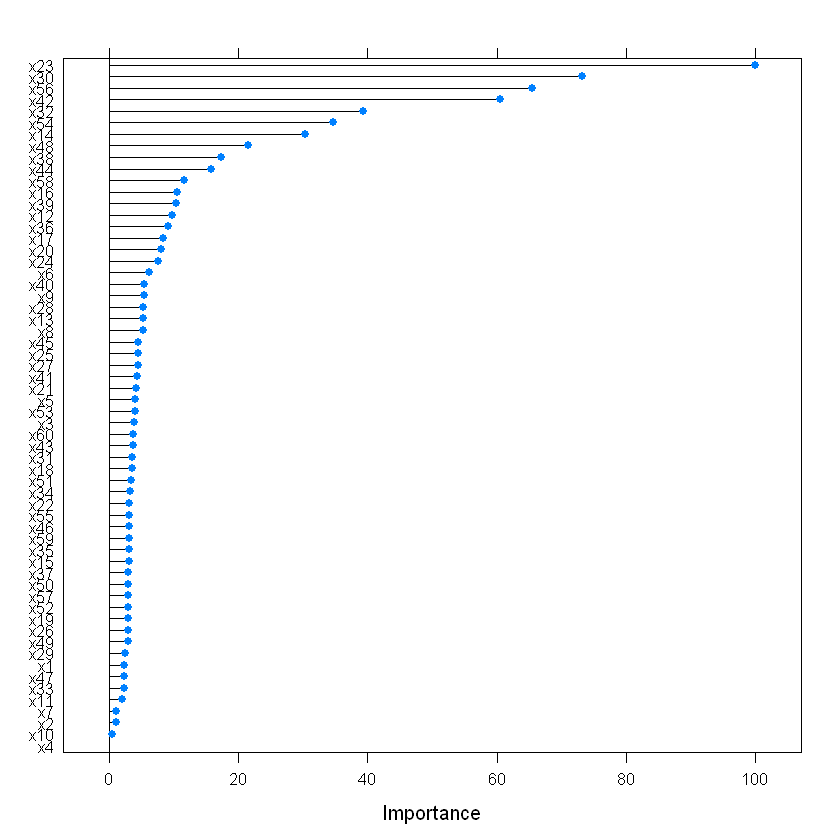

In [105]:
plot(varImp(RF4))

In [94]:
idx <- varImp(RF4)$importance >5
imptable <- as.data.table(varImp(RF4)$importance)
imptable[..idx,"Overall"]

ERROR: Error in `[.data.table`(imptable, ..idx, "Overall"): ..idx is not found in calling scope and it is not a column of type logical. When the first argument inside DT[...] is a single symbol, data.table looks for it in calling scope.


In [112]:
set.seed(750)
predtest4rf <- predict(RF4,submitdata,type = 'prob')  #testdata 
predtest4rf$b

[1] 3.866667e-02 2.843078e-01 3.579878e-01 4.943333e-02 5.893788e-01
   [6] 1.114552e-01 3.231461e-01 3.234192e-01 7.320361e-02 9.090909e-05
  [11] 3.718062e-01 2.535243e-01 3.271156e-02 7.685779e-01 1.183765e-01
  [16] 3.899673e-02 3.056427e-02 1.530952e-01 2.024832e-01 1.140247e-02
  [21] 1.060464e-01 2.934638e-01 7.995700e-01 5.733333e-03 5.085798e-01
  [26] 6.829295e-02 2.879339e-01 4.187266e-01 4.265804e-01 3.144693e-01
  [31] 2.928203e-01 6.570497e-01 2.560764e-02 3.519963e-01 5.664684e-01
  [36] 2.686390e-01 6.732718e-01 6.392887e-01 7.877833e-01 2.333333e-02
  [41] 1.715005e-01 1.192854e-01 6.533627e-02 6.276116e-01 2.593067e-01
  [46] 6.574646e-01 2.233958e-01 2.016364e-02 2.163198e-01 1.311094e-01
  [51] 1.984444e-02 2.436033e-02 2.046137e-01 2.320451e-01 7.797460e-01
  [56] 3.755556e-01 5.754702e-01 4.441644e-01 1.237935e-01 3.946242e-01
  [61] 7.870176e-01 1.262424e-02 9.579524e-02 1.434192e-01 4.843333e-02
  [66] 9.925714e-02 9.171429e-03 1.881881e-02 5.447966e-01 1.259745e-01
  [71] 4.814749e-01 3.842577e-02 4.664444e-02 5.037506e-01 5.809524e-02
  [76] 2.032081e-01 5.304796e-01 3.689440e-02 2.592421e-01 9.731096e-02
  [81] 7.948913e-01 4.744900e-02 2.574973e-02 5.495282e-01 2.335136e-01
  [86] 2.206634e-01 3.133333e-03 8.684058e-02 7.101000e-01 2.369000e-01
  [91] 2.129757e-02 6.912900e-02 9.692405e-02 6.636815e-01 1.424734e-01
  [96] 2.920550e-01 9.479491e-02 6.457436e-02 3.324977e-01 3.333280e-01
 [101] 5.251907e-01 2.875758e-02 4.891789e-01 2.427201e-01 3.869526e-01
 [106] 3.428565e-01 3.283030e-02 1.895354e-01 2.104827e-01 4.980952e-02
 [111] 3.313333e-02 6.449272e-01 1.418476e-01 5.833071e-01 2.134564e-01
 [116] 2.282424e-02 1.014805e-02 3.057227e-01 4.041117e-02 2.194286e-02
 [121] 2.373333e-02 6.005395e-02 3.373072e-02 1.710742e-01 1.814886e-01
 [126] 3.013900e-02 2.767586e-02 2.948286e-01 6.298234e-01 5.431515e-02
 [131] 5.986878e-01 2.564195e-01 3.068667e-01 2.827275e-01 3.401242e-01
 [136] 5.010033e-01 5.086667e-02 4.696535e-01 1.180862e-01 5.728414e-01
 [141] 3.145980e-01 1.722116e-01 3.122750e-01 4.287047e-01 3.164855e-01
 [146] 2.188848e-01 5.382411e-01 2.126188e-01 2.717349e-01 6.564762e-02
 [151] 6.818928e-02 2.700125e-01 2.195999e-01 1.272824e-01 1.172418e-02
 [156] 1.297434e-01 3.687059e-02 4.253139e-01 2.505653e-01 8.117543e-01
 [161] 1.021875e-01 1.183222e-01 2.825641e-02 9.040443e-02 2.268378e-02
 [166] 4.418264e-01 6.400649e-02 3.710585e-01 3.406667e-02 1.370934e-01
 [171] 6.211601e-01 2.407830e-01 3.589165e-01 4.337513e-02 2.993653e-01
 [176] 9.600000e-03 2.459541e-01 2.531021e-01 5.789743e-01 7.757912e-01
 [181] 7.333490e-01 6.414110e-01 4.376065e-01 4.466667e-03 6.935190e-01
 [186] 2.396295e-02 1.000000e-03 1.348979e-01 2.266441e-01 1.599595e-01
 [191] 2.448980e-04 3.590454e-01 4.778658e-01 2.140593e-01 7.555556e-03
 [196] 3.333333e-04 4.725714e-02 1.516667e-02 3.582424e-02 6.371580e-01
 [201] 4.827315e-01 1.113323e-01 1.522501e-01 4.971671e-01 2.714793e-01
 [206] 4.552038e-01 4.487576e-02 7.639352e-01 1.050619e-01 6.068301e-01
 [211] 2.660000e-02 8.000000e-04 9.427395e-02 4.387001e-01 2.435123e-01
 [216] 5.030790e-01 1.335691e-01 4.120370e-02 1.020369e-02 5.800679e-02
 [221] 8.114748e-02 4.890909e-03 3.308103e-01 4.644205e-01 7.006667e-02
 [226] 9.739048e-02 1.637664e-01 5.232742e-01 1.994670e-01 7.690909e-03
 [231] 6.770316e-01 6.963968e-02 4.133048e-01 6.111948e-02 1.698841e-02
 [236] 6.072857e-02 4.349269e-01 2.164480e-01 3.558535e-01 5.275566e-01
 [241] 5.305055e-02 1.836863e-02 1.130119e-02 8.139677e-02 7.609714e-02
 [246] 5.065608e-02 4.007354e-01 5.150185e-01 3.604092e-01 8.244898e-03
 [251] 3.833333e-02 6.038747e-01 6.481631e-01 3.666749e-01 5.469259e-02
 [256] 4.900305e-01 7.419602e-01 2.009629e-01 1.443192e-01 1.416228e-01
 [261] 4.650518e-01 1.903286e-01 4.658333e-02 3.175573e-01 4.786113e-01
 [266] 2.681905e-01 8.788095e-02 9.644459e-02 6.012814e-02 9.060935e-02
 [271] 2.671748e-01 1.886046e-01 2.395799e-01 1.994780e-01 4.815556e-02
 [276] 2.807593e-01 3.071827e-01 6.742913e-

In [115]:
predictions <- predtest4rf$b
send_submission(predictions, token, url=subm_url, submit_now= submit_now)

[1] "Format OK"
$submission
[0.0387,0.2843,0.358,0.0494,0.5894,0.1115,0.3231,0.3234,0.0732,0.0001,0.3718,0.2535,0.0327,0.7686,0.1184,0.039,0.0306,0.1531,0.2025,0.0114,0.106,0.2935,0.7996,0.0057,0.5086,0.0683,0.2879,0.4187,0.4266,0.3145,0.2928,0.657,0.0256,0.352,0.5665,0.2686,0.6733,0.6393,0.7878,0.0233,0.1715,0.1193,0.0653,0.6276,0.2593,0.6575,0.2234,0.0202,0.2163,0.1311,0.0198,0.0244,0.2046,0.232,0.7797,0.3756,0.5755,0.4442,0.1238,0.3946,0.787,0.0126,0.0958,0.1434,0.0484,0.0993,0.0092,0.0188,0.5448,0.126,0.4815,0.0384,0.0466,0.5038,0.0581,0.2032,0.5305,0.0369,0.2592,0.0973,0.7949,0.0474,0.0257,0.5495,0.2335,0.2207,0.0031,0.0868,0.7101,0.2369,0.0213,0.0691,0.0969,0.6637,0.1425,0.2921,0.0948,0.0646,0.3325,0.3333,0.5252,0.0288,0.4892,0.2427,0.387,0.3429,0.0328,0.1895,0.2105,0.0498,0.0331,0.6449,0.1418,0.5833,0.2135,0.0228,0.0101,0.3057,0.0404,0.0219,0.0237,0.0601,0.0337,0.1711,0.1815,0.0301,0.0277,0.2948,0.6298,0.0543,0.5987,0.2564,0.3069,0.2827,0.3401,0.501,0.0509,0.4697,0.1181,0.5728,0

[1] FALSE

## 3. Stochastic Gradient Boosting I

In [118]:
tunegrid <-  expand.grid(interaction.depth = c(1, 5, 9),n.trees = (1:5)*50, shrinkage = c(0.05,0.01, 0.1),n.minobsinnode = 10)
SGB <- train(y~., data=traindata, method="gbm", trControl = fitControl, tuneGrid = tunegrid)
predSGB <- predict(SGB, submitdata, type='prob')

+ Fold01.Rep1: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=250 
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1111             nan     0.0100    0.0018
     2        1.1076             nan     0.0100    0.0018
     3        1.1042             nan     0.0100    0.0018
     4        1.1005             nan     0.0100    0.0018
     5        1.0972             nan     0.0100    0.0017
     6        1.0935             nan     0.0100    0.0017
     7        1.0903             nan     0.0100    0.0017
     8        1.0868             nan     0.0100    0.0016
     9        1.0834             nan     0.0100    0.0016
    10        1.0804             nan     0.0100    0.0016
    20        1.0531             nan     0.0100    0.0013
    40        1.0090             nan     0.0100    0.0010
    60        0.9732             nan     0.0100    0.0006
    80        0.9436             nan     0.0100    0.0004
   100        0.9202             nan     0.010

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1110             nan     0.0100    0.0018
     2        1.1073             nan     0.0100    0.0017
     3        1.1038             nan     0.0100    0.0017
     4        1.1006             nan     0.0100    0.0016
     5        1.0975             nan     0.0100    0.0016
     6        1.0948             nan     0.0100    0.0013
     7        1.0917             nan     0.0100    0.0016
     8        1.0886             nan     0.0100    0.0015
     9        1.0861             nan     0.0100    0.0010
    10        1.0832             nan     0.0100    0.0015
    20        1.0561             nan     0.0100    0.0013
    40        1.0137             nan     0.0100    0.0008
    60        0.9810             nan     0.0100    0.0004
    80        0.9526             nan     0.0100    0.0006
   100        0.9282             nan     0.0100    0.0006
   120        0.9069             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1080             nan     0.0100    0.0032
     2        1.1019             nan     0.0100    0.0032
     3        1.0955             nan     0.0100    0.0031
     4        1.0893             nan     0.0100    0.0031
     5        1.0834             nan     0.0100    0.0028
     6        1.0777             nan     0.0100    0.0025
     7        1.0722             nan     0.0100    0.0025
     8        1.0666             nan     0.0100    0.0027
     9        1.0617             nan     0.0100    0.0023
    10        1.0567             nan     0.0100    0.0023
    20        1.0101             nan     0.0100    0.0022
    40        0.9361             nan     0.0100    0.0012
    60        0.8825             nan     0.0100    0.0011
    80        0.8408             nan     0.0100    0.0009
   100        0.8076             nan     0.0100    0.0006
   120        0.7824             nan     0.0100    0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1072             nan     0.0100    0.0035
     2        1.1004             nan     0.0100    0.0033
     3        1.0935             nan     0.0100    0.0030
     4        1.0867             nan     0.0100    0.0030
     5        1.0803             nan     0.0100    0.0028
     6        1.0734             nan     0.0100    0.0031
     7        1.0670             nan     0.0100    0.0027
     8        1.0608             nan     0.0100    0.0027
     9        1.0550             nan     0.0100    0.0026
    10        1.0493             nan     0.0100    0.0025
    20        0.9972             nan     0.0100    0.0019
    40        0.9159             nan     0.0100    0.0013
    60        0.8554             nan     0.0100    0.0008
    80        0.8077             nan     0.0100    0.0007
   100        0.7697             nan     0.0100    0.0007
   120        0.7402             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0965             nan     0.0500    0.0086
     2        1.0801             nan     0.0500    0.0076
     3        1.0658             nan     0.0500    0.0069
     4        1.0536             nan     0.0500    0.0071
     5        1.0413             nan     0.0500    0.0060
     6        1.0319             nan     0.0500    0.0037
     7        1.0206             nan     0.0500    0.0055
     8        1.0104             nan     0.0500    0.0049
     9        1.0004             nan     0.0500    0.0044
    10        0.9909             nan     0.0500    0.0039
    20        0.9245             nan     0.0500    0.0029
    40        0.8462             nan     0.0500    0.0009
    60        0.7982             nan     0.0500    0.0010
    80        0.7666             nan     0.0500    0.0006
   100        0.7445             nan     0.0500    0.0004
   120        0.7283             nan     0.0500    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0812             nan     0.0500    0.0166
     2        1.0550             nan     0.0500    0.0123
     3        1.0296             nan     0.0500    0.0116
     4        1.0073             nan     0.0500    0.0107
     5        0.9860             nan     0.0500    0.0087
     6        0.9678             nan     0.0500    0.0084
     7        0.9491             nan     0.0500    0.0085
     8        0.9342             nan     0.0500    0.0063
     9        0.9194             nan     0.0500    0.0072
    10        0.9068             nan     0.0500    0.0053
    20        0.8073             nan     0.0500    0.0020
    40        0.7116             nan     0.0500    0.0009
    60        0.6591             nan     0.0500   -0.0002
    80        0.6250             nan     0.0500    0.0000
   100        0.5971             nan     0.0500    0.0001
   120        0.5731             nan     0.0500   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0821             nan     0.0500    0.0142
     2        1.0523             nan     0.0500    0.0141
     3        1.0228             nan     0.0500    0.0138
     4        0.9985             nan     0.0500    0.0102
     5        0.9735             nan     0.0500    0.0112
     6        0.9530             nan     0.0500    0.0091
     7        0.9320             nan     0.0500    0.0085
     8        0.9132             nan     0.0500    0.0079
     9        0.8968             nan     0.0500    0.0071
    10        0.8819             nan     0.0500    0.0059
    20        0.7694             nan     0.0500    0.0025
    40        0.6569             nan     0.0500    0.0005
    60        0.5912             nan     0.0500    0.0005
    80        0.5466             nan     0.0500   -0.0000
   100        0.5079             nan     0.0500   -0.0004
   120        0.4751             nan     0.0500   -0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0810             nan     0.1000    0.0167
     2        1.0552             nan     0.1000    0.0135
     3        1.0323             nan     0.1000    0.0111
     4        1.0113             nan     0.1000    0.0100
     5        0.9957             nan     0.1000    0.0065
     6        0.9790             nan     0.1000    0.0078
     7        0.9615             nan     0.1000    0.0085
     8        0.9460             nan     0.1000    0.0069
     9        0.9338             nan     0.1000    0.0058
    10        0.9237             nan     0.1000    0.0049
    20        0.8453             nan     0.1000    0.0016
    40        0.7651             nan     0.1000    0.0007
    60        0.7284             nan     0.1000    0.0003
    80        0.7053             nan     0.1000   -0.0000
   100        0.6904             nan     0.1000   -0.0001
   120        0.6754             nan     0.1000   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0574             nan     0.1000    0.0269
     2        1.0121             nan     0.1000    0.0223
     3        0.9684             nan     0.1000    0.0196
     4        0.9359             nan     0.1000    0.0153
     5        0.9038             nan     0.1000    0.0147
     6        0.8773             nan     0.1000    0.0113
     7        0.8535             nan     0.1000    0.0102
     8        0.8331             nan     0.1000    0.0074
     9        0.8166             nan     0.1000    0.0063
    10        0.7992             nan     0.1000    0.0062
    20        0.7104             nan     0.1000    0.0021
    40        0.6257             nan     0.1000   -0.0009
    60        0.5717             nan     0.1000   -0.0001
    80        0.5337             nan     0.1000   -0.0001
   100        0.5002             nan     0.1000   -0.0009
   120        0.4702             nan     0.1000   -0.0013
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0455             nan     0.1000    0.0305
     2        0.9897             nan     0.1000    0.0239
     3        0.9430             nan     0.1000    0.0186
     4        0.9091             nan     0.1000    0.0148
     5        0.8781             nan     0.1000    0.0118
     6        0.8492             nan     0.1000    0.0128
     7        0.8219             nan     0.1000    0.0123
     8        0.7985             nan     0.1000    0.0089
     9        0.7768             nan     0.1000    0.0071
    10        0.7632             nan     0.1000    0.0029
    20        0.6521             nan     0.1000    0.0012
    40        0.5507             nan     0.1000   -0.0009
    60        0.4814             nan     0.1000   -0.0015
    80        0.4236             nan     0.1000   -0.0004
   100        0.3798             nan     0.1000   -0.0009
   120        0.3393             nan     0.1000   -0.0009
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1104             nan     0.0100    0.0018
     2        1.1069             nan     0.0100    0.0017
     3        1.1037             nan     0.0100    0.0017
     4        1.1004             nan     0.0100    0.0017
     5        1.0970             nan     0.0100    0.0016
     6        1.0937             nan     0.0100    0.0016
     7        1.0913             nan     0.0100    0.0010
     8        1.0880             nan     0.0100    0.0016
     9        1.0850             nan     0.0100    0.0015
    10        1.0820             nan     0.0100    0.0015
    20        1.0553             nan     0.0100    0.0013
    40        1.0127             nan     0.0100    0.0010
    60        0.9791             nan     0.0100    0.0006
    80        0.9511             nan     0.0100    0.0006
   100        0.9280             nan     0.0100    0.0004
   120        0.9075             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1081             nan     0.0100    0.0029
     2        1.1020             nan     0.0100    0.0029
     3        1.0963             nan     0.0100    0.0030
     4        1.0910             nan     0.0100    0.0028
     5        1.0849             nan     0.0100    0.0028
     6        1.0794             nan     0.0100    0.0027
     7        1.0737             nan     0.0100    0.0026
     8        1.0685             nan     0.0100    0.0024
     9        1.0630             nan     0.0100    0.0023
    10        1.0575             nan     0.0100    0.0024
    20        1.0106             nan     0.0100    0.0020
    40        0.9384             nan     0.0100    0.0015
    60        0.8851             nan     0.0100    0.0010
    80        0.8441             nan     0.0100    0.0008
   100        0.8122             nan     0.0100    0.0006
   120        0.7857             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1072             nan     0.0100    0.0032
     2        1.1001             nan     0.0100    0.0033
     3        1.0934             nan     0.0100    0.0032
     4        1.0871             nan     0.0100    0.0031
     5        1.0808             nan     0.0100    0.0030
     6        1.0745             nan     0.0100    0.0029
     7        1.0680             nan     0.0100    0.0025
     8        1.0616             nan     0.0100    0.0029
     9        1.0560             nan     0.0100    0.0027
    10        1.0500             nan     0.0100    0.0028
    20        0.9985             nan     0.0100    0.0022
    40        0.9190             nan     0.0100    0.0017
    60        0.8581             nan     0.0100    0.0010
    80        0.8113             nan     0.0100    0.0008
   100        0.7738             nan     0.0100    0.0005
   120        0.7431             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0978             nan     0.0500    0.0087
     2        1.0819             nan     0.0500    0.0078
     3        1.0677             nan     0.0500    0.0072
     4        1.0545             nan     0.0500    0.0065
     5        1.0425             nan     0.0500    0.0058
     6        1.0327             nan     0.0500    0.0043
     7        1.0235             nan     0.0500    0.0039
     8        1.0124             nan     0.0500    0.0052
     9        1.0037             nan     0.0500    0.0039
    10        0.9957             nan     0.0500    0.0038
    20        0.9258             nan     0.0500    0.0029
    40        0.8463             nan     0.0500    0.0014
    60        0.7970             nan     0.0500    0.0008
    80        0.7671             nan     0.0500    0.0004
   100        0.7460             nan     0.0500    0.0002
   120        0.7298             nan     0.0500    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0838             nan     0.0500    0.0144
     2        1.0555             nan     0.0500    0.0131
     3        1.0301             nan     0.0500    0.0120
     4        1.0069             nan     0.0500    0.0104
     5        0.9869             nan     0.0500    0.0090
     6        0.9680             nan     0.0500    0.0093
     7        0.9529             nan     0.0500    0.0073
     8        0.9367             nan     0.0500    0.0071
     9        0.9245             nan     0.0500    0.0057
    10        0.9111             nan     0.0500    0.0060
    20        0.8128             nan     0.0500    0.0023
    40        0.7128             nan     0.0500    0.0005
    60        0.6650             nan     0.0500   -0.0002
    80        0.6311             nan     0.0500    0.0002
   100        0.6026             nan     0.0500   -0.0002
   120        0.5800             nan     0.0500   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0788             nan     0.0500    0.0149
     2        1.0485             nan     0.0500    0.0137
     3        1.0231             nan     0.0500    0.0118
     4        0.9971             nan     0.0500    0.0108
     5        0.9767             nan     0.0500    0.0087
     6        0.9543             nan     0.0500    0.0101
     7        0.9355             nan     0.0500    0.0077
     8        0.9182             nan     0.0500    0.0080
     9        0.9010             nan     0.0500    0.0067
    10        0.8867             nan     0.0500    0.0053
    20        0.7720             nan     0.0500    0.0039
    40        0.6608             nan     0.0500    0.0003
    60        0.6000             nan     0.0500   -0.0004
    80        0.5530             nan     0.0500   -0.0003
   100        0.5153             nan     0.0500   -0.0007
   120        0.4827             nan     0.0500   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0798             nan     0.1000    0.0170
     2        1.0529             nan     0.1000    0.0137
     3        1.0306             nan     0.1000    0.0113
     4        1.0119             nan     0.1000    0.0097
     5        0.9926             nan     0.1000    0.0090
     6        0.9785             nan     0.1000    0.0067
     7        0.9613             nan     0.1000    0.0080
     8        0.9517             nan     0.1000    0.0044
     9        0.9385             nan     0.1000    0.0060
    10        0.9243             nan     0.1000    0.0069
    20        0.8454             nan     0.1000    0.0039
    40        0.7668             nan     0.1000    0.0001
    60        0.7303             nan     0.1000    0.0002
    80        0.7085             nan     0.1000   -0.0008
   100        0.6921             nan     0.1000   -0.0001
   120        0.6793             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0572             nan     0.1000    0.0285
     2        1.0085             nan     0.1000    0.0231
     3        0.9702             nan     0.1000    0.0159
     4        0.9343             nan     0.1000    0.0178
     5        0.9051             nan     0.1000    0.0132
     6        0.8807             nan     0.1000    0.0118
     7        0.8563             nan     0.1000    0.0102
     8        0.8368             nan     0.1000    0.0085
     9        0.8204             nan     0.1000    0.0063
    10        0.8062             nan     0.1000    0.0051
    20        0.7122             nan     0.1000    0.0016
    40        0.6296             nan     0.1000   -0.0002
    60        0.5828             nan     0.1000   -0.0003
    80        0.5392             nan     0.1000   -0.0002
   100        0.5070             nan     0.1000   -0.0009
   120        0.4785             nan     0.1000   -0.0008
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0428             nan     0.1000    0.0313
     2        0.9907             nan     0.1000    0.0222
     3        0.9480             nan     0.1000    0.0182
     4        0.9117             nan     0.1000    0.0154
     5        0.8814             nan     0.1000    0.0134
     6        0.8548             nan     0.1000    0.0104
     7        0.8358             nan     0.1000    0.0056
     8        0.8153             nan     0.1000    0.0066
     9        0.7946             nan     0.1000    0.0088
    10        0.7746             nan     0.1000    0.0069
    20        0.6665             nan     0.1000    0.0010
    40        0.5541             nan     0.1000   -0.0001
    60        0.4827             nan     0.1000   -0.0004
    80        0.4323             nan     0.1000   -0.0013
   100        0.3871             nan     0.1000   -0.0006
   120        0.3449             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1109             nan     0.0100    0.0018
     2        1.1074             nan     0.0100    0.0018
     3        1.1040             nan     0.0100    0.0018
     4        1.1006             nan     0.0100    0.0018
     5        1.0971             nan     0.0100    0.0017
     6        1.0938             nan     0.0100    0.0017
     7        1.0906             nan     0.0100    0.0016
     8        1.0875             nan     0.0100    0.0016
     9        1.0844             nan     0.0100    0.0016
    10        1.0812             nan     0.0100    0.0016
    20        1.0530             nan     0.0100    0.0013
    40        1.0088             nan     0.0100    0.0010
    60        0.9736             nan     0.0100    0.0009
    80        0.9437             nan     0.0100    0.0007
   100        0.9181             nan     0.0100    0.0006
   120        0.8968             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1076             nan     0.0100    0.0030
     2        1.1010             nan     0.0100    0.0030
     3        1.0943             nan     0.0100    0.0031
     4        1.0881             nan     0.0100    0.0030
     5        1.0823             nan     0.0100    0.0027
     6        1.0765             nan     0.0100    0.0028
     7        1.0704             nan     0.0100    0.0030
     8        1.0651             nan     0.0100    0.0027
     9        1.0594             nan     0.0100    0.0028
    10        1.0541             nan     0.0100    0.0026
    20        1.0051             nan     0.0100    0.0021
    40        0.9278             nan     0.0100    0.0015
    60        0.8724             nan     0.0100    0.0011
    80        0.8295             nan     0.0100    0.0009
   100        0.7952             nan     0.0100    0.0005
   120        0.7680             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1065             nan     0.0100    0.0037
     2        1.0992             nan     0.0100    0.0034
     3        1.0920             nan     0.0100    0.0035
     4        1.0851             nan     0.0100    0.0029
     5        1.0780             nan     0.0100    0.0030
     6        1.0716             nan     0.0100    0.0029
     7        1.0648             nan     0.0100    0.0030
     8        1.0586             nan     0.0100    0.0028
     9        1.0526             nan     0.0100    0.0025
    10        1.0463             nan     0.0100    0.0030
    20        0.9913             nan     0.0100    0.0024
    40        0.9072             nan     0.0100    0.0015
    60        0.8445             nan     0.0100    0.0011
    80        0.7979             nan     0.0100    0.0010
   100        0.7599             nan     0.0100    0.0005
   120        0.7295             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0971             nan     0.0500    0.0090
     2        1.0812             nan     0.0500    0.0082
     3        1.0667             nan     0.0500    0.0074
     4        1.0518             nan     0.0500    0.0066
     5        1.0389             nan     0.0500    0.0061
     6        1.0276             nan     0.0500    0.0052
     7        1.0175             nan     0.0500    0.0047
     8        1.0085             nan     0.0500    0.0045
     9        0.9973             nan     0.0500    0.0053
    10        0.9896             nan     0.0500    0.0035
    20        0.9189             nan     0.0500    0.0025
    40        0.8318             nan     0.0500    0.0008
    60        0.7824             nan     0.0500    0.0008
    80        0.7499             nan     0.0500    0.0006
   100        0.7287             nan     0.0500    0.0005
   120        0.7128             nan     0.0500    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0807             nan     0.0500    0.0153
     2        1.0515             nan     0.0500    0.0143
     3        1.0241             nan     0.0500    0.0123
     4        1.0003             nan     0.0500    0.0114
     5        0.9797             nan     0.0500    0.0098
     6        0.9609             nan     0.0500    0.0081
     7        0.9438             nan     0.0500    0.0080
     8        0.9265             nan     0.0500    0.0088
     9        0.9103             nan     0.0500    0.0080
    10        0.8966             nan     0.0500    0.0059
    20        0.7971             nan     0.0500    0.0037
    40        0.6966             nan     0.0500   -0.0000
    60        0.6434             nan     0.0500   -0.0002
    80        0.6077             nan     0.0500    0.0002
   100        0.5813             nan     0.0500   -0.0004
   120        0.5583             nan     0.0500    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0772             nan     0.0500    0.0174
     2        1.0447             nan     0.0500    0.0150
     3        1.0158             nan     0.0500    0.0133
     4        0.9899             nan     0.0500    0.0106
     5        0.9653             nan     0.0500    0.0116
     6        0.9419             nan     0.0500    0.0098
     7        0.9223             nan     0.0500    0.0079
     8        0.9051             nan     0.0500    0.0078
     9        0.8890             nan     0.0500    0.0066
    10        0.8725             nan     0.0500    0.0064
    20        0.7595             nan     0.0500    0.0019
    40        0.6395             nan     0.0500    0.0008
    60        0.5773             nan     0.0500   -0.0001
    80        0.5330             nan     0.0500   -0.0011
   100        0.4971             nan     0.0500   -0.0004
   120        0.4657             nan     0.0500   -0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0789             nan     0.1000    0.0177
     2        1.0511             nan     0.1000    0.0144
     3        1.0274             nan     0.1000    0.0118
     4        1.0067             nan     0.1000    0.0095
     5        0.9858             nan     0.1000    0.0095
     6        0.9718             nan     0.1000    0.0061
     7        0.9532             nan     0.1000    0.0087
     8        0.9380             nan     0.1000    0.0075
     9        0.9254             nan     0.1000    0.0064
    10        0.9154             nan     0.1000    0.0049
    20        0.8310             nan     0.1000    0.0037
    40        0.7488             nan     0.1000    0.0010
    60        0.7118             nan     0.1000   -0.0000
    80        0.6902             nan     0.1000   -0.0001
   100        0.6715             nan     0.1000    0.0005
   120        0.6597             nan     0.1000   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0473             nan     0.1000    0.0317
     2        0.9959             nan     0.1000    0.0232
     3        0.9566             nan     0.1000    0.0190
     4        0.9221             nan     0.1000    0.0166
     5        0.8944             nan     0.1000    0.0122
     6        0.8676             nan     0.1000    0.0124
     7        0.8440             nan     0.1000    0.0115
     8        0.8241             nan     0.1000    0.0077
     9        0.8073             nan     0.1000    0.0070
    10        0.7927             nan     0.1000    0.0059
    20        0.6942             nan     0.1000    0.0008
    40        0.6075             nan     0.1000   -0.0000
    60        0.5591             nan     0.1000   -0.0005
    80        0.5228             nan     0.1000   -0.0010
   100        0.4884             nan     0.1000   -0.0005
   120        0.4566             nan     0.1000   -0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0428             nan     0.1000    0.0332
     2        0.9905             nan     0.1000    0.0239
     3        0.9479             nan     0.1000    0.0193
     4        0.9073             nan     0.1000    0.0163
     5        0.8726             nan     0.1000    0.0133
     6        0.8422             nan     0.1000    0.0100
     7        0.8180             nan     0.1000    0.0085
     8        0.7942             nan     0.1000    0.0089
     9        0.7776             nan     0.1000    0.0049
    10        0.7631             nan     0.1000    0.0047
    20        0.6440             nan     0.1000    0.0020
    40        0.5400             nan     0.1000   -0.0006
    60        0.4678             nan     0.1000   -0.0007
    80        0.4090             nan     0.1000   -0.0003
   100        0.3682             nan     0.1000   -0.0006
   120        0.3268             nan     0.1000   -0.0009
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1105             nan     0.0100    0.0018
     2        1.1069             nan     0.0100    0.0018
     3        1.1034             nan     0.0100    0.0018
     4        1.1001             nan     0.0100    0.0017
     5        1.0971             nan     0.0100    0.0017
     6        1.0939             nan     0.0100    0.0017
     7        1.0909             nan     0.0100    0.0016
     8        1.0878             nan     0.0100    0.0016
     9        1.0845             nan     0.0100    0.0016
    10        1.0810             nan     0.0100    0.0015
    20        1.0535             nan     0.0100    0.0013
    40        1.0087             nan     0.0100    0.0009
    60        0.9724             nan     0.0100    0.0009
    80        0.9422             nan     0.0100    0.0005
   100        0.9171             nan     0.0100    0.0004
   120        0.8950             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1071             nan     0.0100    0.0035
     2        1.1005             nan     0.0100    0.0031
     3        1.0936             nan     0.0100    0.0031
     4        1.0872             nan     0.0100    0.0030
     5        1.0811             nan     0.0100    0.0028
     6        1.0752             nan     0.0100    0.0027
     7        1.0697             nan     0.0100    0.0025
     8        1.0640             nan     0.0100    0.0027
     9        1.0579             nan     0.0100    0.0027
    10        1.0522             nan     0.0100    0.0028
    20        1.0019             nan     0.0100    0.0022
    40        0.9271             nan     0.0100    0.0012
    60        0.8711             nan     0.0100    0.0009
    80        0.8285             nan     0.0100    0.0009
   100        0.7954             nan     0.0100    0.0005
   120        0.7680             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1065             nan     0.0100    0.0034
     2        1.0992             nan     0.0100    0.0032
     3        1.0920             nan     0.0100    0.0033
     4        1.0848             nan     0.0100    0.0033
     5        1.0778             nan     0.0100    0.0033
     6        1.0713             nan     0.0100    0.0032
     7        1.0649             nan     0.0100    0.0029
     8        1.0583             nan     0.0100    0.0030
     9        1.0520             nan     0.0100    0.0031
    10        1.0457             nan     0.0100    0.0026
    20        0.9908             nan     0.0100    0.0021
    40        0.9070             nan     0.0100    0.0017
    60        0.8457             nan     0.0100    0.0012
    80        0.7979             nan     0.0100    0.0008
   100        0.7602             nan     0.0100    0.0004
   120        0.7279             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0964             nan     0.0500    0.0091
     2        1.0794             nan     0.0500    0.0082
     3        1.0650             nan     0.0500    0.0073
     4        1.0511             nan     0.0500    0.0066
     5        1.0394             nan     0.0500    0.0064
     6        1.0270             nan     0.0500    0.0059
     7        1.0167             nan     0.0500    0.0049
     8        1.0075             nan     0.0500    0.0039
     9        0.9977             nan     0.0500    0.0041
    10        0.9865             nan     0.0500    0.0052
    20        0.9155             nan     0.0500    0.0021
    40        0.8331             nan     0.0500    0.0013
    60        0.7824             nan     0.0500    0.0008
    80        0.7514             nan     0.0500    0.0003
   100        0.7292             nan     0.0500    0.0004
   120        0.7128             nan     0.0500    0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0828             nan     0.0500    0.0168
     2        1.0525             nan     0.0500    0.0150
     3        1.0259             nan     0.0500    0.0126
     4        1.0022             nan     0.0500    0.0114
     5        0.9811             nan     0.0500    0.0101
     6        0.9624             nan     0.0500    0.0083
     7        0.9441             nan     0.0500    0.0078
     8        0.9273             nan     0.0500    0.0076
     9        0.9129             nan     0.0500    0.0059
    10        0.8993             nan     0.0500    0.0067
    20        0.7967             nan     0.0500    0.0030
    40        0.6946             nan     0.0500    0.0011
    60        0.6447             nan     0.0500   -0.0000
    80        0.6090             nan     0.0500   -0.0005
   100        0.5834             nan     0.0500    0.0001
   120        0.5606             nan     0.0500    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0744             nan     0.0500    0.0174
     2        1.0411             nan     0.0500    0.0140
     3        1.0131             nan     0.0500    0.0113
     4        0.9855             nan     0.0500    0.0114
     5        0.9630             nan     0.0500    0.0096
     6        0.9430             nan     0.0500    0.0082
     7        0.9211             nan     0.0500    0.0086
     8        0.9018             nan     0.0500    0.0081
     9        0.8838             nan     0.0500    0.0077
    10        0.8676             nan     0.0500    0.0070
    20        0.7520             nan     0.0500    0.0025
    40        0.6427             nan     0.0500    0.0001
    60        0.5824             nan     0.0500   -0.0002
    80        0.5384             nan     0.0500   -0.0000
   100        0.5004             nan     0.0500   -0.0000
   120        0.4666             nan     0.0500   -0.0007
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0785             nan     0.1000    0.0176
     2        1.0481             nan     0.1000    0.0140
     3        1.0261             nan     0.1000    0.0094
     4        1.0054             nan     0.1000    0.0089
     5        0.9828             nan     0.1000    0.0108
     6        0.9678             nan     0.1000    0.0069
     7        0.9523             nan     0.1000    0.0061
     8        0.9356             nan     0.1000    0.0085
     9        0.9254             nan     0.1000    0.0048
    10        0.9115             nan     0.1000    0.0069
    20        0.8298             nan     0.1000    0.0024
    40        0.7511             nan     0.1000    0.0009
    60        0.7145             nan     0.1000    0.0000
    80        0.6906             nan     0.1000    0.0004
   100        0.6742             nan     0.1000    0.0002
   120        0.6597             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0528             nan     0.1000    0.0298
     2        1.0039             nan     0.1000    0.0212
     3        0.9559             nan     0.1000    0.0237
     4        0.9226             nan     0.1000    0.0156
     5        0.8927             nan     0.1000    0.0122
     6        0.8681             nan     0.1000    0.0101
     7        0.8463             nan     0.1000    0.0106
     8        0.8247             nan     0.1000    0.0092
     9        0.8059             nan     0.1000    0.0062
    10        0.7882             nan     0.1000    0.0063
    20        0.6945             nan     0.1000    0.0014
    40        0.6057             nan     0.1000    0.0004
    60        0.5564             nan     0.1000   -0.0009
    80        0.5215             nan     0.1000   -0.0005
   100        0.4850             nan     0.1000   -0.0006
   120        0.4526             nan     0.1000   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0408             nan     0.1000    0.0331
     2        0.9851             nan     0.1000    0.0231
     3        0.9370             nan     0.1000    0.0224
     4        0.8998             nan     0.1000    0.0163
     5        0.8676             nan     0.1000    0.0119
     6        0.8390             nan     0.1000    0.0127
     7        0.8138             nan     0.1000    0.0091
     8        0.7926             nan     0.1000    0.0075
     9        0.7738             nan     0.1000    0.0062
    10        0.7539             nan     0.1000    0.0069
    20        0.6369             nan     0.1000    0.0014
    40        0.5331             nan     0.1000   -0.0013
    60        0.4627             nan     0.1000   -0.0009
    80        0.4088             nan     0.1000   -0.0007
   100        0.3639             nan     0.1000   -0.0013
   120        0.3230             nan     0.1000   -0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1107             nan     0.0100    0.0018
     2        1.1071             nan     0.0100    0.0018
     3        1.1036             nan     0.0100    0.0018
     4        1.1000             nan     0.0100    0.0017
     5        1.0968             nan     0.0100    0.0017
     6        1.0936             nan     0.0100    0.0017
     7        1.0905             nan     0.0100    0.0016
     8        1.0871             nan     0.0100    0.0016
     9        1.0841             nan     0.0100    0.0016
    10        1.0811             nan     0.0100    0.0015
    20        1.0538             nan     0.0100    0.0011
    40        1.0113             nan     0.0100    0.0007
    60        0.9769             nan     0.0100    0.0005
    80        0.9484             nan     0.0100    0.0007
   100        0.9238             nan     0.0100    0.0006
   120        0.9028             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1082             nan     0.0100    0.0032
     2        1.1019             nan     0.0100    0.0031
     3        1.0956             nan     0.0100    0.0026
     4        1.0896             nan     0.0100    0.0027
     5        1.0837             nan     0.0100    0.0026
     6        1.0780             nan     0.0100    0.0026
     7        1.0724             nan     0.0100    0.0028
     8        1.0668             nan     0.0100    0.0029
     9        1.0609             nan     0.0100    0.0030
    10        1.0552             nan     0.0100    0.0025
    20        1.0084             nan     0.0100    0.0019
    40        0.9349             nan     0.0100    0.0013
    60        0.8798             nan     0.0100    0.0009
    80        0.8375             nan     0.0100    0.0009
   100        0.8052             nan     0.0100    0.0005
   120        0.7786             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1072             nan     0.0100    0.0030
     2        1.0999             nan     0.0100    0.0037
     3        1.0932             nan     0.0100    0.0031
     4        1.0861             nan     0.0100    0.0031
     5        1.0795             nan     0.0100    0.0028
     6        1.0732             nan     0.0100    0.0031
     7        1.0671             nan     0.0100    0.0030
     8        1.0608             nan     0.0100    0.0026
     9        1.0551             nan     0.0100    0.0025
    10        1.0490             nan     0.0100    0.0026
    20        0.9967             nan     0.0100    0.0020
    40        0.9142             nan     0.0100    0.0015
    60        0.8531             nan     0.0100    0.0011
    80        0.8065             nan     0.0100    0.0006
   100        0.7700             nan     0.0100    0.0006
   120        0.7398             nan     0.0100    0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0968             nan     0.0500    0.0089
     2        1.0798             nan     0.0500    0.0081
     3        1.0681             nan     0.0500    0.0049
     4        1.0545             nan     0.0500    0.0072
     5        1.0413             nan     0.0500    0.0065
     6        1.0291             nan     0.0500    0.0060
     7        1.0184             nan     0.0500    0.0054
     8        1.0087             nan     0.0500    0.0049
     9        0.9997             nan     0.0500    0.0045
    10        0.9907             nan     0.0500    0.0040
    20        0.9210             nan     0.0500    0.0021
    40        0.8389             nan     0.0500    0.0012
    60        0.7934             nan     0.0500    0.0005
    80        0.7623             nan     0.0500    0.0004
   100        0.7408             nan     0.0500    0.0002
   120        0.7234             nan     0.0500    0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0842             nan     0.0500    0.0151
     2        1.0580             nan     0.0500    0.0128
     3        1.0319             nan     0.0500    0.0114
     4        1.0066             nan     0.0500    0.0124
     5        0.9867             nan     0.0500    0.0081
     6        0.9680             nan     0.0500    0.0087
     7        0.9507             nan     0.0500    0.0072
     8        0.9333             nan     0.0500    0.0084
     9        0.9180             nan     0.0500    0.0071
    10        0.9045             nan     0.0500    0.0058
    20        0.8030             nan     0.0500    0.0032
    40        0.7044             nan     0.0500    0.0003
    60        0.6545             nan     0.0500   -0.0002
    80        0.6203             nan     0.0500    0.0003
   100        0.5911             nan     0.0500    0.0001
   120        0.5675             nan     0.0500   -0.0006
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0794             nan     0.0500    0.0158
     2        1.0467             nan     0.0500    0.0150
     3        1.0150             nan     0.0500    0.0144
     4        0.9901             nan     0.0500    0.0108
     5        0.9660             nan     0.0500    0.0102
     6        0.9464             nan     0.0500    0.0082
     7        0.9260             nan     0.0500    0.0081
     8        0.9073             nan     0.0500    0.0087
     9        0.8913             nan     0.0500    0.0073
    10        0.8763             nan     0.0500    0.0053
    20        0.7648             nan     0.0500    0.0029
    40        0.6514             nan     0.0500    0.0011
    60        0.5928             nan     0.0500    0.0002
    80        0.5467             nan     0.0500    0.0000
   100        0.5113             nan     0.0500   -0.0004
   120        0.4791             nan     0.0500   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0776             nan     0.1000    0.0172
     2        1.0497             nan     0.1000    0.0141
     3        1.0262             nan     0.1000    0.0114
     4        1.0070             nan     0.1000    0.0093
     5        0.9877             nan     0.1000    0.0111
     6        0.9700             nan     0.1000    0.0084
     7        0.9539             nan     0.1000    0.0071
     8        0.9417             nan     0.1000    0.0067
     9        0.9278             nan     0.1000    0.0062
    10        0.9165             nan     0.1000    0.0048
    20        0.8388             nan     0.1000    0.0023
    40        0.7601             nan     0.1000    0.0006
    60        0.7239             nan     0.1000    0.0000
    80        0.7011             nan     0.1000   -0.0000
   100        0.6853             nan     0.1000   -0.0007
   120        0.6742             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0501             nan     0.1000    0.0269
     2        1.0055             nan     0.1000    0.0195
     3        0.9642             nan     0.1000    0.0191
     4        0.9280             nan     0.1000    0.0176
     5        0.8996             nan     0.1000    0.0115
     6        0.8732             nan     0.1000    0.0111
     7        0.8532             nan     0.1000    0.0093
     8        0.8385             nan     0.1000    0.0052
     9        0.8220             nan     0.1000    0.0069
    10        0.8051             nan     0.1000    0.0081
    20        0.7104             nan     0.1000    0.0006
    40        0.6258             nan     0.1000   -0.0007
    60        0.5750             nan     0.1000   -0.0007
    80        0.5324             nan     0.1000   -0.0005
   100        0.4984             nan     0.1000   -0.0012
   120        0.4686             nan     0.1000   -0.0010
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0458             nan     0.1000    0.0279
     2        0.9906             nan     0.1000    0.0219
     3        0.9440             nan     0.1000    0.0200
     4        0.9055             nan     0.1000    0.0161
     5        0.8791             nan     0.1000    0.0108
     6        0.8519             nan     0.1000    0.0107
     7        0.8268             nan     0.1000    0.0100
     8        0.8050             nan     0.1000    0.0084
     9        0.7849             nan     0.1000    0.0068
    10        0.7683             nan     0.1000    0.0038
    20        0.6580             nan     0.1000    0.0010
    40        0.5519             nan     0.1000   -0.0005
    60        0.4806             nan     0.1000   -0.0003
    80        0.4266             nan     0.1000   -0.0008
   100        0.3778             nan     0.1000   -0.0005
   120        0.3357             nan     0.1000   -0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1109             nan     0.0100    0.0018
     2        1.1076             nan     0.0100    0.0017
     3        1.1040             nan     0.0100    0.0018
     4        1.1005             nan     0.0100    0.0017
     5        1.0972             nan     0.0100    0.0017
     6        1.0939             nan     0.0100    0.0016
     7        1.0906             nan     0.0100    0.0016
     8        1.0876             nan     0.0100    0.0016
     9        1.0846             nan     0.0100    0.0016
    10        1.0816             nan     0.0100    0.0015
    20        1.0545             nan     0.0100    0.0013
    40        1.0120             nan     0.0100    0.0010
    60        0.9781             nan     0.0100    0.0008
    80        0.9488             nan     0.0100    0.0007
   100        0.9247             nan     0.0100    0.0004
   120        0.9034             nan     0.0100    0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1082             nan     0.0100    0.0031
     2        1.1012             nan     0.0100    0.0032
     3        1.0948             nan     0.0100    0.0030
     4        1.0886             nan     0.0100    0.0030
     5        1.0825             nan     0.0100    0.0027
     6        1.0766             nan     0.0100    0.0029
     7        1.0714             nan     0.0100    0.0025
     8        1.0659             nan     0.0100    0.0024
     9        1.0608             nan     0.0100    0.0025
    10        1.0554             nan     0.0100    0.0025
    20        1.0091             nan     0.0100    0.0023
    40        0.9384             nan     0.0100    0.0013
    60        0.8860             nan     0.0100    0.0009
    80        0.8448             nan     0.0100    0.0008
   100        0.8130             nan     0.0100    0.0005
   120        0.7856             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1071             nan     0.0100    0.0032
     2        1.1001             nan     0.0100    0.0033
     3        1.0933             nan     0.0100    0.0031
     4        1.0865             nan     0.0100    0.0033
     5        1.0803             nan     0.0100    0.0027
     6        1.0743             nan     0.0100    0.0027
     7        1.0681             nan     0.0100    0.0030
     8        1.0622             nan     0.0100    0.0030
     9        1.0563             nan     0.0100    0.0029
    10        1.0503             nan     0.0100    0.0026
    20        0.9978             nan     0.0100    0.0018
    40        0.9169             nan     0.0100    0.0013
    60        0.8575             nan     0.0100    0.0010
    80        0.8125             nan     0.0100    0.0008
   100        0.7766             nan     0.0100    0.0005
   120        0.7457             nan     0.0100    0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0964             nan     0.0500    0.0089
     2        1.0806             nan     0.0500    0.0080
     3        1.0651             nan     0.0500    0.0072
     4        1.0509             nan     0.0500    0.0064
     5        1.0384             nan     0.0500    0.0058
     6        1.0282             nan     0.0500    0.0053
     7        1.0178             nan     0.0500    0.0048
     8        1.0084             nan     0.0500    0.0046
     9        0.9992             nan     0.0500    0.0047
    10        0.9905             nan     0.0500    0.0038
    20        0.9207             nan     0.0500    0.0029
    40        0.8436             nan     0.0500    0.0011
    60        0.7954             nan     0.0500    0.0008
    80        0.7661             nan     0.0500    0.0008
   100        0.7435             nan     0.0500    0.0006
   120        0.7287             nan     0.0500    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0836             nan     0.0500    0.0144
     2        1.0557             nan     0.0500    0.0142
     3        1.0291             nan     0.0500    0.0120
     4        1.0058             nan     0.0500    0.0108
     5        0.9860             nan     0.0500    0.0098
     6        0.9676             nan     0.0500    0.0087
     7        0.9503             nan     0.0500    0.0066
     8        0.9337             nan     0.0500    0.0072
     9        0.9191             nan     0.0500    0.0058
    10        0.9066             nan     0.0500    0.0055
    20        0.8109             nan     0.0500    0.0027
    40        0.7158             nan     0.0500    0.0009
    60        0.6637             nan     0.0500    0.0002
    80        0.6305             nan     0.0500    0.0001
   100        0.6035             nan     0.0500   -0.0005
   120        0.5789             nan     0.0500   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0807             nan     0.0500    0.0142
     2        1.0489             nan     0.0500    0.0131
     3        1.0206             nan     0.0500    0.0128
     4        0.9970             nan     0.0500    0.0104
     5        0.9748             nan     0.0500    0.0099
     6        0.9525             nan     0.0500    0.0086
     7        0.9328             nan     0.0500    0.0084
     8        0.9148             nan     0.0500    0.0071
     9        0.8984             nan     0.0500    0.0069
    10        0.8836             nan     0.0500    0.0057
    20        0.7697             nan     0.0500    0.0032
    40        0.6639             nan     0.0500   -0.0002
    60        0.5991             nan     0.0500    0.0005
    80        0.5530             nan     0.0500   -0.0005
   100        0.5152             nan     0.0500   -0.0002
   120        0.4818             nan     0.0500   -0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0835             nan     0.1000    0.0173
     2        1.0565             nan     0.1000    0.0145
     3        1.0344             nan     0.1000    0.0094
     4        1.0099             nan     0.1000    0.0117
     5        0.9898             nan     0.1000    0.0082
     6        0.9679             nan     0.1000    0.0088
     7        0.9550             nan     0.1000    0.0072
     8        0.9398             nan     0.1000    0.0073
     9        0.9305             nan     0.1000    0.0035
    10        0.9177             nan     0.1000    0.0058
    20        0.8400             nan     0.1000    0.0023
    40        0.7663             nan     0.1000    0.0007
    60        0.7318             nan     0.1000    0.0003
    80        0.7053             nan     0.1000    0.0005
   100        0.6887             nan     0.1000   -0.0003
   120        0.6754             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0484             nan     0.1000    0.0284
     2        1.0027             nan     0.1000    0.0225
     3        0.9643             nan     0.1000    0.0167
     4        0.9293             nan     0.1000    0.0154
     5        0.9015             nan     0.1000    0.0134
     6        0.8773             nan     0.1000    0.0105
     7        0.8596             nan     0.1000    0.0086
     8        0.8399             nan     0.1000    0.0078
     9        0.8235             nan     0.1000    0.0071
    10        0.8121             nan     0.1000    0.0033
    20        0.7129             nan     0.1000    0.0029
    40        0.6321             nan     0.1000    0.0005
    60        0.5816             nan     0.1000   -0.0010
    80        0.5404             nan     0.1000   -0.0006
   100        0.5027             nan     0.1000   -0.0010
   120        0.4717             nan     0.1000   -0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0539             nan     0.1000    0.0274
     2        1.0021             nan     0.1000    0.0249
     3        0.9548             nan     0.1000    0.0204
     4        0.9170             nan     0.1000    0.0172
     5        0.8859             nan     0.1000    0.0108
     6        0.8563             nan     0.1000    0.0132
     7        0.8324             nan     0.1000    0.0099
     8        0.8089             nan     0.1000    0.0089
     9        0.7925             nan     0.1000    0.0054
    10        0.7757             nan     0.1000    0.0049
    20        0.6626             nan     0.1000    0.0022
    40        0.5556             nan     0.1000   -0.0001
    60        0.4832             nan     0.1000   -0.0005
    80        0.4300             nan     0.1000   -0.0009
   100        0.3841             nan     0.1000   -0.0006
   120        0.3478             nan     0.1000   -0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1104             nan     0.0100    0.0019
     2        1.1071             nan     0.0100    0.0018
     3        1.1036             nan     0.0100    0.0018
     4        1.1001             nan     0.0100    0.0018
     5        1.0964             nan     0.0100    0.0017
     6        1.0929             nan     0.0100    0.0017
     7        1.0895             nan     0.0100    0.0017
     8        1.0862             nan     0.0100    0.0016
     9        1.0832             nan     0.0100    0.0016
    10        1.0800             nan     0.0100    0.0016
    20        1.0529             nan     0.0100    0.0008
    40        1.0073             nan     0.0100    0.0010
    60        0.9732             nan     0.0100    0.0007
    80        0.9438             nan     0.0100    0.0007
   100        0.9206             nan     0.0100    0.0006
   120        0.8996             nan     0.0100    0.0003
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1074             nan     0.0100    0.0034
     2        1.1006             nan     0.0100    0.0028
     3        1.0948             nan     0.0100    0.0027
     4        1.0885             nan     0.0100    0.0030
     5        1.0827             nan     0.0100    0.0028
     6        1.0770             nan     0.0100    0.0028
     7        1.0711             nan     0.0100    0.0027
     8        1.0656             nan     0.0100    0.0025
     9        1.0602             nan     0.0100    0.0025
    10        1.0547             nan     0.0100    0.0025
    20        1.0073             nan     0.0100    0.0020
    40        0.9336             nan     0.0100    0.0013
    60        0.8783             nan     0.0100    0.0011
    80        0.8363             nan     0.0100    0.0009
   100        0.8030             nan     0.0100    0.0005
   120        0.7763             nan     0.0100    0.0004
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1075             nan     0.0100    0.0030
     2        1.1003             nan     0.0100    0.0035
     3        1.0931             nan     0.0100    0.0034
     4        1.0865             nan     0.0100    0.0028
     5        1.0799             nan     0.0100    0.0028
     6        1.0735             nan     0.0100    0.0028
     7        1.0672             nan     0.0100    0.0029
     8        1.0608             nan     0.0100    0.0028
     9        1.0544             nan     0.0100    0.0029
    10        1.0481             nan     0.0100    0.0032
    20        0.9945             nan     0.0100    0.0021
    40        0.9121             nan     0.0100    0.0013
    60        0.8507             nan     0.0100    0.0013
    80        0.8042             nan     0.0100    0.0008
   100        0.7650             nan     0.0100    0.0007
   120        0.7347             nan     0.0100    0.0005
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0950             nan     0.0500    0.0091
     2        1.0793             nan     0.0500    0.0082
     3        1.0651             nan     0.0500    0.0073
     4        1.0513             nan     0.0500    0.0068
     5        1.0382             nan     0.0500    0.0060
     6        1.0276             nan     0.0500    0.0045
     7        1.0167             nan     0.0500    0.0055
     8        1.0079             nan     0.0500    0.0035
     9        0.9987             nan     0.0500    0.0040
    10        0.9909             nan     0.0500    0.0034
    20        0.9190             nan     0.0500    0.0023
    40        0.8382             nan     0.0500    0.0009
    60        0.7897             nan     0.0500    0.0003
    80        0.7552             nan     0.0500    0.0005
   100        0.7329             nan     0.0500    0.0002
   120        0.7187             nan     0.0500    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0822             nan     0.0500    0.0162
     2        1.0552             nan     0.0500    0.0131
     3        1.0301             nan     0.0500    0.0123
     4        1.0064             nan     0.0500    0.0104
     5        0.9860             nan     0.0500    0.0090
     6        0.9687             nan     0.0500    0.0081
     7        0.9500             nan     0.0500    0.0095
     8        0.9347             nan     0.0500    0.0072
     9        0.9184             nan     0.0500    0.0069
    10        0.9039             nan     0.0500    0.0064
    20        0.8019             nan     0.0500    0.0036
    40        0.7053             nan     0.0500    0.0008
    60        0.6549             nan     0.0500   -0.0001
    80        0.6201             nan     0.0500   -0.0002
   100        0.5914             nan     0.0500    0.0002
   120        0.5666             nan     0.0500   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0803             nan     0.0500    0.0155
     2        1.0505             nan     0.0500    0.0137
     3        1.0218             nan     0.0500    0.0126
     4        0.9945             nan     0.0500    0.0127
     5        0.9696             nan     0.0500    0.0114
     6        0.9486             nan     0.0500    0.0077
     7        0.9306             nan     0.0500    0.0074
     8        0.9124             nan     0.0500    0.0070
     9        0.8948             nan     0.0500    0.0071
    10        0.8804             nan     0.0500    0.0056
    20        0.7653             nan     0.0500    0.0029
    40        0.6510             nan     0.0500    0.0004
    60        0.5868             nan     0.0500    0.0001
    80        0.5383             nan     0.0500   -0.0007
   100        0.4987             nan     0.0500   -0.0007
   120        0.4650             nan     0.0500   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0785             nan     0.1000    0.0179
     2        1.0486             nan     0.1000    0.0143
     3        1.0240             nan     0.1000    0.0115
     4        1.0044             nan     0.1000    0.0076
     5        0.9836             nan     0.1000    0.0088
     6        0.9673             nan     0.1000    0.0071
     7        0.9510             nan     0.1000    0.0070
     8        0.9381             nan     0.1000    0.0072
     9        0.9280             nan     0.1000    0.0047
    10        0.9176             nan     0.1000    0.0058
    20        0.8356             nan     0.1000    0.0030
    40        0.7555             nan     0.1000    0.0012
    60        0.7165             nan     0.1000    0.0002
    80        0.6955             nan     0.1000   -0.0005
   100        0.6779             nan     0.1000   -0.0000
   120        0.6655             nan     0.1000    0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0545             nan     0.1000    0.0291
     2        1.0047             nan     0.1000    0.0208
     3        0.9635             nan     0.1000    0.0206
     4        0.9297             nan     0.1000    0.0148
     5        0.8989             nan     0.1000    0.0133
     6        0.8717             nan     0.1000    0.0127
     7        0.8523             nan     0.1000    0.0078
     8        0.8319             nan     0.1000    0.0084
     9        0.8126             nan     0.1000    0.0081
    10        0.8004             nan     0.1000    0.0044
    20        0.7045             nan     0.1000    0.0026
    40        0.6165             nan     0.1000    0.0001
    60        0.5709             nan     0.1000   -0.0005
    80        0.5304             nan     0.1000   -0.0010
   100        0.4962             nan     0.1000   -0.0006
   120        0.4675             nan     0.1000   -0.0010
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0480             nan     0.1000    0.0330
     2        0.9903             nan     0.1000    0.0252
     3        0.9457             nan     0.1000    0.0203
     4        0.9081             nan     0.1000    0.0157
     5        0.8773             nan     0.1000    0.0130
     6        0.8516             nan     0.1000    0.0105
     7        0.8286             nan     0.1000    0.0080
     8        0.8039             nan     0.1000    0.0083
     9        0.7827             nan     0.1000    0.0071
    10        0.7633             nan     0.1000    0.0069
    20        0.6500             nan     0.1000    0.0003
    40        0.5433             nan     0.1000   -0.0008
    60        0.4686             nan     0.1000   -0.0003
    80        0.4123             nan     0.1000   -0.0008
   100        0.3650             nan     0.1000   -0.0013
   120        0.3269             nan     0.1000   -0.0008
   140        

Selecting tuning parameters
Fitting n.trees = 250, interaction.depth = 1, shrinkage = 0.05, n.minobsinnode = 10 on full training set
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0966             nan     0.0500    0.0089
     2        1.0812             nan     0.0500    0.0079
     3        1.0668             nan     0.0500    0.0072
     4        1.0546             nan     0.0500    0.0066
     5        1.0423             nan     0.0500    0.0061
     6        1.0301             nan     0.0500    0.0054
     7        1.0185             nan     0.0500    0.0046
     8        1.0083             nan     0.0500    0.0047
     9        0.9989             nan     0.0500    0.0046
    10        0.9900             nan     0.0500    0.0048
    20        0.9228             nan     0.0500    0.0023
    40        0.8425             nan     0.0500    0.0012
    60        0.7948             nan     0.0500    0.0009
    80        0.7627             nan     0.0500    0.00

## 4. Model Tries

In [ ]:
sgb_grid = expand.grid(n.trees = c(50,150,250), shrinkage = c(0,0.05,0.1), interaction.depth = c(10, 20), n.minobsinnode = 10)

In [ ]:
dt_grid = expand.grid(cp = seq(0.01,0.1,0.01))

In [ ]:
dt_grid

In [ ]:
data1_dt = train(y ~ ., data = traindata, method = "rpart", trControl = fitControl)
data1_dt

In [ ]:
set.seed(1000)
DTree <- rpart(y~., data = traindata, method = "class", minbucket = 10, cp = 0.01)
DTree

In [ ]:
predDtree1 <- predict(DTree,testdata[,-59],type = 'prob')  #testdata 
predDtree1 = as.data.table(predDtree1)
predDtree1$b

In [ ]:
rf.roc<-roc(testdata$y,predDtree1$b)
auc(rf.roc)

In [ ]:
rpart.plot(DTree)
predDTree <- predict(DTree, testdata)

In [ ]:
set.seed(300)
RF6 <- train(y~., data=alldata, method="ranger", trControl = fitControl)

In [ ]:
RF6

In [ ]:
set.seed(750)
predtest3rf <- predict(RF6,submitdata,type='prob')  #testdata 
predtest3rf

In [ ]:
tunegrid7 <- expand.grid(.mtry=c(30), .splitrule = "gini", .min.node.size = 1)

In [ ]:
set.seed(750)
RF7 <- train(y~., data=alldata, method="ranger", trControl = fitControl, tuneGrid = tunegrid7)

In [ ]:
RF7

In [ ]:
predtest4rf <- predict(RF7,testdata,type='prob')  #testdata 
predtest4rf

## 5. Stochastic Gradient Boosting II - 0.8450068

In [ ]:
sgb_grid = expand.grid(n.trees = seq(10,100,10), shrinkage = c(0.01,0.05,0.1), 
                       interaction.depth = c(5,10, 20), n.minobsinnode = 10)

In [ ]:
data1_sgb = train(y ~ ., data = traindata, method = "gbm", trControl = fitControl, tuneGrid = sgb_grid)

In [ ]:
data1_sgb

In [ ]:
data1_sgb_predict <- predict(data1_sgb,submitdata,type='prob')
data1_sgb_predict$b

In [ ]:
predictions <- data1_sgb_predict$b

In [ ]:
send_submission(predictions, token, url=subm_url, submit_now= submit_now)

# DATA TRANSFORMATION

## Upsampling

In [199]:
up_train <- upSample(x = traindata[, -ncol(traindata)],
                     y = as.factor(traindata$y))
head(up_train)

x1 x2 x3 x4 x5 x6 x7 x8 x9    x10   ... x52 x53 x54 x55 x56 x57 x58 x59 x60
1 27 1  1  1  18  3  1 28 119.9 154.0 ... 0   0   0   0   1   0   0   0   0  
2 29 0  1  1  14  9  3 29   8.8 126.8 ... 0   0   0   0   0   0   0   0   0  
3 27 1  1  1  13  4 17 34   4.9 172.3 ... 0   0   1   0   0   0   1   0   0  
4 27 0  1  0   8 18 18 26  69.1 171.2 ... 0   0   1   0   0   0   1   0   0  
5 29 1  0  0   3 14  1 24  53.2 150.3 ... 0   0   0   0   1   0   0   0   0  
6 27 0  0  1  11 17  4 23 167.3  71.8 ... 0   0   0   0   1   0   0   0   0  
  Class
1 a    
2 a    
3 a    
4 a    
5 a    
6 a

## Variable Importance Train

In [18]:
fitControl <- trainControl(method = "repeatedcv", number = 10, verboseIter = TRUE, classProbs = TRUE)
tunegrid2 <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)
set.seed(500)
RF11 <- train(Class~., data=up_train, method="ranger",
              trControl = fitControl, tuneGrid = tunegrid2, importance = 'permutation')
RF11

ERROR: Error in eval(expr, p): 'up_train' nesnesi bulunamadı


In [19]:
get_accuracy <- function(predicted, actual){
  confusion_table = table(predicted,actual)
  TP = confusion_table[2,2]
  TN = confusion_table[1,1]
  FN = confusion_table[1,2]
  FP = confusion_table[2,1]
  accuracy = ((FP/(sum(TN+FP))+FN/(sum(FN+TP)))*0.5)
  return(accuracy)
}

In [20]:
predRF11 <- predict(RF11, testdata)

ERROR: Error in predict(RF11, traindata3): 'RF11' nesnesi bulunamadı


In [21]:
1 - get_accuracy(predRF11, testdata$y )
curve <- roc(as.numeric(predRF11), as.numeric(testdata$y) )
auc(curve)

ERROR: Error in table(predicted, actual): 'predRF11' nesnesi bulunamadı


## Variable Importance All

In [11]:
up_trainall <- upSample(x = alldata[, -ncol(alldata)],
                     y = as.factor(alldata$y))
head(up_trainall)

x1 x2 x3 x4 x5 x6 x7 x8 x9    x10   ... x52 x53 x54 x55 x56 x57 x58 x59 x60
1 27 1  1  1  18  3  1 28 119.9 154.0 ... 0   0   0   0   1   0   0   0   0  
2 30 0  1  1  18 13  3 19  86.7 132.9 ... 0   0   0   0   1   0   0   0   0  
3 29 0  1  1  14  9  3 29   8.8 126.8 ... 0   0   0   0   0   0   0   0   0  
4 33 1  1  0   2 15 12 39  55.0 187.6 ... 0   0   0   0   1   0   0   0   0  
5 27 1  1  1  13  4 17 34   4.9 172.3 ... 0   0   1   0   0   0   1   0   0  
6 28 1  1  1   0  0  2 40 121.3  90.0 ... 0   0   0   0   0   0   0   0   0  
  Class
1 a    
2 a    
3 a    
4 a    
5 a    
6 a

In [23]:
RF11all <- train(Class~., data=up_trainall, method="ranger",
              trControl = fitControl, tuneGrid = tunegrid2, importance = 'permutation')
RF11all

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Random Forest 

3130 samples
  60 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 2818, 2818, 2818, 2816, 2818, 2816, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8897844  0.7795688
   5    0.9246162  0.8492324
  10    0.9309999  0.8619998
  15    0.9335518  0.8671035

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 15, splitrule = gini
 and min.node.size = 5.

In [24]:
imptable = data.table(varImp(RF11all)$importance)
imptable[,variable := paste("x",1:dim(imptable)[1],sep="") ]
imptable <- imptable[order(Overall ,decreasing = TRUE),]

In [25]:
imptable

Overall      variable
1  1.000000e+02 x30     
2  8.897589e+01 x23     
3  8.123963e+01 x32     
4  4.668737e+01 x56     
5  4.514023e+01 x14     
6  4.092372e+01 x42     
7  2.953508e+01 x10     
8  2.858001e+01 x27     
9  2.650386e+01 x11     
10 2.624266e+01 x9      
11 2.400010e+01 x8      
12 2.267413e+01 x54     
13 2.216936e+01 x6      
14 2.207805e+01 x5      
15 1.969881e+01 x1      
16 1.865524e+01 x7      
17 1.829672e+01 x48     
18 1.079595e+01 x38     
19 9.326370e+00 x20     
20 8.991935e+00 x17     
21 7.694171e+00 x44     
22 7.526384e+00 x36     
23 7.397357e+00 x24     
24 6.704623e+00 x40     
25 5.901456e+00 x12     
26 5.063896e+00 x3      
27 4.487784e+00 x58     
28 4.204273e+00 x53     
29 4.196590e+00 x34     
30 3.851315e+00 x2      
31 3.829107e+00 x39     
32 3.647534e+00 x4      
33 3.281849e+00 x41     
34 3.063102e+00 x45     
35 2.978008e+00 x16     
36 2.956893e+00 x51     
37 2.891491e+00 x47     
38 2.407541e+00 x15     
39 1.941412e+00 x28     
40 1.889586e+00 x25     
41 1.819977e+00 x21     
42 1.696796e+00 x31     
43 1.685484e+00 x22     
44 1.640731e+00 x19     
45 1.454815e+00 x13     
46 1.171878e+00 x35     
47 1.113002e+00 x18     
48 1.112545e+00 x33     
49 9.351964e-01 x55     
50 4.618445e-01 x60     
51 3.782448e-01 x29     
52 2.535659e-01 x43     
53 7.643001e-02 x46     
54 4.241071e-02 x26     
55 2.641365e-02 x59     
56 1.182119e-02 x57     
57 4.228615e-03 x49     
58 0.000000e+00 x37     
59 0.000000e+00 x50     
60 0.000000e+00 x52

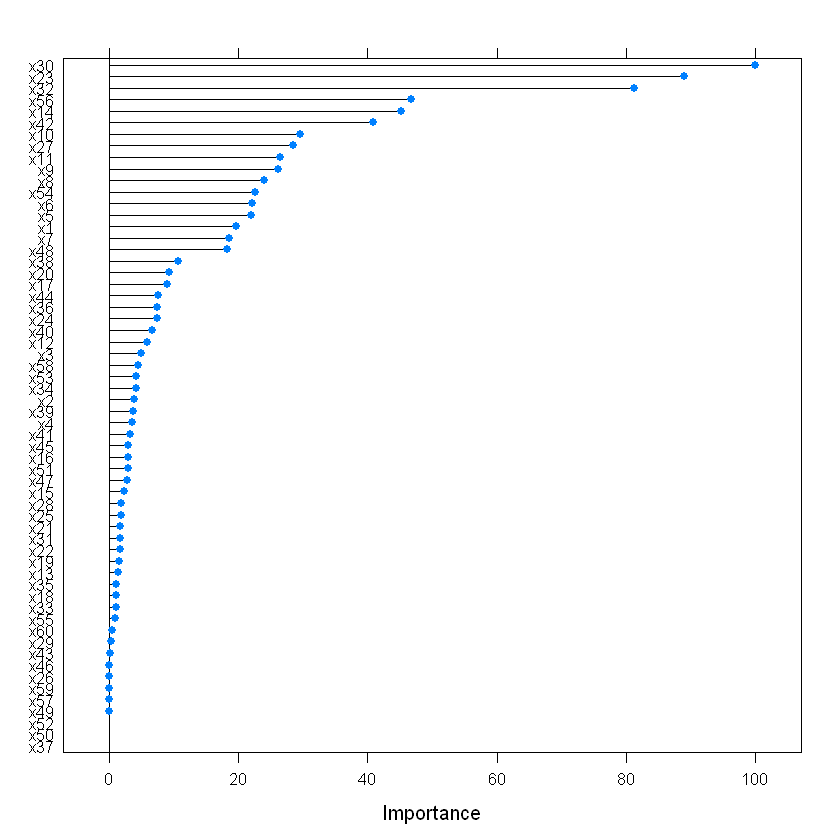

In [26]:
plot(varImp(RF11all))

## Variable Reduction

### Train

In [94]:
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 5, summaryFunction = twoClassSummary,
                           verboseIter = TRUE, classProbs = TRUE, sampling = "smote")
tunegrid2 <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [95]:
set.seed(121)
RF11 <- train(y~., data = traindata, method="ranger",
              trControl = fitControl, tuneGrid = tunegrid2, importance = 'impurity')
RF11

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  60 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1867, 1866, 1867, 1866, 1867, 1867, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8715151  0.9395582  0.4884000
   5    0.8730617  0.9247264  0.5500863
  10    0.8726159  0.9083709  0.5987922
  15    0.8710204  0.9026172  0.6089804

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [96]:
predRF11 <- predict(RF11, traindata3 )

In [97]:
1 - get_accuracy(predRF11, traindata3$y )
curve <- roc(as.numeric(predRF11), as.numeric(traindata3$y) )
auc(curve)

[1] 0.9827601

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.9666

In [98]:
imptable = data.table(varImp(RF11)$importance)
imptable[,variable := 1:dim(imptable)[1] ]
imptable <- imptable[order(Overall ,decreasing = TRUE),]

In [102]:
tail(imptable,25)

Overall      variable
1  5.814948e+00 16      
2  4.840195e+00 25      
3  4.662019e+00 24      
4  4.653285e+00 51      
5  3.050259e+00 19      
6  2.751523e+00 45      
7  2.571536e+00 34      
8  2.085157e+00 13      
9  1.819498e+00 31      
10 1.609746e+00 18      
11 1.450827e+00 33      
12 1.280153e+00 21      
13 1.154408e+00 55      
14 9.531924e-01 22      
15 8.303465e-01 29      
16 6.833137e-01 43      
17 6.011811e-01 60      
18 2.505738e-01 46      
19 2.450402e-01 26      
20 2.191659e-01 49      
21 5.110015e-02 59      
22 3.534913e-02 57      
23 6.320365e-05 37      
24 0.000000e+00 50      
25 0.000000e+00 52

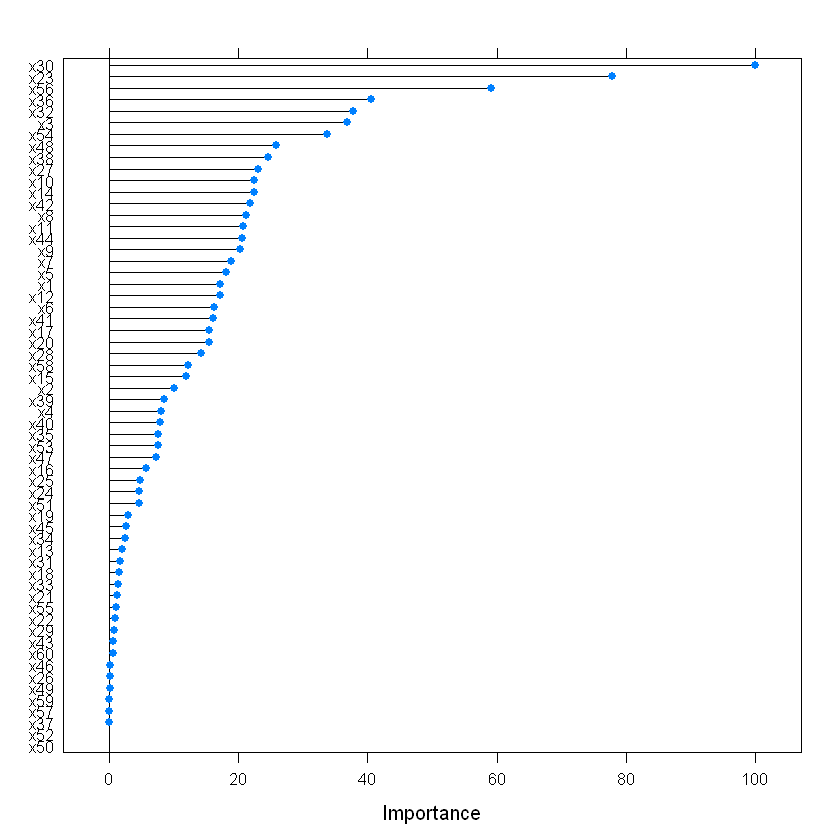

In [100]:
plot(varImp(RF11))

### Reduction 1: 0.869453

In [49]:
removecols <- imptable[(nrow(imptable)-19):nrow(imptable),variable ];removecols

[1] 37 50 52 57 40 15 46 55 49 31 19 51  5 33  3  2  6 12  1  7

In [50]:
reduceddata <- traindata[,-removecols]

In [61]:
ncol(reduceddata)

[1] 41

In [52]:
set.seed(153)
trainIndex = createDataPartition(reduceddata$y, p = 0.7, list = FALSE)
reducedtrain = reduceddata[trainIndex, ]
reducedtest = reduceddata[-trainIndex, ]

In [53]:
set.seed(821)
RF11 <- train(y~., data = reducedtrain, method="ranger",  num.trees = 350, metric = "ROC", preProc=c("center", "scale"),
              trControl = fitControl, tuneGrid = tunegrid2, importance = 'permutation')
RF11

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: x59"

- Fold03.Rep2: mtry=15, splitrule=gini, min.node.size=5 
+ Fold04.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
- Fold04.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold04.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
- Fold04.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold04.Rep2: mtry=10, splitrule=gini, min.node.size=5 
- Fold04.Rep2: mtry=10, splitrule=gini, min.node.size=5 
+ Fold04.Rep2: mtry=15, splitrule=gini, min.node.size=5 
- Fold04.Rep2: mtry=15, splitrule=gini, min.node.size=5 
+ Fold05.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
- Fold05.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold05.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
- Fold05.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold05.Rep2: mtry=10, splitrule=gini, min.node.size=5 
- Fold05.Rep2: mtry=10, splitrule=gini, min.node.size=5 
+ Fold05.Rep2: mtry=15, splitrule=gini, min.node.size=5 
- Fold05.Rep2: mtry=15, splitrule=gini, min.node.size=5 
+ Fold06.Rep2: mtry= 3, splitru

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: x59"

- Fold06.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold06.Rep2: mtry=10, splitrule=gini, min.node.size=5 
- Fold06.Rep2: mtry=10, splitrule=gini, min.node.size=5 
+ Fold06.Rep2: mtry=15, splitrule=gini, min.node.size=5 
- Fold06.Rep2: mtry=15, splitrule=gini, min.node.size=5 
+ Fold07.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
- Fold07.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold07.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
- Fold07.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold07.Rep2: mtry=10, splitrule=gini, min.node.size=5 
- Fold07.Rep2: mtry=10, splitrule=gini, min.node.size=5 
+ Fold07.Rep2: mtry=15, splitrule=gini, min.node.size=5 
- Fold07.Rep2: mtry=15, splitrule=gini, min.node.size=5 
+ Fold08.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
- Fold08.Rep2: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold08.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
- Fold08.Rep2: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold08.Rep2: mtry=10, splitru

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: x59"

- Fold07.Rep3: mtry=15, splitrule=gini, min.node.size=5 
+ Fold08.Rep3: mtry= 3, splitrule=gini, min.node.size=5 
- Fold08.Rep3: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold08.Rep3: mtry= 5, splitrule=gini, min.node.size=5 
- Fold08.Rep3: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold08.Rep3: mtry=10, splitrule=gini, min.node.size=5 
- Fold08.Rep3: mtry=10, splitrule=gini, min.node.size=5 
+ Fold08.Rep3: mtry=15, splitrule=gini, min.node.size=5 
- Fold08.Rep3: mtry=15, splitrule=gini, min.node.size=5 
+ Fold09.Rep3: mtry= 3, splitrule=gini, min.node.size=5 
- Fold09.Rep3: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold09.Rep3: mtry= 5, splitrule=gini, min.node.size=5 
- Fold09.Rep3: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold09.Rep3: mtry=10, splitrule=gini, min.node.size=5 
- Fold09.Rep3: mtry=10, splitrule=gini, min.node.size=5 
+ Fold09.Rep3: mtry=15, splitrule=gini, min.node.size=5 
- Fold09.Rep3: mtry=15, splitrule=gini, min.node.size=5 
+ Fold10.Rep3: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 3, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

1453 samples
  40 predictor
   2 classes: 'a', 'b' 

Pre-processing: centered (40), scaled (40) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1308, 1307, 1308, 1307, 1308, 1308, ... 
Addtional sampling using down-sampling prior to pre-processing

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8691979  0.7107973  0.8459206
   5    0.8683102  0.7376214  0.8313492
  10    0.8619392  0.7350792  0.8145714
  15    0.8603091  0.7374495  0.8224762

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 5.

In [56]:
predRF11 <- predict(RF11, reducedtest )

In [57]:
1 - get_accuracy(predRF11, reducedtest$y )
curve <- roc(as.numeric(predRF11), as.numeric(reducedtest$y) )
auc(curve)

[1] 0.7730474

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7046

In [347]:
predictions <- predict(RF11, submitdata,type = "prob" )$b; predictions

In [350]:
send_submission(predictions, token, url=subm_url, submit_now= TRUE)

[1] "Format OK"
$submission
[0.0523,0.2588,0.4434,0.0562,0.6388,0.2108,0.5244,0.4603,0.1225,0.0023,0.2775,0.2808,0.039,0.8481,0.2843,0.0911,0.0135,0.2204,0.2994,0.0167,0.1243,0.4191,0.8808,0.0052,0.5705,0.1121,0.3643,0.3883,0.4374,0.324,0.4455,0.7116,0.0075,0.3681,0.6879,0.3699,0.7351,0.6243,0.9156,0.0163,0.1895,0.2016,0.1141,0.7187,0.2286,0.7592,0.2369,0.0533,0.254,0.1777,0.0343,0.0321,0.2266,0.3699,0.7994,0.2784,0.7149,0.404,0.1441,0.4706,0.8303,0.0073,0.1176,0.1559,0.0924,0.0806,0.004,0.0147,0.5023,0.142,0.5761,0.0412,0.0101,0.6691,0.062,0.2365,0.7351,0.0612,0.5356,0.1304,0.8571,0.1258,0.0147,0.6158,0.3664,0.3847,0.011,0.1022,0.803,0.2431,0.0329,0.0489,0.1039,0.6701,0.1478,0.4918,0.132,0.0971,0.5141,0.4477,0.5476,0.0303,0.6018,0.4275,0.4475,0.4431,0.0452,0.2084,0.2137,0.0578,0.0611,0.6624,0.1553,0.6379,0.2286,0.012,0.0194,0.386,0.0888,0.0315,0.0184,0.0213,0.0459,0.084,0.1936,0.0451,0.0305,0.2342,0.7028,0.0423,0.5971,0.4211,0.3769,0.295,0.5388,0.6047,0.0852,0.591,0.0976,0.6008,0.3868

### Reduction 2

In [115]:
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 5, summaryFunction = twoClassSummary,
                           verboseIter = TRUE, classProbs = TRUE, sampling = "up")
tunegrid2 <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [133]:
removecols <- imptable[(nrow(imptable)-13):nrow(imptable),variable ];removecols

[1] 31 55 18 60 43 29 46 49 26 59 57 37 50 52

In [134]:
reduceddata <- traindata[,-removecols]

In [135]:
ncol(reduceddata)

[1] 47

In [136]:
set.seed(153)
trainIndex = createDataPartition(reduceddata$y, p = 0.7, list = FALSE)
reducedtrain = reduceddata[trainIndex, ]
reducedtest = reduceddata[-trainIndex, ]

In [137]:
set.seed(821)
RF12 <- train(y~., data = reduceddata, method="ranger",  num.trees = 350, metric = "ROC", preProc=c("range"),
              trControl = fitControl, tuneGrid = tunegrid2, importance = 'permutation')
RF12

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 10, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  46 predictor
   2 classes: 'a', 'b' 

Pre-processing: re-scaling to [0, 1] (46) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1868, 1866, ... 
Addtional sampling using up-sampling prior to pre-processing

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8794327  0.8718137  0.6731216
   5    0.8818904  0.8949453  0.6302510
  10    0.8825451  0.8994178  0.6353725
  15    0.8796398  0.8958362  0.6318353

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 10, splitrule = gini
 and min.node.size = 5.

In [138]:
predRF12 <- predict(RF12, reducedtest )

In [139]:
1 - get_accuracy(predRF12, reducedtest$y )
curve <- roc(as.numeric(predRF12), as.numeric(reducedtest$y) )
auc(curve)

[1] 1

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 1

In [140]:
reduceddsubmit <- submitdata[,-removecols]
predictions <- predict(RF12, reduceddsubmit,type = "prob" )$b; predictions

[1] 0.0440000000 0.1919047619 0.3808095238 0.0375714286 0.6267619048
   [6] 0.1811428571 0.4023333333 0.4962380952 0.0908571429 0.0000000000
  [11] 0.2460476190 0.3773265306 0.0195238095 0.9128095238 0.1630476190
  [16] 0.0121428571 0.0132380952 0.1483333333 0.1487142857 0.0095238095
  [21] 0.0748571429 0.3770000000 0.9418095238 0.0047619048 0.5930952381
  [26] 0.0771904762 0.4872380952 0.4619523810 0.4333333333 0.2634761905
  [31] 0.4350000000 0.7113333333 0.0171428571 0.4222857143 0.6631904762
  [36] 0.2353333333 0.6973809524 0.7086190476 0.9206190476 0.0225714286
  [41] 0.1767619048 0.1379523810 0.1327619048 0.8132380952 0.2217142857
  [46] 0.8547142857 0.1919047619 0.0438095238 0.2916560847 0.1374285714
  [51] 0.0139047619 0.0128571429 0.1447142857 0.4104217687 0.8503809524
  [56] 0.2875238095 0.7568095238 0.5674761905 0.0940000000 0.5143809524
  [61] 0.8696190476 0.0057142857 0.0714285714 0.1812380952 0.0534761905
  [66] 0.0583809524 0.0005714286 0.0171428571 0.6259523810 0.1798095238
  [71] 0.5746666667 0.0245238095 0.0406666667 0.6902023810 0.0747142857
  [76] 0.2491904762 0.7090000000 0.0418571429 0.4850476190 0.0794285714
  [81] 0.9331904762 0.0800000000 0.0020952381 0.5280952381 0.2353809524
  [86] 0.1626666667 0.0009523810 0.0670952381 0.8447142857 0.2575714286
  [91] 0.0162857143 0.0182857143 0.0859523810 0.7130476190 0.1027619048
  [96] 0.4099523810 0.1568095238 0.0750000000 0.3473227513 0.4645238095
 [101] 0.5679523810 0.0329523810 0.5981904762 0.3616190476 0.3432380952
 [106] 0.3757142857 0.0126190476 0.2528571429 0.1035238095 0.0261428571
 [111] 0.0245238095 0.8756190476 0.1510000000 0.7658571429 0.2479047619
 [116] 0.0089523810 0.0138095238 0.3477142857 0.0343809524 0.0234285714
 [121] 0.0102857143 0.0591428571 0.0090000000 0.1200000000 0.1736666667
 [126] 0.0331904762 0.0326190476 0.2864761905 0.6592857143 0.0126190476
 [131] 0.5850000000 0.3825714286 0.3121428571 0.4243809524 0.4145238095
 [136] 0.5881904762 0.0721428571 0.7064761905 0.1115238095 0.7342380952
 [141] 0.3849047619 0.2206190476 0.2889523810 0.3242380952 0.3239047619
 [146] 0.1874761905 0.7195238095 0.1385714286 0.2696666667 0.0961904762
 [151] 0.0370000000 0.3897619048 0.2426666667 0.1495238095 0.0057142857
 [156] 0.0926666667 0.0282380952 0.5623809524 0.3712380952 0.9160476190
 [161] 0.1725714286 0.1978571429 0.0318571429 0.0300476190 0.0128571429
 [166] 0.6241428571 0.0662380952 0.4937142857 0.0181428571 0.1188095238
 [171] 0.7356190476 0.3248571429 0.3491428571 0.0395238095 0.4127142857
 [176] 0.0106666667 0.2198095238 0.3000952381 0.5715714286 0.8908571429
 [181] 0.7695238095 0.7082857143 0.4272380952 0.0128571429 0.8619523810
 [186] 0.0239523810 0.0028571429 0.2410000000 0.1974285714 0.2026190476
 [191] 0.0000000000 0.4473333333 0.6302857143 0.1185714286 0.0066666667
 [196] 0.0000000000 0.0477142857 0.0114285714 0.0310000000 0.7235238095
 [201] 0.3740476190 0.1576190476 0.2060952381 0.5191904762 0.2613333333
 [206] 0.6264013605 0.0287142857 0.9588571429 0.0915238095 0.7156666667
 [211] 0.0171428571 0.0000000000 0.0732857143 0.5182380952 0.1423333333
 [216] 0.7456190476 0.1544761905 0.0339047619 0.0091428571 0.0650952381
 [221] 0.0540952381 0.0091428571 0.3487142857 0.6580000000 0.0193809524
 [226] 0.1841428571 0.1122857143 0.8098571429 0.2129047619 0.0083809524
 [231] 0.8725714286 0.0310000000 0.3779047619 0.0561428571 0.0050000000
 [236] 0.0305238095 0.3211904762 0.1199047619 0.6004540816 0.6998095238
 [241] 0.0618571429 0.0095238095 0.0105714286 0.0430952381 0.0620340136
 [246] 0.0388571429 0.5071428571 0.6237142857 0.5100000000 0.0019047619
 [251] 0.0462380952 0.7914761905 0.7790952381 0.4380952381 0.0565238095
 [256] 0.5482380952 0.8283333333 0.1945714286 0.2058571429 0.1523333333
 [261] 0.5157142857 0.2415714286 0.0705238095 0.2841156463 0.6538571429
 [266] 0.3374761905 0.0201904762 0.1586190476 0.1109047619 0.0979523810
 [271] 0.3214285714 0.2122857143 0.2645714286 0.1706084656 0.0511904762
 [276] 0.2662380952 0.6474285714 0.05871428

In [141]:
send_submission(predictions, token, url=subm_url, submit_now= TRUE)

[1] "Format OK"
$submission
[0.044,0.1919,0.3808,0.0376,0.6268,0.1811,0.4023,0.4962,0.0909,0,0.246,0.3773,0.0195,0.9128,0.163,0.0121,0.0132,0.1483,0.1487,0.0095,0.0749,0.377,0.9418,0.0048,0.5931,0.0772,0.4872,0.462,0.4333,0.2635,0.435,0.7113,0.0171,0.4223,0.6632,0.2353,0.6974,0.7086,0.9206,0.0226,0.1768,0.138,0.1328,0.8132,0.2217,0.8547,0.1919,0.0438,0.2917,0.1374,0.0139,0.0129,0.1447,0.4104,0.8504,0.2875,0.7568,0.5675,0.094,0.5144,0.8696,0.0057,0.0714,0.1812,0.0535,0.0584,0.0006,0.0171,0.626,0.1798,0.5747,0.0245,0.0407,0.6902,0.0747,0.2492,0.709,0.0419,0.485,0.0794,0.9332,0.08,0.0021,0.5281,0.2354,0.1627,0.001,0.0671,0.8447,0.2576,0.0163,0.0183,0.086,0.713,0.1028,0.41,0.1568,0.075,0.3473,0.4645,0.568,0.033,0.5982,0.3616,0.3432,0.3757,0.0126,0.2529,0.1035,0.0261,0.0245,0.8756,0.151,0.7659,0.2479,0.009,0.0138,0.3477,0.0344,0.0234,0.0103,0.0591,0.009,0.12,0.1737,0.0332,0.0326,0.2865,0.6593,0.0126,0.585,0.3826,0.3121,0.4244,0.4145,0.5882,0.0721,0.7065,0.1115,0.7342,0.3849,0.2206,0.289,0.3

In [129]:
imptable = data.table(varImp(RF12)$importance)
imptable[,variable := 1:dim(imptable)[1] ]
imptable <- imptable[order(Overall ,decreasing = TRUE),]

In [130]:
tail(imptable,25)

Overall    variable
1  6.15339019 47      
2  6.11382437 51      
3  5.72927550 34      
4  4.79350303 28      
5  4.50524972 45      
6  4.41258077 35      
7  3.50020710 13      
8  2.89943254 21      
9  2.80804545 33      
10 2.55859462 22      
11 2.02576231 19      
12 1.93695083 31      
13 1.51329144 55      
14 1.35365919 18      
15 1.32269691 60      
16 1.19626638 43      
17 0.94714446 29      
18 0.36653718 46      
19 0.32662909 49      
20 0.09556463 26      
21 0.07712401 59      
22 0.02723138 57      
23 0.00000000 37      
24 0.00000000 50      
25 0.00000000 52

# DATA TRANSFORMATION 2

## Transformation 1

#### To Uniform

In [40]:
alllng <- dim(alldata[,-length(alldata)])
sbmlng <- dim(submitdata)

bigdata <- rbind(alldata[,-length(alldata)],submitdata)
bigscaled <- bigdata
dim(bigscaled)

[1] 4147   58

In [41]:
cols <- c(1,8,9,10,11,14,27,30,32)

In [42]:
for(c in cols){
    bigscaled[,c] <- to.uniform(bigscaled[,c])
}

In [24]:
head(bigscaled)

x1        x2 x3 x4 x5 x6 x7 x8         x9         x10       ... x49 x51 x53
1 0.2823728 1  1  1  18  3  1 0.40414758 0.59175307 0.7598264 ... 0   0   0  
2 0.5408729 0  1  1  18 13  3 0.02218471 0.43163733 0.6520376 ... 0   0   0  
3 0.9404389 0  1  1   1  3 14 0.74704606 0.86279238 0.6279238 ... 0   1   1  
4 0.4574391 0  1  1  14  9  3 0.47070171 0.04244032 0.6233422 ... 0   0   0  
5 0.7716422 1  1  0   2 15 12 0.95249578 0.27803231 0.9438148 ... 0   0   0  
6 0.7716422 0  0  1   5  5 12 0.26814565 0.71256330 0.7451170 ... 0   0   1  
  x54 x55 x56 x57 x58 x59 x60
1 0   0   1   0   0   0   0  
2 0   0   1   0   0   0   0  
3 0   0   1   0   0   0   0  
4 0   0   0   0   0   0   0  
5 0   0   1   0   0   0   0  
6 1   0   0   0   1   0   0

#### Column 36 & 42 to Dummy

In [25]:
bigscaled[bigscaled$x42 >= 1,'x42'] = 1
bigscaled[bigscaled$x36 >= 1,'x36'] = 1


In [26]:
# bigscaled[1:alllng[1],]

#### As.Factor 

In [27]:
nonbinarycols <- cols

In [28]:
nonbinarycols

[1]  1  8  9 10 11 14 27 30 32

In [29]:
str(bigscaled)

'data.frame':	4147 obs. of  58 variables:
 $ x1 : num  0.282 0.541 0.94 0.457 0.772 ...
 $ x2 : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3 : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x4 : int  1 1 1 1 0 1 1 1 1 0 ...
 $ x5 : int  18 18 1 14 2 5 16 13 0 8 ...
 $ x6 : int  3 13 3 9 15 5 1 4 0 18 ...
 $ x7 : int  1 3 14 3 12 12 2 17 2 18 ...
 $ x8 : num  0.4041 0.0222 0.747 0.4707 0.9525 ...
 $ x9 : num  0.5918 0.4316 0.8628 0.0424 0.278 ...
 $ x10: num  0.76 0.652 0.628 0.623 0.944 ...
 $ x11: num  0.609 0.646 0.51 0.276 0.785 ...
 $ x12: int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14: num  0.7 0.155 0.784 0.237 0.7 ...
 $ x15: int  1 1 1 1 0 1 0 1 1 1 ...
 $ x16: int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x22: int  0 1 0 0 0 0 0 0 0 0 ...
 $ x23: int  1 1 1 0 1 0 1 0 0 0 ...
 $ x24: int  0 0 0 1 0 0 0 1 1 0 

In [30]:
for(c in colnames(bigscaled[,c(5,6,7)])  ){
    bigscaled[,c] = as.factor(bigscaled[,c])
}
str(bigscaled)

'data.frame':	4147 obs. of  58 variables:
 $ x1 : num  0.282 0.541 0.94 0.457 0.772 ...
 $ x2 : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3 : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x4 : int  1 1 1 1 0 1 1 1 1 0 ...
 $ x5 : Factor w/ 19 levels "0","1","2","3",..: 19 19 2 15 3 6 17 14 1 9 ...
 $ x6 : Factor w/ 19 levels "0","1","2","3",..: 4 14 4 10 16 6 2 5 1 19 ...
 $ x7 : Factor w/ 19 levels "0","1","2","3",..: 2 4 15 4 13 13 3 18 3 19 ...
 $ x8 : num  0.4041 0.0222 0.747 0.4707 0.9525 ...
 $ x9 : num  0.5918 0.4316 0.8628 0.0424 0.278 ...
 $ x10: num  0.76 0.652 0.628 0.623 0.944 ...
 $ x11: num  0.609 0.646 0.51 0.276 0.785 ...
 $ x12: int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14: num  0.7 0.155 0.784 0.237 0.7 ...
 $ x15: int  1 1 1 1 0 1 0 1 1 1 ...
 $ x16: int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21: int  0 0 0 0 0 0 0 0 0 0 ...
 

#### x5:x7 Dummies  

In [31]:
dummied <- dummyVars(~x5+x6+x7,data = bigscaled)
bigscaled <- cbind(bigscaled, predict(dummied,bigscaled))
head(bigscaled)

x1        x2 x3 x4 x5 x6 x7 x8         x9         x10       ... x7.9 x7.10
1 0.2823728 1  1  1  18 3  1  0.40414758 0.59175307 0.7598264 ... 0    0    
2 0.5408729 0  1  1  18 13 3  0.02218471 0.43163733 0.6520376 ... 0    0    
3 0.9404389 0  1  1  1  3  14 0.74704606 0.86279238 0.6279238 ... 0    0    
4 0.4574391 0  1  1  14 9  3  0.47070171 0.04244032 0.6233422 ... 0    0    
5 0.7716422 1  1  0  2  15 12 0.95249578 0.27803231 0.9438148 ... 0    0    
6 0.7716422 0  0  1  5  5  12 0.26814565 0.71256330 0.7451170 ... 0    0    
  x7.11 x7.12 x7.13 x7.14 x7.15 x7.16 x7.17 x7.18
1 0     0     0     0     0     0     0     0    
2 0     0     0     0     0     0     0     0    
3 0     0     0     1     0     0     0     0    
4 0     0     0     0     0     0     0     0    
5 0     1     0     0     0     0     0     0    
6 0     1     0     0     0     0     0     0

In [32]:
bigscaled <- bigscaled[,-c(5,6,7)]

In [33]:
colnames(bigscaled)[58]

[1] "x5.2"

In [34]:
for(c in 58:length(bigscaled)  ){
    bigscaled[,c] = as.factor(bigscaled[,c])
}
str(bigscaled)

'data.frame':	4147 obs. of  112 variables:
 $ x1   : num  0.282 0.541 0.94 0.457 0.772 ...
 $ x2   : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3   : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x4   : int  1 1 1 1 0 1 1 1 1 0 ...
 $ x8   : num  0.4041 0.0222 0.747 0.4707 0.9525 ...
 $ x9   : num  0.5918 0.4316 0.8628 0.0424 0.278 ...
 $ x10  : num  0.76 0.652 0.628 0.623 0.944 ...
 $ x11  : num  0.609 0.646 0.51 0.276 0.785 ...
 $ x12  : int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14  : num  0.7 0.155 0.784 0.237 0.7 ...
 $ x15  : int  1 1 1 1 0 1 0 1 1 1 ...
 $ x16  : int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x22  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ x23  : int  1 1 1 0 1 0 1 0 0 0 ...
 $ x24  : int  0 0 0 1 0 0 0 1 1 0 ...
 $ x25  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ x26  : int  0 0 0 0 1 0 0 0 0 0 ...

#### New Datasets 

In [35]:
allproc <- cbind(bigscaled[1:alllng[1] ,],alldata$y)
submitproc <- bigscaled[ -(1:alllng[1]) ,]
dim(allproc); dim(submitproc)

[1] 2074  113

[1] 2073  112

In [36]:
head(submitproc)

x1        x2 x3 x4 x8         x9        x10         x11        x12 x13 ...
2075 0.1063419 1  1  1  0.05883771 0.3457921 0.009404389 0.03858211 0   0   ...
2076 0.4574391 1  0  1  0.16180371 0.3277068 0.993006993 0.64962624 0   0   ...
2077 0.8256571 1  1  1  0.40414758 0.4914396 0.060284543 0.49095732 0   0   ...
2078 0.6255124 1  1  0  0.79551483 0.9713046 0.882324572 0.98625512 1   0   ...
2079 0.3684591 1  1  1  0.47070171 0.9898722 0.884977092 0.87822522 0   0   ...
2080 0.8256571 1  0  1  0.40414758 0.2794791 0.622136484 0.83120328 0   0   ...
     x7.9 x7.10 x7.11 x7.12 x7.13 x7.14 x7.15 x7.16 x7.17 x7.18
2075 0    0     0     0     0     0     0     1     0     0    
2076 0    0     0     1     0     0     0     0     0     0    
2077 0    1     0     0     0     0     0     0     0     0    
2078 0    0     0     0     0     0     0     0     0     0    
2079 0    0     0     0     0     0     0     0     0     0    
2080 0    0     0     0     0     0     1     0     0     0

In [37]:
colnames(allproc)[ length(allproc)] <- "y"

#### 50 52 

In [38]:
allproc <- allproc[,-c(47,49)]
submitproc <- submitproc[,-c(47,49)]

In [39]:
str(allproc)

'data.frame':	2074 obs. of  111 variables:
 $ x1   : num  0.282 0.541 0.94 0.457 0.772 ...
 $ x2   : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3   : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x4   : int  1 1 1 1 0 1 1 1 1 0 ...
 $ x8   : num  0.4041 0.0222 0.747 0.4707 0.9525 ...
 $ x9   : num  0.5918 0.4316 0.8628 0.0424 0.278 ...
 $ x10  : num  0.76 0.652 0.628 0.623 0.944 ...
 $ x11  : num  0.609 0.646 0.51 0.276 0.785 ...
 $ x12  : int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14  : num  0.7 0.155 0.784 0.237 0.7 ...
 $ x15  : int  1 1 1 1 0 1 0 1 1 1 ...
 $ x16  : int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ x22  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ x23  : int  1 1 1 0 1 0 1 0 0 0 ...
 $ x24  : int  0 0 0 1 0 0 0 1 1 0 ...
 $ x25  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ x26  : int  0 0 0 0 1 0 0 0 0 0 ...

## Variable Importance 

### Tuning 

In [94]:
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 3, summaryFunction = twoClassSummary,
                           verboseIter = TRUE, classProbs = TRUE, sampling = "up")
tunegrid <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = c(3,5,7,10))

### Model 

In [56]:
set.seed(821)
RFproc <- train(y~., data = allproc, method="ranger",  num.trees = 250, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFproc

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 15, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
 112 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1868, 1866, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8653486  0.8300289  0.6935425
   5    0.8680819  0.8741276  0.6194248
  10    0.8701277  0.8858335  0.6122745
  15    0.8702741  0.8822092  0.6024444

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 15, splitrule = gini
 and min.node.size = 5.

In [78]:
1-0.5*((1-0.8822092)+(1-0.6024444))

[1] 0.7423268

In [188]:
predictions <- predict(RFproc, submitproc,type = "prob" )$b; predictions

[1] 0.038400000 0.206466667 0.441133333 0.048400000 0.568552381 0.417514286
   [7] 0.434300000 0.526503030 0.067583333 0.005333333 0.218466667 0.420156140
  [13] 0.029088889 0.860369697 0.102800000 0.087200000 0.020333333 0.139133333
  [19] 0.255266667 0.022600000 0.087600000 0.397933333 0.860800000 0.008800000
  [25] 0.637076190 0.076666667 0.486103030 0.502400000 0.589111111 0.239800000
  [31] 0.513533333 0.848342857 0.022333333 0.470066667 0.627866667 0.270500000
  [37] 0.639200000 0.613103030 0.808066667 0.021000000 0.169933333 0.225533333
  [43] 0.110066667 0.698200000 0.184533333 0.739533333 0.194266667 0.019400000
  [49] 0.360400000 0.125800000 0.044266667 0.013000000 0.183522222 0.345933333
  [55] 0.737066667 0.217266667 0.696066667 0.608633333 0.300047619 0.505533333
  [61] 0.762161905 0.018400000 0.233866667 0.174866667 0.067733333 0.064266667
  [67] 0.012200000 0.020200000 0.530133333 0.161866667 0.464266667 0.017333333
  [73] 0.014666667 0.592533333 0.217114286 0.206933333 0.702133333 0.040400000
  [79] 0.472933333 0.141466667 0.828000000 0.251333333 0.005000000 0.544066667
  [85] 0.309155556 0.237233333 0.067333333 0.073666667 0.666933333 0.319200000
  [91] 0.010000000 0.081266667 0.117000000 0.761942857 0.134533333 0.442133333
  [97] 0.144688889 0.161780952 0.406633333 0.478266667 0.617744419 0.051283333
 [103] 0.640133333 0.359933333 0.357688889 0.435200000 0.019000000 0.222800000
 [109] 0.136400000 0.046066667 0.068200000 0.808504762 0.139000000 0.701942857
 [115] 0.167466667 0.013666667 0.008666667 0.410533333 0.034333333 0.025666667
 [121] 0.033288889 0.033133333 0.028000000 0.096866667 0.148266667 0.013333333
 [127] 0.002400000 0.340619048 0.764142857 0.047266667 0.641600000 0.469333333
 [133] 0.315666667 0.417400000 0.515495238 0.659466667 0.075600000 0.767434921
 [139] 0.147866667 0.697466667 0.434333333 0.233622222 0.253000000 0.476933333
 [145] 0.407333333 0.149266667 0.639822222 0.192733333 0.211888889 0.192600000
 [151] 0.054222222 0.387866667 0.206000000 0.168800000 0.030133333 0.111200000
 [157] 0.029333333 0.528615385 0.357800000 0.918266667 0.130200000 0.170200000
 [163] 0.048600000 0.116066667 0.012857143 0.663588278 0.073933333 0.531066667
 [169] 0.034000000 0.295866667 0.646533333 0.302966667 0.394733333 0.028800000
 [175] 0.418847619 0.007000000 0.234266667 0.325066667 0.668761905 0.849933333
 [181] 0.836266667 0.903000000 0.491688889 0.000000000 0.860288889 0.034266667
 [187] 0.006800000 0.203533333 0.252933333 0.366000000 0.006000000 0.455300000
 [193] 0.601504762 0.195400000 0.008000000 0.007600000 0.085666667 0.041933333
 [199] 0.035066667 0.751809524 0.486000000 0.166133333 0.170533333 0.561133333
 [205] 0.284969841 0.628200000 0.033066667 0.889700000 0.076266667 0.829066667
 [211] 0.054066667 0.000000000 0.087933333 0.515066667 0.135716667 0.734800000
 [217] 0.134466667 0.057733333 0.008000000 0.133133333 0.039866667 0.018133333
 [223] 0.386155556 0.673600000 0.067666667 0.172380952 0.406447619 0.625933333
 [229] 0.244466667 0.002000000 0.806209524 0.040333333 0.432918045 0.057533333
 [235] 0.017666667 0.055400000 0.322955556 0.148266667 0.588833333 0.732100000
 [241] 0.033200000 0.000000000 0.045466667 0.128733333 0.061533333 0.025933333
 [247] 0.293800000 0.604466667 0.293180952 0.000000000 0.054200000 0.624761905
 [253] 0.748666667 0.377676190 0.069066667 0.490733333 0.868400000 0.203859740
 [259] 0.126200000 0.132200000 0.446662745 0.271530952 0.033333333 0.343066667
 [265] 0.583704274 0.358555556 0.038800000 0.145866667 0.058800000 0.130066667
 [271] 0.378488889 0.136696104 0.349577778 0.201533333 0.078000000 0.234800000
 [277] 0.628266667 0.037800000 0.275204040 0.120200000 0.382000000 0.101733333
 [283] 0.304200000 0.105533333 0.618019048 0.337066667 0.087766667 0.456895238
 [289] 0.695733333 0.526000000 0.424315385 0.119133333 0.375266667 0.514166667
 [295] 0.348466667 0.835866667 0.732400000 0.148449817 0.054466667 0.047666667
 [301] 0.848677778 0.040800000 0.018533333 0.00000000

In [189]:
send_submission(predictions, token, url=subm_url, submit_now= TRUE)

[1] "Format OK"
$submission
[0.0384,0.2065,0.4411,0.0484,0.5686,0.4175,0.4343,0.5265,0.0676,0.0053,0.2185,0.4202,0.0291,0.8604,0.1028,0.0872,0.0203,0.1391,0.2553,0.0226,0.0876,0.3979,0.8608,0.0088,0.6371,0.0767,0.4861,0.5024,0.5891,0.2398,0.5135,0.8483,0.0223,0.4701,0.6279,0.2705,0.6392,0.6131,0.8081,0.021,0.1699,0.2255,0.1101,0.6982,0.1845,0.7395,0.1943,0.0194,0.3604,0.1258,0.0443,0.013,0.1835,0.3459,0.7371,0.2173,0.6961,0.6086,0.3,0.5055,0.7622,0.0184,0.2339,0.1749,0.0677,0.0643,0.0122,0.0202,0.5301,0.1619,0.4643,0.0173,0.0147,0.5925,0.2171,0.2069,0.7021,0.0404,0.4729,0.1415,0.828,0.2513,0.005,0.5441,0.3092,0.2372,0.0673,0.0737,0.6669,0.3192,0.01,0.0813,0.117,0.7619,0.1345,0.4421,0.1447,0.1618,0.4066,0.4783,0.6177,0.0513,0.6401,0.3599,0.3577,0.4352,0.019,0.2228,0.1364,0.0461,0.0682,0.8085,0.139,0.7019,0.1675,0.0137,0.0087,0.4105,0.0343,0.0257,0.0333,0.0331,0.028,0.0969,0.1483,0.0133,0.0024,0.3406,0.7641,0.0473,0.6416,0.4693,0.3157,0.4174,0.5155,0.6595,0.0756,0.7674,0.1479,0.6975,0.43

### Variable Importances 

In [ ]:
imptable = data.table(varImp(RFproc)$importance)
imptable[,variable := 1:dim(imptable)[1] ]
imptable <- imptable[order(Overall ,decreasing = TRUE),]

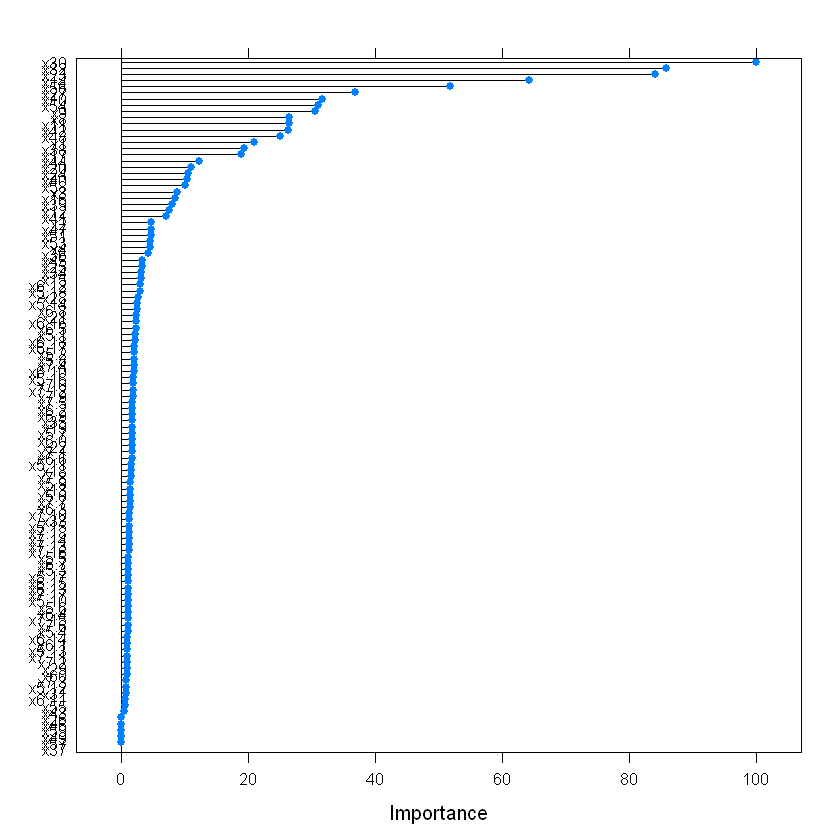

In [58]:
plot(varImp(RFproc))

# REDUCED MODELS

## Random Forest 

### 21 Columns 

In [62]:
head(imptable,21)

Overall   variable
1  100.00000 27      
2   85.85511 29      
3   84.03439 20      
4   64.32327 11      
5   51.80303 51      
6   36.81312 24      
7   31.70339  7      
8   31.09925 49      
9   30.54625  6      
10  26.52901  5      
11  26.43642  8      
12  26.28628 39      
13  25.02501 45      
14  20.92510  1      
15  19.31103 35      
16  18.92853 14      
17  12.32758 41      
18  11.05805 17      
19  10.50535 21      
20  10.35201 37      
21  10.08773 53

In [63]:
cols <- c(imptable[c(1:21),variable ] ,113);cols

[1]  27  29  20  11  51  24   7  49   6   5   8  39  45   1  35  14  41  17  21
[20]  37  53 113

In [64]:
allprocreduced <- allproc[,cols]

In [66]:
set.seed(13)
RFprocred <- train(y~., data = allprocreduced, method="ranger",  num.trees = 250, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFprocred

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 3, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  21 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1866, 1867, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8733418  0.8519133  0.6866980
   5    0.8700172  0.8791434  0.6242431
  10    0.8623445  0.8760632  0.6183529
  15    0.8537950  0.8714682  0.6003216

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 5.

In [79]:
1-0.5*((1-0.8519133)+(1-0.6866980))

[1] 0.7693056

### 26 Columns 

In [72]:
head(imptable,26)

Overall    variable
1  100.000000 27      
2   85.855111 29      
3   84.034391 20      
4   64.323265 11      
5   51.803029 51      
6   36.813116 24      
7   31.703388  7      
8   31.099250 49      
9   30.546248  6      
10  26.529006  5      
11  26.436420  8      
12  26.286284 39      
13  25.025009 45      
14  20.925102  1      
15  19.311031 35      
16  18.928529 14      
17  12.327582 41      
18  11.058046 17      
19  10.505350 21      
20  10.352005 37      
21  10.087732 53      
22   8.788198  3      
23   8.566627 13      
24   8.089879 36      
25   7.521984  9      
26   7.118655 38

In [73]:
cols2 <- c(imptable[c(1:26),variable ] ,113);cols2

[1]  27  29  20  11  51  24   7  49   6   5   8  39  45   1  35  14  41  17  21
[20]  37  53   3  13  36   9  38 113

In [74]:
allprocred2 <- allproc[,cols2]

In [90]:
set.seed(13)
RFprocred2 <- train(y~., data = allprocred2, method="ranger",  num.trees = 250, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFprocred2

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=3 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=3 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=3 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=3 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=3 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=3 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=3 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=3 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=7 
- Fold01.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 3, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  21 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1866, 1867, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  min.node.size  ROC        Sens       Spec     
   3    3              0.8738361  0.8519198  0.6835843
   3    5              0.8746311  0.8503813  0.6902745
   3    7              0.8743347  0.8485865  0.6949804
   5    3              0.8702560  0.8833472  0.6297961
   5    5              0.8704929  0.8783733  0.6234980
   5    7              0.8692909  0.8793900  0.6305490
  10    3              0.8597227  0.8779724  0.6062039
  10    5              0.8598966  0.8758084  0.6085647
  10    7              0.8617346  0.8756892  0.6105098
  15    3              0.8529264  0.8737661  0.6034510
  15    5              0.8525836  0.8723673  0.6018588
  15    7              0.8526917  0.8707006  0

In [95]:
1-0.5*((1- 0.8503813)+(1-0.6902745))

[1] 0.7703279

In [96]:
set.seed(13)
RFprocred22 <- train(y~., data = allprocreduced2, method="ranger",  num.trees = 350, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFprocred22

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 7 
- Fold01.Rep1:

Selecting tuning parameters
Fitting mtry = 3, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  21 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1866, 1867, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  min.node.size  ROC        Sens       Spec     
   3     3             0.8738970  0.8524144  0.6874379
   3     5             0.8742841  0.8494393  0.6939477
   3     7             0.8730679  0.8477312  0.6900261
   3    10             0.8739333  0.8417715  0.7050850
   5     3             0.8697103  0.8839335  0.6212810
   5     5             0.8707359  0.8841581  0.6310980
   5     7             0.8710389  0.8784134  0.6390196
   5    10             0.8703427  0.8747782  0.6534510
  10     3             0.8613095  0.8799050  0.6121569
  10     5             0.8603437  0.8786202  0.6121699
  10     7             0.8617721  0.8745658  0.6239085
  10    10             0.8624938  0.8703019  0

In [97]:
1-0.5*((1-0.8494393)+(1-0.6939477))

[1] 0.7716935

In [102]:
cols2t <- c(imptable[c(1:26),variable ]);cols2t
submitproc2 <- submitproc[,cols2t]

[1] 27 29 20 11 51 24  7 49  6  5  8 39 45  1 35 14 41 17 21 37 53  3 13 36  9
[26] 38

In [109]:
a <- predict(RFprocred22, submitproc2,type = "prob" )$b
predictions = a
predictions

[1] 0.0533129759 0.1777700671 0.5620833047 0.0756752953 0.5854115897
   [6] 0.5437923107 0.3562210533 0.7012093600 0.0781909877 0.0025365656
  [11] 0.2651783905 0.4654503358 0.0097040548 0.8912317106 0.1766096345
  [16] 0.0266130719 0.0283574362 0.2820353149 0.2536899714 0.0066769321
  [21] 0.1091918956 0.4944842035 0.9068164916 0.0049682132 0.6936281556
  [26] 0.0896766309 0.5319086596 0.5074068145 0.6424223620 0.2993101543
  [31] 0.4616341855 0.8323484404 0.0087816771 0.5630105885 0.7592366894
  [36] 0.2553472637 0.6808213679 0.7001792979 0.8364327165 0.0196101966
  [41] 0.2084553905 0.2080210518 0.0832208110 0.8502557110 0.2601224956
  [46] 0.8162839231 0.2422873997 0.0368040680 0.3390387953 0.1464536811
  [51] 0.0427186305 0.0051704585 0.2350884469 0.3962293410 0.7238186161
  [56] 0.1984152250 0.8534454359 0.6585349030 0.3315458023 0.5052741851
  [61] 0.7598513158 0.0136823290 0.2029416524 0.1835087518 0.0294639095
  [66] 0.0546257738 0.0080267060 0.0146756962 0.5548021841 0.1864797720
  [71] 0.5850406223 0.0278167372 0.0400563913 0.5974459211 0.1781768652
  [76] 0.2886951727 0.7388738687 0.0522282405 0.4486102409 0.1180669075
  [81] 0.8457427381 0.2527205347 0.0176888953 0.6405513592 0.3623550173
  [86] 0.4290684917 0.0909718146 0.0379769208 0.7033542581 0.3663272191
  [91] 0.0318228146 0.0326125740 0.1090230244 0.6781396910 0.1389392788
  [96] 0.4167089893 0.1585074431 0.2265399703 0.4108163067 0.5111516471
 [101] 0.6379890380 0.0150569126 0.6644746577 0.4103675014 0.4167003050
 [106] 0.4204678595 0.0139272099 0.2534011109 0.2466813299 0.0634372191
 [111] 0.0356352369 0.8272474372 0.0881535674 0.6850962808 0.2286944684
 [116] 0.0191970433 0.0005088773 0.4065295371 0.0368854906 0.0219913353
 [121] 0.0211009901 0.0952468082 0.0224811191 0.1266330172 0.2483581327
 [126] 0.0309777769 0.0395887642 0.3406635337 0.7898904080 0.0214940577
 [131] 0.7153978631 0.5092250547 0.3256397882 0.3458199589 0.5926441031
 [136] 0.6862865410 0.0553609813 0.7680110247 0.1350533159 0.7027801423
 [141] 0.4006277315 0.2613704189 0.4508711351 0.5828269104 0.4264377795
 [146] 0.2830234130 0.6532604950 0.2631265073 0.2954721913 0.0806427686
 [151] 0.0760642473 0.5005011714 0.3246070242 0.1522510362 0.0154053865
 [156] 0.1688286141 0.0232161083 0.5359974715 0.3756839095 0.8743575140
 [161] 0.2022916665 0.2166486612 0.0253875302 0.1021226445 0.0300757037
 [166] 0.6460935477 0.0896461785 0.4453177269 0.0082241367 0.3872322557
 [171] 0.7161265673 0.4377790562 0.4061043593 0.0373485357 0.3713436323
 [176] 0.0022505213 0.2774670536 0.4076086048 0.6283743537 0.8304441623
 [181] 0.8572072585 0.8635780754 0.4930462133 0.0093184011 0.8716130963
 [186] 0.0484390069 0.0015691984 0.1586236133 0.1913393779 0.3414449070
 [191] 0.0253990369 0.5617059934 0.7003635383 0.2624750223 0.0284811632
 [196] 0.0028212992 0.0505279120 0.0286809912 0.0399157959 0.8053856144
 [201] 0.5284629153 0.1746722847 0.2487854035 0.5737982894 0.3867465393
 [206] 0.6464370180 0.0296844409 0.9066250778 0.0980529198 0.8160614701
 [211] 0.0692837033 0.0022041190 0.0442340349 0.5373543752 0.1759608460
 [216] 0.7962639755 0.1439358967 0.0570393599 0.0156344034 0.0637301146
 [221] 0.0339319630 0.0138698150 0.4785047719 0.7304475250 0.0225912720
 [226] 0.0979378932 0.3973266791 0.5737132242 0.3550493414 0.0159064383
 [231] 0.8310518884 0.0371485719 0.4610875467 0.0895714936 0.0116904777
 [236] 0.0502299646 0.4341698867 0.2488722557 0.5740890198 0.7952520431
 [241] 0.0304994208 0.0152671342 0.0149628805 0.0464441399 0.0817150375
 [246] 0.0363323130 0.2654773215 0.6656187524 0.2299324314 0.0053669401
 [251] 0.0310240184 0.5432431611 0.8223311681 0.4270626472 0.0764171926
 [256] 0.4598263727 0.8457920012 0.2871647699 0.1406529617 0.1983063532
 [261] 0.5048399276 0.2263208359 0.0217549944 0.3766824081 0.5906266452
 [266] 0.4571549184 0.0511628756 0.1692471209 0.1635744559 0.0906759065
 [271] 0.4806668026 0.2320451768 0.3783118834 0.2973149660 0.0639350535
 [276] 0.2375913107 0.7093556482 0.04412944

In [110]:
send_submission(predictions, token, url=subm_url, submit_now= TRUE)

[1] "Format OK"
$submission
[0.0533,0.1778,0.5621,0.0757,0.5854,0.5438,0.3562,0.7012,0.0782,0.0025,0.2652,0.4655,0.0097,0.8912,0.1766,0.0266,0.0284,0.282,0.2537,0.0067,0.1092,0.4945,0.9068,0.005,0.6936,0.0897,0.5319,0.5074,0.6424,0.2993,0.4616,0.8323,0.0088,0.563,0.7592,0.2553,0.6808,0.7002,0.8364,0.0196,0.2085,0.208,0.0832,0.8503,0.2601,0.8163,0.2423,0.0368,0.339,0.1465,0.0427,0.0052,0.2351,0.3962,0.7238,0.1984,0.8534,0.6585,0.3315,0.5053,0.7599,0.0137,0.2029,0.1835,0.0295,0.0546,0.008,0.0147,0.5548,0.1865,0.585,0.0278,0.0401,0.5974,0.1782,0.2887,0.7389,0.0522,0.4486,0.1181,0.8457,0.2527,0.0177,0.6406,0.3624,0.4291,0.091,0.038,0.7034,0.3663,0.0318,0.0326,0.109,0.6781,0.1389,0.4167,0.1585,0.2265,0.4108,0.5112,0.638,0.0151,0.6645,0.4104,0.4167,0.4205,0.0139,0.2534,0.2467,0.0634,0.0356,0.8272,0.0882,0.6851,0.2287,0.0192,0.0005,0.4065,0.0369,0.022,0.0211,0.0952,0.0225,0.1266,0.2484,0.031,0.0396,0.3407,0.7899,0.0215,0.7154,0.5092,0.3256,0.3458,0.5926,0.6863,0.0554,0.768,0.1351,0.7028,0.400

In [111]:
set.seed(19)
RFprocred22 <- train(y~., data = allprocreduced2, method="ranger",  num.trees = 500, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFprocred22

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 3 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 3 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size= 5 
+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size= 7 
- Fold01.Rep1:

Selecting tuning parameters
Fitting mtry = 3, splitrule = gini, min.node.size = 10 on full training set


Random Forest 

2074 samples
  21 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1867, 1867, 1866, 1867, 1867, 1867, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  min.node.size  ROC        Sens       Spec     
   3     3             0.8723392  0.8523817  0.6876078
   3     5             0.8718537  0.8487656  0.6889542
   3     7             0.8719302  0.8443029  0.6954641
   3    10             0.8729591  0.8430209  0.7053464
   5     3             0.8680257  0.8832707  0.6116340
   5     5             0.8679571  0.8802902  0.6306405
   5     7             0.8690870  0.8779411  0.6300131
   5    10             0.8691845  0.8717636  0.6306405
  10     3             0.8574341  0.8770850  0.6084052
  10     5             0.8586695  0.8779425  0.6155817
  10     7             0.8585140  0.8760371  0.6221176
  10    10             0.8605319  0.8677228  0

In [84]:
head(imptable,32)

Overall    variable
1  100.000000 27      
2   85.855111 29      
3   84.034391 20      
4   64.323265 11      
5   51.803029 51      
6   36.813116 24      
7   31.703388  7      
8   31.099250 49      
9   30.546248  6      
10  26.529006  5      
11  26.436420  8      
12  26.286284 39      
13  25.025009 45      
14  20.925102  1      
15  19.311031 35      
16  18.928529 14      
17  12.327582 41      
18  11.058046 17      
19  10.505350 21      
20  10.352005 37      
21  10.087732 53      
22   8.788198  3      
23   8.566627 13      
24   8.089879 36      
25   7.521984  9      
26   7.118655 38      
27   4.807805  2      
28   4.777011 44      
29   4.685317 47      
30   4.617269 48      
31   4.568834  4      
32   4.208062 33

In [85]:
cols3 <- c(imptable[c(1:32),variable ] ,113);cols3
allprocreduced3 <- allproc[,cols3]

[1]  27  29  20  11  51  24   7  49   6   5   8  39  45   1  35  14  41  17  21
[20]  37  53   3  13  36   9  38   2  44  47  48   4  33 113

In [86]:
set.seed(15)
RFprocred3 <- train(y~., data = allprocreduced3, method="ranger",  num.trees = 250, metric = "ROC",
              trControl = fitControl, tuneGrid = tunegrid, importance = 'permutation')
RFprocred3

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

Selecting tuning parameters
Fitting mtry = 5, splitrule = gini, min.node.size = 5 on full training set


Random Forest 

2074 samples
  32 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1867, 1866, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   3    0.8725380  0.8532541  0.6829542
   5    0.8732632  0.8839226  0.6266536
  10    0.8685198  0.8873278  0.6161699
  15    0.8631890  0.8754110  0.6103007

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [87]:
1-0.5*((1-0.8839226)+(1-0.6266536))

[1] 0.7552881

In [1]:
predictions <- predict(RFprocred3, submitproc,type = "prob" )$b; predictions

ERROR: Error in predict(RFprocred, submitproc, type = "prob"): 'RFprocred' nesnesi bulunamadı


ERROR: Error in eval(expr, envir, enclos): 'predictions' nesnesi bulunamadı


## Penalized Regression 

In [ ]:
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 3, summaryFunction = twoClassSummary,
                           verboseIter = TRUE, classProbs = TRUE, sampling = "up")
tunegrid <- expand.grid(alpha = seq(0.01,1,by = 0.01),lambda = seq(0.001,0.01,by = 0.001))

In [ ]:
Lasso <- train(y~., data = allprocreduced2, method="glmnet", trControl = fitControl, tuneGrid = tunegrid)
predLasso <- predict(Lasso,traindata3[,-59],type = 'prob')  #testdata 

In [ ]:
allprocreduced2